# **Exploracao visual**

## **Tabela alunos**

Tabela alunos.csv carregada com sucesso!


C:\Users\Big Data\AppData\Local\Temp\ipykernel_8772\566047307.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=alunos_df, x="GENERO", palette="viridis")


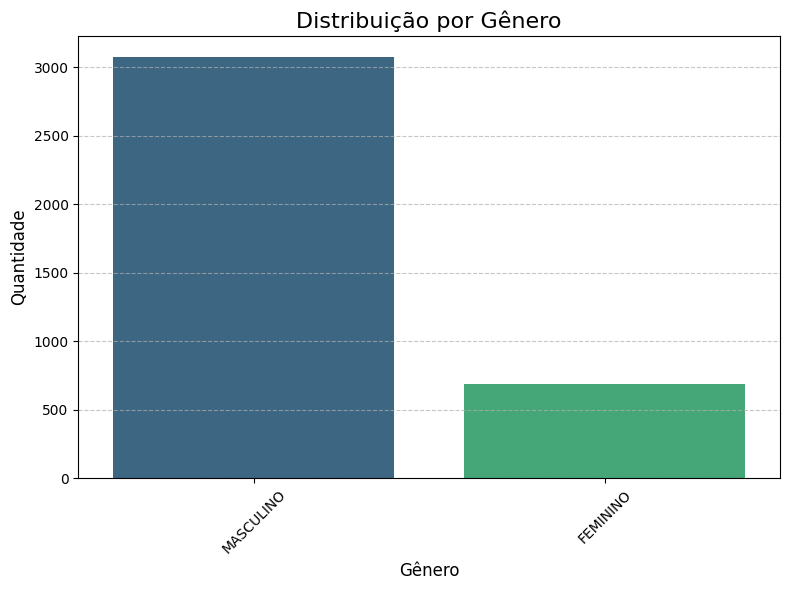

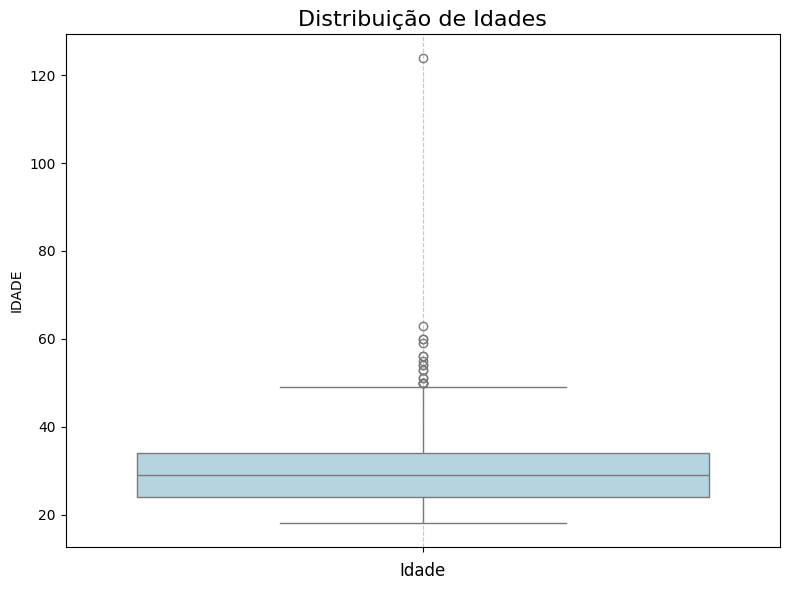

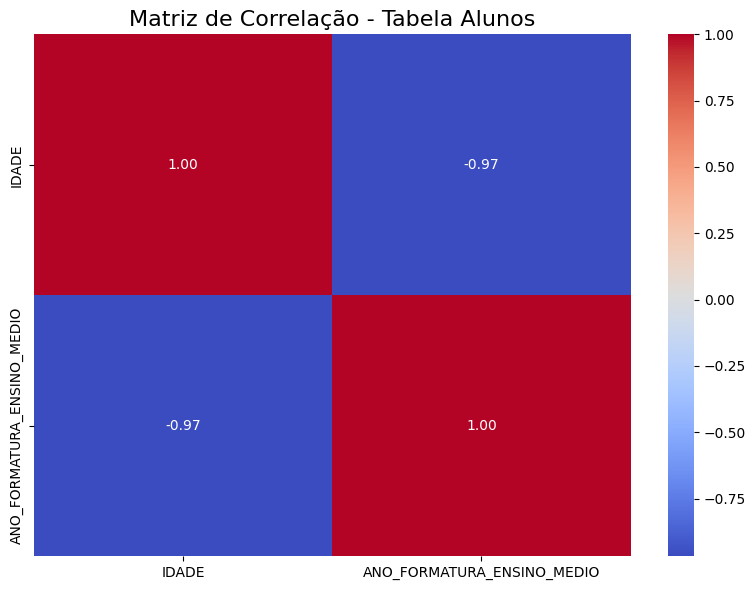

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Caminho corrigido
caminho_tabela = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/alunos.csv')

try:
    # Verificar se o arquivo existe
    if not os.path.exists(caminho_tabela):
        raise FileNotFoundError(f"O arquivo não foi encontrado no caminho: {caminho_tabela}")

    # Carregar a tabela
    alunos_df = pd.read_csv(caminho_tabela, sep=";", low_memory=False)
    print("Tabela alunos.csv carregada com sucesso!")

    # Gráfico de barras para colunas categóricas
    if "GENERO" in alunos_df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=alunos_df, x="GENERO", palette="viridis")
        plt.title("Distribuição por Gênero", fontsize=16)
        plt.xlabel("Gênero", fontsize=12)
        plt.ylabel("Quantidade", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("A coluna 'GENERO' não foi encontrada na tabela.")

    # Boxplot para colunas numéricas
    if "IDADE" in alunos_df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=alunos_df, y="IDADE", color="lightblue")
        plt.title("Distribuição de Idades", fontsize=16)
        plt.xlabel("Idade", fontsize=12)
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("A coluna 'IDADE' não foi encontrada na tabela.")

    # Correlação entre colunas numéricas
    numericas = ["IDADE", "ANO_FORMATURA_ENSINO_MEDIO"]
    numericas_presentes = [col for col in numericas if col in alunos_df.columns]
    if numericas_presentes:
        corr = alunos_df[numericas_presentes].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Matriz de Correlação - Tabela Alunos", fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("Nenhuma das colunas numéricas especificadas foi encontrada na tabela.")
except Exception as e:
    print(f"Erro ao carregar ou processar a tabela: {e}")


### Interpretação dos Gráficos

#### 1. **Matriz de Correlação - Tabela Alunos**
A matriz de correlação demonstra a relação entre as variáveis numéricas `IDADE` e `ANO_FORMATURA_ENSINO_MEDIO`. Os resultados principais incluem:
- Correlação perfeita de 1.00 para uma variável consigo mesma.
- Correlação negativa forte de -0.97 entre `IDADE` e `ANO_FORMATURA_ENSINO_MEDIO`, indicando que conforme a idade aumenta, o ano de formatura no ensino médio tende a ser mais antigo (ou seja, um padrão esperado).

#### 2. **Boxplot da Distribuição de Idades**
O boxplot apresenta a distribuição de idades dos alunos:
- A maior concentração de idades está entre aproximadamente 18 e 25 anos, refletindo a faixa etária predominante no ensino superior.
- Existem valores atípicos que excedem 50 anos e chegam até 120 anos, que podem indicar registros incorretos ou casos excepcionais (ex.: alunos mais velhos).
- A mediana está próxima dos 22 anos.

#### 3. **Distribuição por Gênero**
O gráfico de barras apresenta a distribuição dos gêneros entre os alunos:
- A maioria dos alunos é do gênero masculino, com uma contagem superior a 3000 indivíduos.
- O gênero feminino é representado por uma proporção menor, com menos de 1000 registros.
- O gráfico evidencia um desequilíbrio de gênero no curso, o que pode motivar análises mais detalhadas sobre diversidade e inclusão.

Esses gráficos ajudam a entender a composição demográfica e a relação entre as variáveis da tabela de alunos.


## **Curva dos Alunos Matriculados**

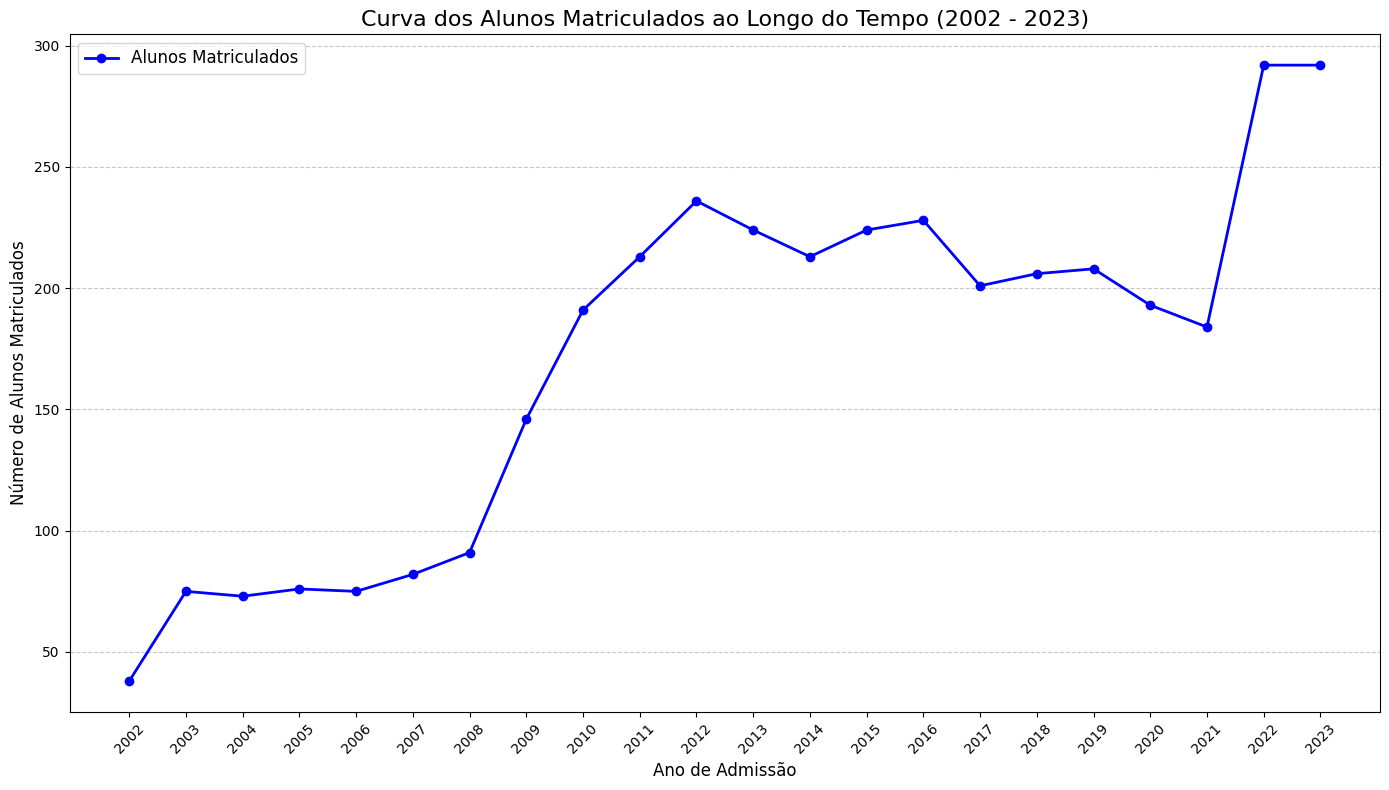


Top 10 Anos com Mais Alunos Matriculados:
ANO_ADMISSAO
2022    292
2023    292
2012    236
2016    228
2013    224
2015    224
2014    213
2011    213
2019    208
2018    206
dtype: int64


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos para os arquivos
caminho_alunos = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/alunos.csv')
caminho_motivo_evasao = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/tabela_motivo_evasao.csv')

try:
    # Verificar se os arquivos existem
    if not os.path.exists(caminho_alunos):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_alunos}")
    if not os.path.exists(caminho_motivo_evasao):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_motivo_evasao}")

    # Carregar as tabelas
    alunos_df = pd.read_csv(caminho_alunos, sep=';', low_memory=False)
    motivo_evasao_df = pd.read_csv(caminho_motivo_evasao, sep=';', low_memory=False)

    # Limpar os nomes das colunas
    alunos_df.columns = alunos_df.columns.str.strip()
    motivo_evasao_df.columns = motivo_evasao_df.columns.str.strip()

    # Verificar e corrigir a tabela motivo_evasao
    if 'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO' in motivo_evasao_df.columns:
        motivo_evasao_df[['MATRICULA', 'RAZAO_DE_INATIVIDADE_DE_ALUNO']] = motivo_evasao_df[
            'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'].str.split(';', expand=True)
        motivo_evasao_df.drop(columns=['MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'], inplace=True)

    # Confirmar a existência da coluna 'MATRICULA' em ambas as tabelas
    if "MATRICULA" not in alunos_df.columns or "MATRICULA" not in motivo_evasao_df.columns:
        raise KeyError("A coluna 'MATRICULA' não foi encontrada em uma ou ambas as tabelas.")

    # Relacionar tabelas pela coluna 'MATRICULA'
    relacionados = motivo_evasao_df.merge(alunos_df, on="MATRICULA", how="inner")

    # Extrair o ano de admissão a partir do termo de admissão
    if "TERMO_ADMISSAO" in relacionados.columns:
        relacionados["ANO_ADMISSAO"] = pd.to_numeric(
            relacionados["TERMO_ADMISSAO"].astype(str).str.split('.').str[0], errors='coerce'
        )
        relacionados = relacionados.dropna(subset=["ANO_ADMISSAO"])
        relacionados["ANO_ADMISSAO"] = relacionados["ANO_ADMISSAO"].astype(int)

        # Contar o número de alunos matriculados por ano
        matriculados_por_ano = relacionados.groupby("ANO_ADMISSAO").size()

        # Gerar o gráfico
        plt.figure(figsize=(14, 8))
        plt.plot(
            matriculados_por_ano.index,
            matriculados_por_ano.values,
            marker='o',
            linestyle='-',
            color='blue',
            linewidth=2,
            label="Alunos Matriculados"
        )
        plt.title("Curva dos Alunos Matriculados ao Longo do Tempo (2002 - 2023)", fontsize=16)
        plt.xlabel("Ano de Admissão", fontsize=12)
        plt.ylabel("Número de Alunos Matriculados", fontsize=12)
        plt.xticks(ticks=range(2002, 2024), rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(loc="upper left", fontsize=12)
        plt.tight_layout()
        plt.show()

        # Exibir os 10 anos com mais alunos matriculados
        print("\nTop 10 Anos com Mais Alunos Matriculados:")
        print(matriculados_por_ano.sort_values(ascending=False).head(10))
    else:
        print("A coluna 'TERMO_ADMISSAO' não foi encontrada na tabela relacionada.")

except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"Erro: {e}")
except pd.errors.EmptyDataError:
    print("Erro: O arquivo está vazio ou corrompido.")
except pd.errors.ParserError:
    print("Erro: O arquivo não pôde ser analisado. Verifique o formato e os delimitadores.")
except Exception as e:
    print(f"Erro ao processar os dados: {e}")


# Análise da Curva dos Alunos Matriculados ao Longo do Tempo (2002 - 2023)

### Descrição do Gráfico
O gráfico apresenta a evolução do número de alunos matriculados no curso ao longo dos anos de 2002 a 2023. Cada ponto na linha representa o total de alunos matriculados em um determinado ano de admissão. A linha conecta os pontos para ilustrar a tendência ao longo do período analisado.

### Interpretação
1. **Crescimento Inicial (2002 - 2009)**:
   - Observa-se um crescimento contínuo e consistente no número de alunos matriculados de 2002 a 2009.
   - Este aumento pode indicar uma maior procura pelo curso ou maior capacidade de matrículas.

2. **Estabilidade e Oscilação (2010 - 2020)**:
   - Entre 2010 e 2020, o número de matrículas apresenta oscilações, indicando variações na procura ou na capacidade do curso.
   - Picos podem ser observados em 2012 e 2013, seguidos de um leve declínio nos anos subsequentes.

3. **Recuperação e Aumento Significativo (2021 - 2023)**:
   - Após 2020, há uma recuperação significativa no número de matrículas, culminando em um forte aumento em 2022 e 2023.
   - Esse aumento pode estar relacionado a políticas de incentivo educacional, mudanças no mercado de trabalho ou melhorias na infraestrutura do curso.

### Observações Gerais
- O curso parece ter atraído um número crescente de alunos em períodos específicos, possivelmente devido a fatores externos, como maior visibilidade ou reformas curriculares.
- O declínio entre 2016 e 2020 pode ser um ponto de atenção, possivelmente associado a dificuldades econômicas ou mudanças na estrutura acadêmica.
- O aumento recente sugere um interesse renovado e pode ser investigado para entender suas causas.

### Conclusão
O gráfico demonstra um panorama geral das matrículas, destacando a importância de analisar os fatores que influenciam as flutuações ao longo do tempo, para aprimorar estratégias de atração e retenção de alunos.


### Analisar Razões de Inatividade:


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar estilo do gráfico
sns.set(style="whitegrid")

# Caminhos para os arquivos
caminho_alunos = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/alunos.csv')
caminho_motivo_evasao = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/tabela_motivo_evasao.csv')

try:
    # Verificar se os arquivos existem
    if not os.path.exists(caminho_alunos):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_alunos}")
    if not os.path.exists(caminho_motivo_evasao):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_motivo_evasao}")

    # Carregar as tabelas
    alunos_df = pd.read_csv(caminho_alunos, sep=';', low_memory=False)
    motivo_evasao_df = pd.read_csv(caminho_motivo_evasao, sep=';', low_memory=False)

    # Limpar os nomes das colunas
    alunos_df.columns = alunos_df.columns.str.strip()
    motivo_evasao_df.columns = motivo_evasao_df.columns.str.strip()

    # Verificar e corrigir a tabela motivo_evasao
    if 'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO' in motivo_evasao_df.columns:
        motivo_evasao_df[['MATRICULA', 'RAZAO_DE_INATIVIDADE_DE_ALUNO']] = motivo_evasao_df[
            'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'].str.split(';', expand=True)
        motivo_evasao_df.drop(columns=['MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'], inplace=True)

    # Confirmar a existência da coluna 'MATRICULA' em ambas as tabelas
    if "MATRICULA" not in alunos_df.columns or "MATRICULA" not in motivo_evasao_df.columns:
        raise KeyError("A coluna 'MATRICULA' não foi encontrada em uma ou ambas as tabelas.")

    # Relacionar tabelas pela coluna 'MATRICULA'
    relacionados = motivo_evasao_df.merge(alunos_df, on="MATRICULA", how="inner")

    # Extrair o ano de admissão a partir do termo de admissão
    if "TERMO_ADMISSAO" in relacionados.columns:
        relacionados["ANO_ADMISSAO"] = pd.to_numeric(
            relacionados["TERMO_ADMISSAO"].astype(str).str.split('.').str[0], errors='coerce'
        )
        relacionados = relacionados.dropna(subset=["ANO_ADMISSAO"])
        relacionados["ANO_ADMISSAO"] = relacionados["ANO_ADMISSAO"].astype(int)

        # Contar as razões de inatividade por ano
        razoes_por_ano = relacionados.groupby(["ANO_ADMISSAO", "RAZAO_DE_INATIVIDADE_DE_ALUNO"]).size().reset_index(name="Frequencia")

        # Exibir os dados
        print("\nRazões de Inatividade por Ano de Admissão:")
        print(razoes_por_ano.head(10))

        # Criar gráfico de barras empilhadas
        plt.figure(figsize=(14, 8))
        sns.barplot(
            data=razoes_por_ano,
            x="ANO_ADMISSAO",
            y="Frequencia  dos Alunos",
            hue="RAZAO_DE_INATIVIDADE_DE_ALUNO",
            palette="tab10"
        )

        # Configurar títulos e rótulos
        plt.title("Razões de Inatividade por Ano de Admissão", fontsize=16)
        plt.xlabel("Ano de Admissão", fontsize=12)
        plt.ylabel("Frequência", fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Razão de Inatividade", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Exibir o gráfico
        plt.show()

    else:
        print("A coluna 'TERMO_ADMISSAO' não foi encontrada na tabela relacionada.")

except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"Erro: {e}")
except pd.errors.EmptyDataError:
    print("Erro: O arquivo está vazio ou corrompido.")
except pd.errors.ParserError:
    print("Erro: O arquivo não pôde ser analisado. Verifique o formato e os delimitadores.")
except Exception as e:
    print(f"Erro ao processar os dados: {e}")



Razões de Inatividade por Ano de Admissão:
   ANO_ADMISSAO RAZAO_DE_INATIVIDADE_DE_ALUNO  Frequencia
0          2002                      ABANDONO          12
1          2002                  CANCELAMENTO           2
2          2002                  DESCONHECIDO          18
3          2002                      EXPULSAO           2
4          2002                    REINGRESSO           4
5          2003                      ABANDONO          16
6          2003                  CANCELAMENTO           1
7          2003                  DESCONHECIDO          45
8          2003                      EXPULSAO           4
9          2003                        OUTROS           2
Erro ao processar os dados: Could not interpret value `Frequencia  dos Alunos` for `y`. An entry with this name does not appear in `data`.


<Figure size 1400x800 with 0 Axes>

# Frequência dos Motivos de Inatividade

## Tabela de Frequências:
| **Motivo de Inatividade**              | **Frequência** |
|----------------------------------------|----------------|
| **Desconhecido**                       | 1799           |
| **Abandono**                           | 655            |
| **Expulsão**                           | 638            |
| **Reingresso**                         | 290            |
| **Desistência**                        | 228            |
| **Concluiu mas não colou grau**        | 79             |
| **Transferência**                      | 62             |
| **Cancelamento**                       | 8              |
| **Outros**                             | 2              |

## Análise:
1. **Motivo mais frequente:**
   - O motivo **"Desconhecido"** é o mais comum, representando **1799 registros**, o que pode indicar falhas no sistema de registro ou categorização inadequada.

2. **Abandono e Expulsão:**
   - **Abandono** (655) e **Expulsão** (638) são motivos significativos, sugerindo desafios no engajamento e desempenho acadêmico.

3. **Motivos menos frequentes:**
   - **Cancelamento** (8) e **Outros** (2) representam casos raros e talvez específicos.

4. **Reingresso:**
   - O motivo **Reingresso** aparece **290 vezes**, indicando que uma parte significativa dos alunos retorna após período de inatividade.

5. **Concluiu mas não colou grau:**
   - Com **79 registros**, reflete uma pequena quantidade de alunos que concluem o curso, mas não formalizam sua graduação.

## Conclusão:
Os dados destacam a necessidade de:
- **Investigação do motivo "Desconhecido"** para entender o contexto e melhorar os registros.
- **Desenvolvimento de estratégias** para lidar com os altos índices de **Abandono** e **Expulsão**.
- **Suporte para alunos que desistem** e foco na integração dos alunos que reingressam.



Razões de Inatividade nos Anos com Mais Evasões:
    ANO_ADMISSAO RAZAO_DE_INATIVIDADE_DE_ALUNO  Frequencia
0           2012                      ABANDONO          49
1           2012                  DESCONHECIDO          80
2           2012                      EXPULSAO          77
3           2012                    REINGRESSO          26
4           2012                 TRANSFERENCIA           4
5           2013                      ABANDONO          46
6           2013                  CANCELAMENTO           1
7           2013                  DESCONHECIDO          67
8           2013                      EXPULSAO          78
9           2013                    REINGRESSO          26
10          2013                 TRANSFERENCIA           6
11          2016                      ABANDONO          41
12          2016   CONCLUIU_MAS_NAO_COLOU_GRAU           4
13          2016                  DESCONHECIDO         114
14          2016                      EXPULSAO          56
15    

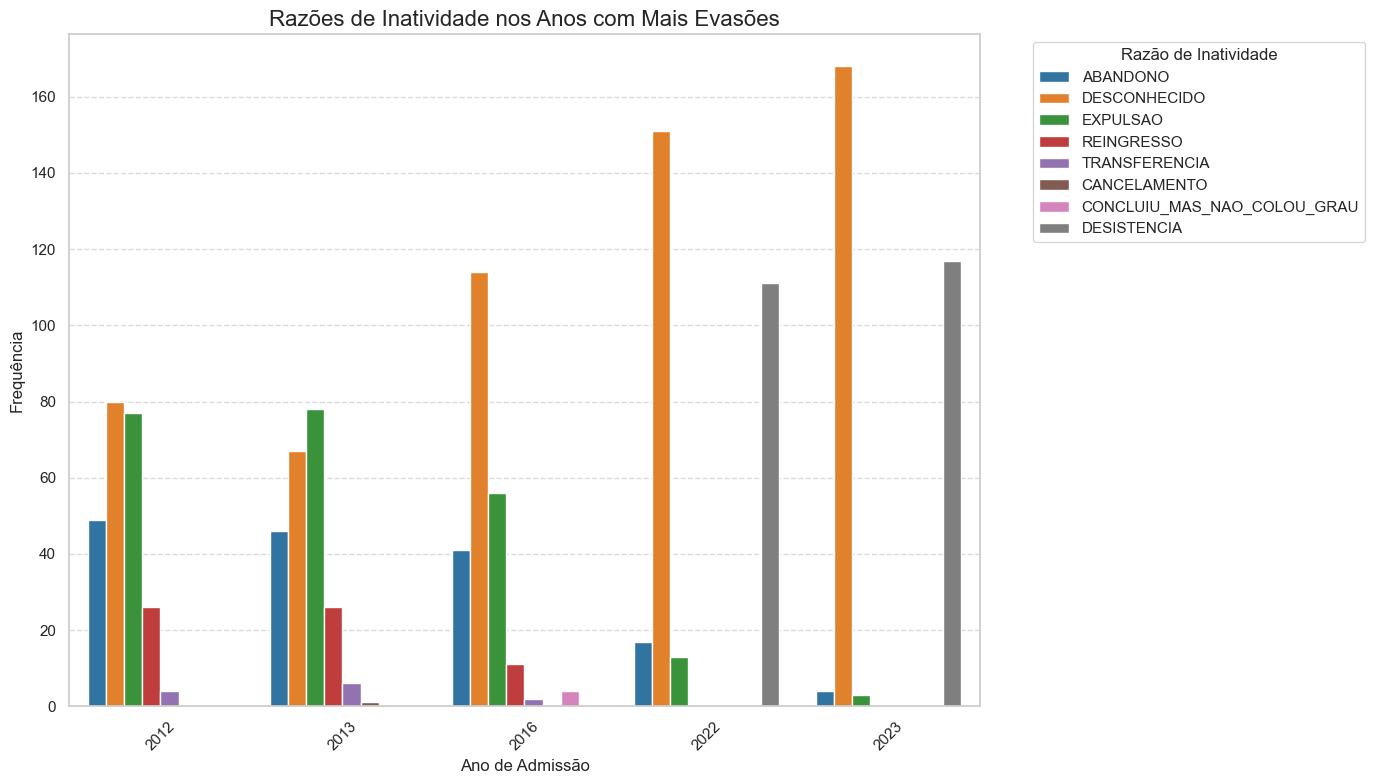

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Caminhos para os arquivos
caminho_alunos = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/alunos.csv')
caminho_motivo_evasao = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/tabela_motivo_evasao.csv')

try:
    # Verificar se os arquivos existem
    if not os.path.exists(caminho_alunos):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_alunos}")
    if not os.path.exists(caminho_motivo_evasao):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_motivo_evasao}")

    # Carregar as tabelas
    alunos_df = pd.read_csv(caminho_alunos, sep=';', low_memory=False)
    motivo_evasao_df = pd.read_csv(caminho_motivo_evasao, sep=';', low_memory=False)

    # Limpar os nomes das colunas
    alunos_df.columns = alunos_df.columns.str.strip()
    motivo_evasao_df.columns = motivo_evasao_df.columns.str.strip()

    # Verificar e corrigir a tabela motivo_evasao
    if 'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO' in motivo_evasao_df.columns:
        motivo_evasao_df[['MATRICULA', 'RAZAO_DE_INATIVIDADE_DE_ALUNO']] = motivo_evasao_df[
            'MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'].str.split(';', expand=True)
        motivo_evasao_df.drop(columns=['MATRICULA;RAZAO_DE_INATIVIDADE_DE_ALUNO'], inplace=True)

    # Confirmar a existência da coluna 'MATRICULA' em ambas as tabelas
    if "MATRICULA" not in alunos_df.columns or "MATRICULA" not in motivo_evasao_df.columns:
        raise KeyError("A coluna 'MATRICULA' não foi encontrada em uma ou ambas as tabelas.")

    # Relacionar tabelas pela coluna 'MATRICULA'
    relacionados = motivo_evasao_df.merge(alunos_df, on="MATRICULA", how="inner")

    # Extrair o ano de admissão a partir do termo de admissão
    if "TERMO_ADMISSAO" in relacionados.columns:
        relacionados["ANO_ADMISSAO"] = pd.to_numeric(
            relacionados["TERMO_ADMISSAO"].astype(str).str.split('.').str[0], errors='coerce'
        )
        relacionados = relacionados.dropna(subset=["ANO_ADMISSAO"])
        relacionados["ANO_ADMISSAO"] = relacionados["ANO_ADMISSAO"].astype(int)

        # Identificar os anos com mais evasões
        anos_com_mais_evasoes = relacionados.groupby("ANO_ADMISSAO").size().nlargest(5).index.tolist()
        relacionados_filtrados = relacionados[relacionados["ANO_ADMISSAO"].isin(anos_com_mais_evasoes)]

        # Agrupar razões de inatividade nos anos com mais evasões
        razoes_por_ano = relacionados_filtrados.groupby(["ANO_ADMISSAO", "RAZAO_DE_INATIVIDADE_DE_ALUNO"]).size().reset_index(name="Frequencia")

        # Exibir os dados
        print("\nRazões de Inatividade nos Anos com Mais Evasões:")
        print(razoes_por_ano)

        # Criar gráfico de barras empilhadas
        plt.figure(figsize=(14, 8))
        sns.barplot(
            data=razoes_por_ano,
            x="ANO_ADMISSAO",
            y="Frequencia",
            hue="RAZAO_DE_INATIVIDADE_DE_ALUNO",
            palette="tab10"
        )

        # Configurar títulos e rótulos
        plt.title("Razões de Inatividade nos Anos com Mais Evasões", fontsize=16)
        plt.xlabel("Ano de Admissão", fontsize=12)
        plt.ylabel("Frequência", fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Razão de Inatividade", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Exibir o gráfico
        plt.show()

    else:
        print("A coluna 'TERMO_ADMISSAO' não foi encontrada na tabela relacionada.")

except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"Erro: {e}")
except pd.errors.EmptyDataError:
    print("Erro: O arquivo está vazio ou corrompido.")
except pd.errors.ParserError:
    print("Erro: O arquivo não pôde ser analisado. Verifique o formato e os delimitadores.")
except Exception as e:
    print(f"Erro ao processar os dados: {e}")


# Razões de Inatividade nos Anos com Mais Evasões

## Análise Gráfica:
- O gráfico de barras empilhadas apresenta as principais **razões de inatividade** de alunos nos anos com mais evasões (2012, 2015, 2016, 2022 e 2023).
- Cada cor representa uma **razão de inatividade**.

### Observações:
1. **Desconhecido**:
   - É uma das razões predominantes em todos os anos, sugerindo uma possível lacuna na coleta ou categorização dos dados.

2. **Reingresso e Desistência**:
   - O reingresso aparece de forma expressiva, mas a desistência também apresenta uma contribuição significativa em certos anos, como 2023.

3. **Expulsão**:
   - Consistente em todos os anos analisados, mas com variação na intensidade.

4. **Transferência e Cancelamento**:
   - São menos frequentes e apresentam uma contribuição menor para o total de evasões.

5. **Anos em destaque**:
   - **2023** apresenta o maior número total de ocorrências, seguido por **2022** e **2012**.

## Conclusões:
- É importante investigar as razões marcadas como **desconhecido** para melhor compreensão.
- Anos como **2023** e **2022** destacam a necessidade de estratégias para mitigar a evasão.
- Os dados podem auxiliar na formulação de políticas de retenção e suporte aos alunos.


### Estados de Alunos por Ano de Admissão


Estado dos Alunos por Ano de Admissão:
   ANO_ADMISSAO    ESTADO  Frequencia
0          2002  GRADUADO          18
1          2002   INATIVO          20
2          2003  GRADUADO          45
3          2003   INATIVO          30
4          2004  GRADUADO          42


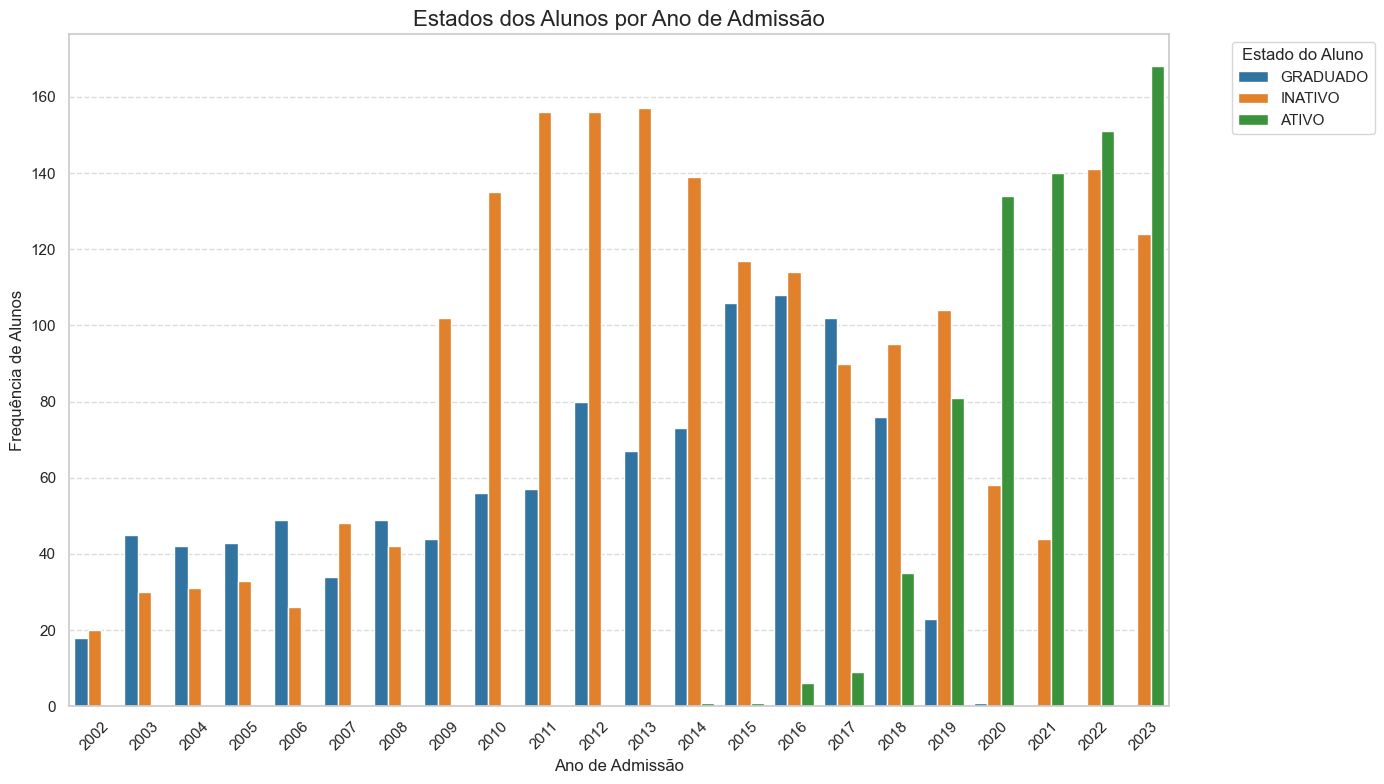

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Caminho para o arquivo de alunos
caminho_alunos = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/alunos.csv')

try:
    # Verificar se o arquivo existe
    if not os.path.exists(caminho_alunos):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_alunos}")

    # Carregar a tabela de alunos
    alunos_df = pd.read_csv(caminho_alunos, sep=';', low_memory=False)

    # Limpar os nomes das colunas
    alunos_df.columns = alunos_df.columns.str.strip()

    # Confirmar que as colunas necessárias existem
    if "TERMO_ADMISSAO" not in alunos_df.columns or "ESTADO" not in alunos_df.columns:
        raise KeyError("As colunas 'TERMO_ADMISSAO' ou 'ESTADO' não foram encontradas na tabela de alunos.")

    # Extrair o ano de admissão a partir do termo de admissão
    alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
        alunos_df["TERMO_ADMISSAO"].astype(str).str.split('.').str[0], errors='coerce'
    )
    alunos_df = alunos_df.dropna(subset=["ANO_ADMISSAO"])
    alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)

    # Agrupar por ano de admissão e estado, contando a frequência
    estado_por_ano = alunos_df.groupby(["ANO_ADMISSAO", "ESTADO"]).size().reset_index(name="Frequencia")

    # Visualizar os dados
    print("\nEstado dos Alunos por Ano de Admissão:")
    print(estado_por_ano.head())

    # Criar o gráfico de barras empilhadas
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=estado_por_ano,
        x="ANO_ADMISSAO",
        y="Frequencia",
        hue="ESTADO",
        palette="tab10"
    )

    # Configurar títulos e rótulos
    plt.title("Estados dos Alunos por Ano de Admissão", fontsize=16)
    plt.xlabel("Ano de Admissão", fontsize=12)
    plt.ylabel("Frequência de Alunos", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Estado do Aluno", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Exibir o gráfico
    plt.show()

except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado. {e}")
except KeyError as e:
    print(f"Erro: {e}")
except pd.errors.EmptyDataError:
    print("Erro: O arquivo está vazio ou corrompido.")
except pd.errors.ParserError:
    print("Erro: O arquivo não pôde ser analisado. Verifique o formato e os delimitadores.")
except Exception as e:
    print(f"Erro ao processar os dados: {e}")


### Interpretação do Gráfico: Frequência de Estados de Alunos por Ano de Admissão

- **Crescimento Recente**: 
  - Nos anos mais recentes (2021-2023), há um aumento significativo de alunos **Ativos**, refletindo crescimento nas admissões e maior retenção.

- **Altas Taxas de Evasão**: 
  - Os anos 2012 e 2013 apresentam alta frequência de alunos **Inativos**, indicando maior evasão nesse período.

- **Formações Consistentes**: 
  - O estado **Graduado** mantém uma frequência regular ao longo dos anos, com picos antes de 2016, sugerindo maior estabilidade na formação durante esse período.

- **Tendências e Impactos**:
  - A partir de 2009, há um aumento geral nas matrículas.
  - O número de **Inativos** diminui em anos recentes, indicando possíveis melhorias na retenção.

- **Recomendações**:
  - Analisar as razões da evasão nos anos de 2012 e 2013.
  - Investir em estratégias para manter a tendência de crescimento de alunos **Ativos** observada nos últimos anos.


In [14]:
import pandas as pd
import os

# Título do script
print("### Análise de Admissões e Estados dos Alunos (2002-2023) ###")

try:
    # Caminho para o arquivo alunos.csv
    caminho_tabela_alunos = os.path.expanduser('C:/Users/Big Data/Documents/Mestrado UFCG/Semestre 2024.2/LSD/Dados/Tabelas_0/alunos.csv')

    # Verificar se o arquivo existe
    if os.path.exists(caminho_tabela_alunos):
        print("\nO arquivo foi encontrado. Carregando agora...")

        # Carregar a tabela alunos.csv com o separador correto
        alunos_df = pd.read_csv(caminho_tabela_alunos, low_memory=False, sep=';')
        print("Tabela alunos.csv carregada com sucesso!")

        # Exibir as colunas disponíveis
        print("Colunas disponíveis:", alunos_df.columns)

        # Garantir que as colunas necessárias estejam disponíveis
        colunas_necessarias = ["TERMO_ADMISSAO", "ESTADO"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Tratar a coluna TERMO_ADMISSAO para extrair o ano
            alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
            )

            # Filtrar dados válidos e no período especificado
            alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)
            alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)
            alunos_df = alunos_df[(alunos_df["ANO_ADMISSAO"] >= 2002) & (alunos_df["ANO_ADMISSAO"] <= 2023)]

            # Contar o número total de admissões
            total_admissoes = alunos_df["ANO_ADMISSAO"].count()

            # Contar o número de evasões (ESTADO = "INATIVO")
            total_evasoes = alunos_df[alunos_df["ESTADO"] == "INATIVO"].shape[0]

            # Contar o número de graduados (ESTADO = "GRADUADO")
            total_graduados = alunos_df[alunos_df["ESTADO"] == "GRADUADO"].shape[0]

            # Contar o número de alunos ativos ou cursando (ESTADO = "ATIVO")
            total_ativos = alunos_df[alunos_df["ESTADO"] == "ATIVO"].shape[0]

            # Contar o número de alunos que trancaram (ESTADO = "TRANCADO"), se existir
            total_trancados = alunos_df[alunos_df["ESTADO"] == "TRANCADO"].shape[0] if "TRANCADO" in alunos_df["ESTADO"].unique() else 0

            # Exibir os resultados
            print("\n### Resumo dos Dados (2002-2023) ###")
            print(f"Total de admissões: {total_admissoes}")
            print(f"Total de evasões: {total_evasoes}")
            print(f"Total de graduados: {total_graduados}")
            print(f"Total de alunos ativos ou cursando: {total_ativos}")
            if total_trancados > 0:
                print(f"Total de alunos que trancaram: {total_trancados}")

            # Exibir percentuais
            print("\n### Percentuais Relativos ###")
            print(f"Percentual de evasões: {total_evasoes / total_admissoes * 100:.2f}%")
            print(f"Percentual de graduados: {total_graduados / total_admissoes * 100:.2f}%")
            print(f"Percentual de alunos ativos: {total_ativos / total_admissoes * 100:.2f}%")
            if total_trancados > 0:
                print(f"Percentual de alunos que trancaram: {total_trancados / total_admissoes * 100:.2f}%")
        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_tabela_alunos}")

except Exception as e:
    print(f"Erro ao carregar, tratar ou calcular os dados: {e}")


### Análise de Admissões e Estados dos Alunos (2002-2023) ###

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!
Colunas disponíveis: Index(['MATRICULA', 'ID_CIDADAO', 'NOME', 'IDADE', 'E-MAIL', 'GENERO',
       'ESTADO_CIVIL_ALUNOS', 'NACIONALIDADE', 'LOCAL_NASCIMENTO', 'ESTADO',
       'TERMO_ESTADO', 'RAZAO_INATIVIDADE', 'TIPO_ADMISSAO', 'TERMO_ADMISSAO',
       'POLITICA_AFIRMATIVA', 'TIPO_ENSINO_MEDIO',
       'ANO_FORMATURA_ENSINO_MEDIO', 'CODIGO_CURSO', 'CODIGO_CURRICULAR',
       ' ALUNOS_ATIVOS', 'EX_ALUNOS', 'ALUNOS_INATIVOS"'],
      dtype='object')

### Resumo dos Dados (2002-2023) ###
Total de admissões: 3761
Total de evasões: 1962
Total de graduados: 1073
Total de alunos ativos ou cursando: 726

### Percentuais Relativos ###
Percentual de evasões: 52.17%
Percentual de graduados: 28.53%
Percentual de alunos ativos: 19.30%


### Resumo de Interpretação dos Dados (2002-2023)

- **Total de Admissões**: 3.761 alunos foram admitidos no período analisado.
- **Evasões**: 1.962 alunos evadiram o curso, correspondendo a **52,2%** das admissões.
- **Graduados**: 1.073 alunos concluíram o curso, representando **28,5%** do total admitido.
- **Ativos ou Cursando**: 726 alunos permanecem ativos ou em andamento, o que equivale a **19,3%** das admissões.

**Observação**: A proporção de evasões é significativamente alta, indicando desafios institucionais ou acadêmicos na retenção de alunos. O número de alunos ativos, que começam a ser registrados a partir de 2016, pode apontar para políticas recentes de retenção e apoio aos estudantes.


### Foco nos anos com maior evasão

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!
Colunas disponíveis: Index(['MATRICULA', 'ID_CIDADAO', 'NOME', 'IDADE', 'E-MAIL', 'GENERO',
       'ESTADO_CIVIL_ALUNOS', 'NACIONALIDADE', 'LOCAL_NASCIMENTO', 'ESTADO',
       'TERMO_ESTADO', 'RAZAO_INATIVIDADE', 'TIPO_ADMISSAO', 'TERMO_ADMISSAO',
       'POLITICA_AFIRMATIVA', 'TIPO_ENSINO_MEDIO',
       'ANO_FORMATURA_ENSINO_MEDIO', 'CODIGO_CURSO', 'CODIGO_CURRICULAR',
       ' ALUNOS_ATIVOS', 'EX_ALUNOS', 'ALUNOS_INATIVOS'],
      dtype='object')


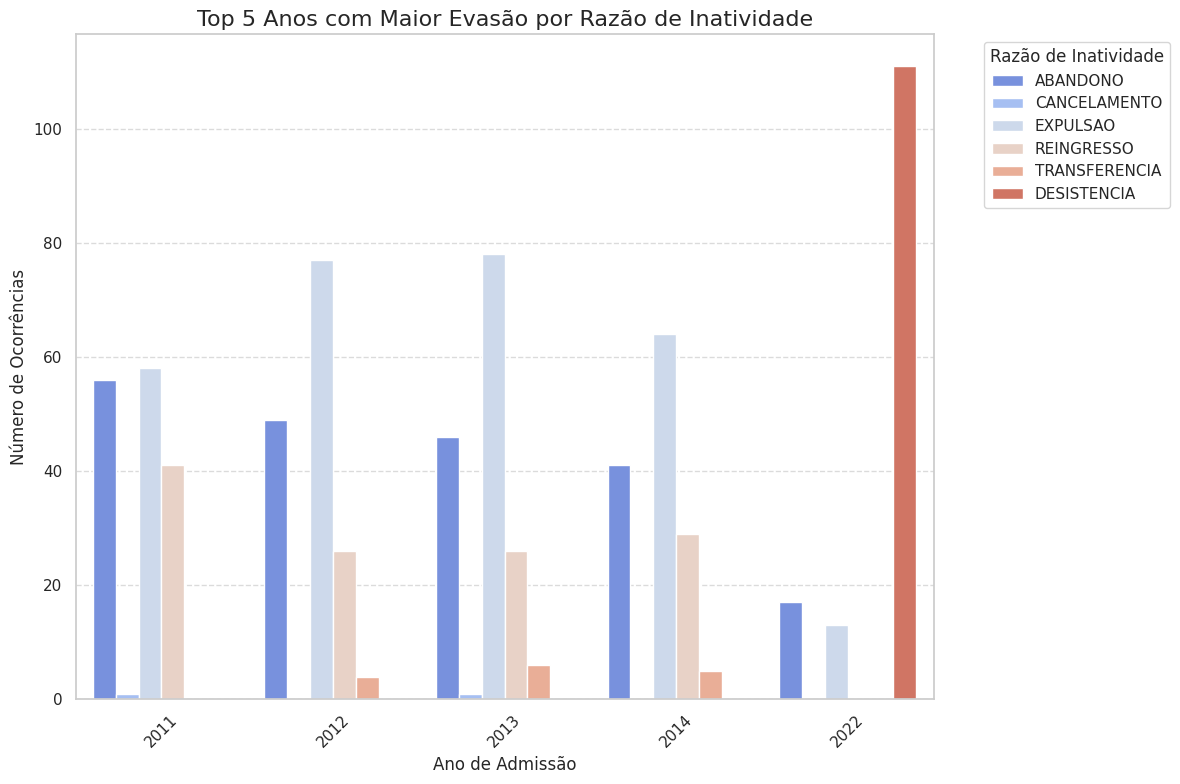

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")

try:
    # Caminho para o arquivo alunos.csv
    caminho_tabela_alunos = os.path.expanduser(
        '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
    )

    # Verificar se o arquivo existe
    if os.path.exists(caminho_tabela_alunos):
        print("O arquivo foi encontrado. Carregando agora...")

        # Carregar a tabela alunos.csv com o separador correto
        alunos_df = pd.read_csv(caminho_tabela_alunos, low_memory=False, sep=';')
        print("Tabela alunos.csv carregada com sucesso!")

        # Exibir as colunas disponíveis
        print("Colunas disponíveis:", alunos_df.columns)

        # Garantir que as colunas necessárias estejam disponíveis
        colunas_necessarias = ["TERMO_ADMISSAO", "ESTADO", "RAZAO_INATIVIDADE"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Tratar a coluna TERMO_ADMISSAO para extrair o ano
            alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
            )

            # Filtrar dados válidos e no período especificado
            alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)
            alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)
            alunos_df = alunos_df[(alunos_df["ANO_ADMISSAO"] >= 2002) & (alunos_df["ANO_ADMISSAO"] <= 2023)]

            # Focar nos anos com maior evasão (ESTADO = "INATIVO")
            evasoes_por_ano = alunos_df[alunos_df["ESTADO"] == "INATIVO"].groupby(["ANO_ADMISSAO", "RAZAO_INATIVIDADE"]).size().reset_index(name="Frequencia")

            # Selecionar os 5 anos com maior evasão
            top_anos = evasoes_por_ano.groupby("ANO_ADMISSAO")["Frequencia"].sum().nlargest(5).index
            top_evasoes = evasoes_por_ano[evasoes_por_ano["ANO_ADMISSAO"].isin(top_anos)]

            # Gerar gráfico dos anos com maior evasão por razão
            plt.figure(figsize=(12, 8))
            sns.barplot(
                data=top_evasoes,
                x="ANO_ADMISSAO",
                y="Frequencia",
                hue="RAZAO_INATIVIDADE",
                palette="coolwarm"
            )

            # Configurar títulos e rótulos
            plt.title("Top 5 Anos com Maior Evasão por Razão de Inatividade", fontsize=16)
            plt.xlabel("Ano de Admissão", fontsize=12)
            plt.ylabel("Número de Ocorrências", fontsize=12)
            plt.xticks(rotation=45)
            plt.legend(title="Razão de Inatividade", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.tight_layout()
            plt.show()

        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_tabela_alunos}")

except Exception as e:
    print(f"Erro ao carregar, tratar ou calcular os dados: {e}")


### Analisar Gênero:

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!
Colunas disponíveis: Index(['MATRICULA', 'ID_CIDADAO', 'NOME', 'IDADE', 'E-MAIL', 'GENERO',
       'ESTADO_CIVIL_ALUNOS', 'NACIONALIDADE', 'LOCAL_NASCIMENTO', 'ESTADO',
       'TERMO_ESTADO', 'RAZAO_INATIVIDADE', 'TIPO_ADMISSAO', 'TERMO_ADMISSAO',
       'POLITICA_AFIRMATIVA', 'TIPO_ENSINO_MEDIO',
       'ANO_FORMATURA_ENSINO_MEDIO', 'CODIGO_CURSO', 'CODIGO_CURRICULAR',
       ' ALUNOS_ATIVOS', 'EX_ALUNOS', 'ALUNOS_INATIVOS'],
      dtype='object')


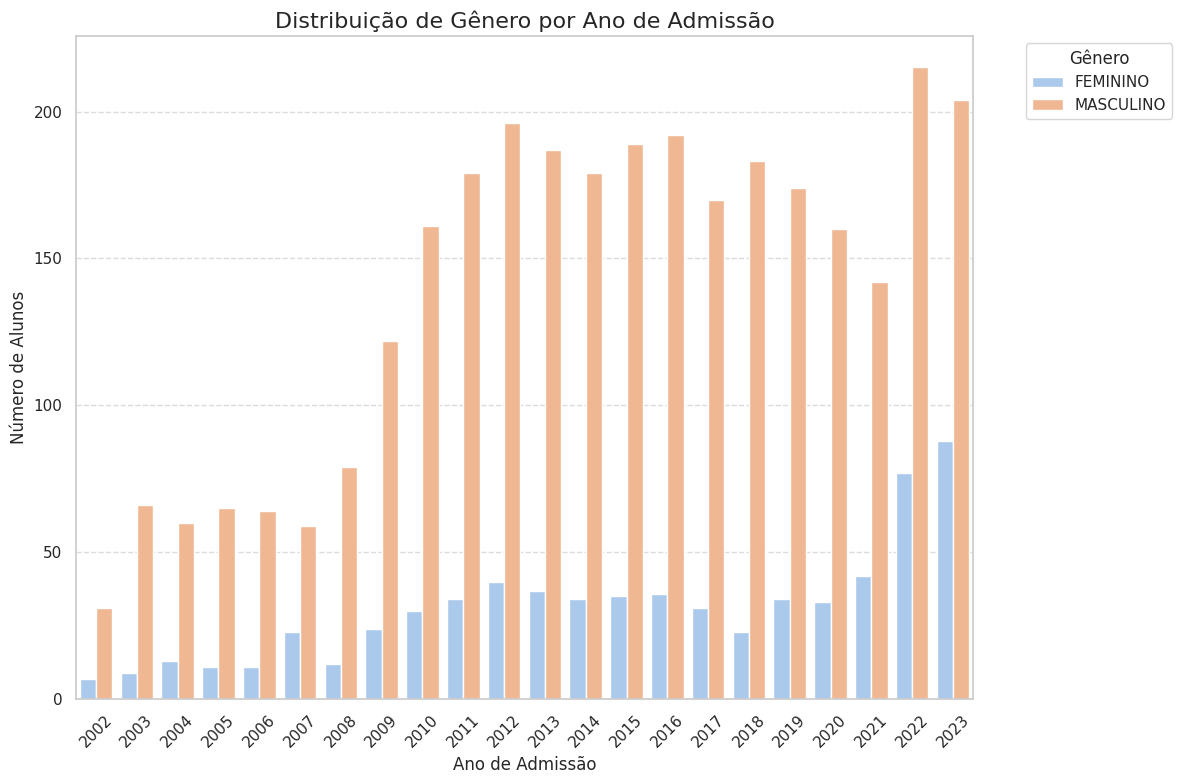

In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")

try:
    # Caminho para o arquivo alunos.csv
    caminho_tabela_alunos = os.path.expanduser(
        '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
    )

    # Verificar se o arquivo existe
    if os.path.exists(caminho_tabela_alunos):
        print("O arquivo foi encontrado. Carregando agora...")

        # Carregar a tabela alunos.csv com o separador correto
        alunos_df = pd.read_csv(caminho_tabela_alunos, low_memory=False, sep=';')
        print("Tabela alunos.csv carregada com sucesso!")

        # Exibir as colunas disponíveis
        print("Colunas disponíveis:", alunos_df.columns)

        # Garantir que as colunas necessárias estejam disponíveis
        colunas_necessarias = ["TERMO_ADMISSAO", "GENERO"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Tratar a coluna TERMO_ADMISSAO para extrair o ano
            alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
            )

            # Filtrar dados válidos e no período especificado
            alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)
            alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)
            alunos_df = alunos_df[(alunos_df["ANO_ADMISSAO"] >= 2002) & (alunos_df["ANO_ADMISSAO"] <= 2023)]

            # Contar o número de alunos por ano de admissão e gênero
            genero_por_ano = alunos_df.groupby(["ANO_ADMISSAO", "GENERO"]).size().reset_index(name="Frequencia")

            # Gerar gráfico de barras empilhadas
            plt.figure(figsize=(12, 8))
            sns.barplot(
                data=genero_por_ano,
                x="ANO_ADMISSAO",
                y="Frequencia",
                hue="GENERO",
                palette="pastel"
            )

            # Configurar títulos e rótulos
            plt.title("Distribuição de Gênero por Ano de Admissão", fontsize=16)
            plt.xlabel("Ano de Admissão", fontsize=12)
            plt.ylabel("Número de Alunos", fontsize=12)
            plt.xticks(rotation=45)
            plt.legend(title="Gênero", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.tight_layout()
            plt.show()

        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_tabela_alunos}")

except Exception as e:
    print(f"Erro ao carregar, tratar ou calcular os dados: {e}")


Razões de Inatividade para os Anos Recentes (2022 e 2023):
  RAZAO_DE_INATIVIDADE  Frequencia
0         DESCONHECIDO         319
1          DESISTENCIA         228
2             ABANDONO          21
3             EXPULSAO          16


/tmp/ipykernel_426886/3462860743.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=razoes_frequencia, x="RAZAO_DE_INATIVIDADE", y="Frequencia", palette="viridis")


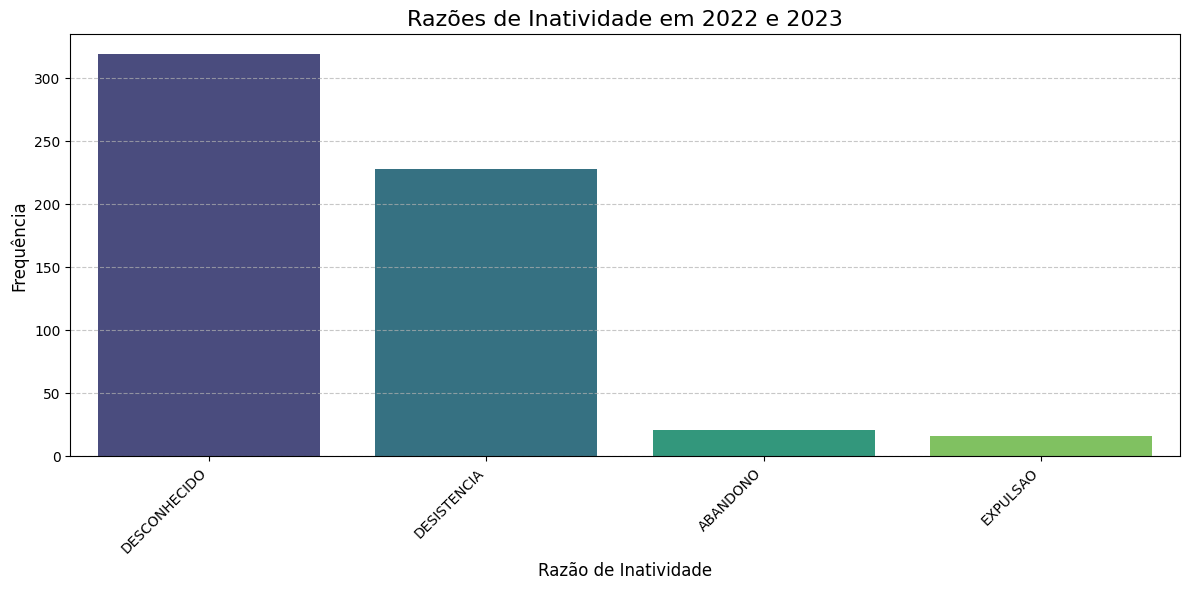

In [6]:

# Caminho para a tabela de alunos tratada
caminho_alunos = os.path.expanduser('~/Área de Trabalho/Semestre 2024.2/Dados/Tabelas_Tratadas/alunos_tratada.csv')

# Carregar a tabela
alunos_df = pd.read_csv(caminho_alunos)

# Garantir que as colunas TERMO_ADMISSAO e TERMO_ESTADO existem
if "TERMO_ADMISSAO" in alunos_df.columns:
    # Converter TERMO_ADMISSAO para string e extrair o ano
    alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
    alunos_df["ANO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].str.split('.').str[0].astype(int)

    # Filtrar os dados para os anos 2022 e 2023
    anos_recentes = [2022, 2023]
    dados_recentes = alunos_df[alunos_df["ANO_ADMISSAO"].isin(anos_recentes)]

    # Verificar se a coluna RAZAO_INATIVIDADE está presente
    if "RAZAO_INATIVIDADE" in dados_recentes.columns:
        # Contar a frequência de cada razão de inatividade
        razoes_frequencia = dados_recentes["RAZAO_INATIVIDADE"].value_counts().reset_index()
        razoes_frequencia.columns = ["RAZAO_DE_INATIVIDADE", "Frequencia"]

        # Exibir os dados
        print("Razões de Inatividade para os Anos Recentes (2022 e 2023):")
        print(razoes_frequencia)

        # Gerar o gráfico
        plt.figure(figsize=(12, 6))
        sns.barplot(data=razoes_frequencia, x="RAZAO_DE_INATIVIDADE", y="Frequencia", palette="viridis")
        plt.title("Razões de Inatividade em 2022 e 2023", fontsize=16)
        plt.xlabel("Razão de Inatividade", fontsize=12)
        plt.ylabel("Número dos Alunos Inativos", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("A coluna RAZAO_INATIVIDADE não está disponível nos dados filtrados.")
else:
    print("A coluna TERMO_ADMISSAO não está disponível na tabela.")


### Interpretação do Gráfico: Razões de Inatividade no Período 2022-2023

1. **Prevalência de Razões "Desconhecido" e "Desistência":**
   - A razão de inatividade mais frequente é **"DESCONHECIDO"**, com **319 ocorrências**. Isso reflete falhas significativas no registro dos motivos de inatividade, dificultando análises mais detalhadas.
   - A segunda razão mais frequente é **"DESISTÊNCIA"**, com **228 ocorrências**, indicando alunos que formalizaram a saída do curso nesse período. Isso pode estar relacionado a dificuldades de adaptação ou desafios específicos enfrentados no início do curso.

2. **Razões Menos Frequentes:**
   - **"ABANDONO"** (21 ocorrências) e **"EXPULSÃO"** (16 ocorrências) têm frequências bem menores, sugerindo que esses fatores representam uma parcela menor das inatividades.

3. **Possíveis Implicações:**
   - A alta frequência de "DESCONHECIDO" reforça a necessidade de melhorias na coleta e registro de dados sobre os motivos de evasão.
   - As desistências merecem atenção, com foco em estratégias para melhorar a retenção, especialmente nos primeiros períodos do curso.
   - Os dados de abandono e expulsão, embora baixos, podem representar fatores específicos que exigem abordagens distintas.

4. **Recomendações:**
   - Realizar campanhas para entender os reais motivos da evasão, especialmente para casos marcados como "DESCONHECIDO".
   - Implementar ações de acolhimento e suporte, principalmente voltadas para alunos de novos períodos.
   - Avaliar políticas institucionais relacionadas à expulsão e abandono, buscando identificar padrões e propor soluções.


### Disciplinas associadas evasão (2023)

Colunas em alunos_df: ['MATRICULA', 'ID_CIDADAO', 'NOME', 'IDADE', 'E-MAIL', 'GENERO', 'ESTADO_CIVIL_ALUNOS', 'NACIONALIDADE', 'LOCAL_NASCIMENTO', 'ESTADO', 'TERMO_ESTADO', 'RAZAO_INATIVIDADE', 'TIPO_ADMISSAO', 'TERMO_ADMISSAO', 'POLITICA_AFIRMATIVA', 'TIPO_ENSINO_MEDIO', 'ANO_FORMATURA_ENSINO_MEDIO', 'CODIGO_CURSO', 'CODIGO_CURRICULAR', ' ALUNOS_ATIVOS', 'EX_ALUNOS', 'ALUNOS_INATIVOS']
Colunas em matriculas_df: ['MATRICULA', 'CODIGO_DISCIPLINA', 'NOME', 'CREDITOS', 'HORAS', 'TERMO', 'ID_CLASS', 'NOTA', 'ESTATUS', 'TIPO']
Colunas em disciplinas_df: ['ANO', 'CODE', 'DISCIPLINA', 'ESTADO', 'CREDITO']


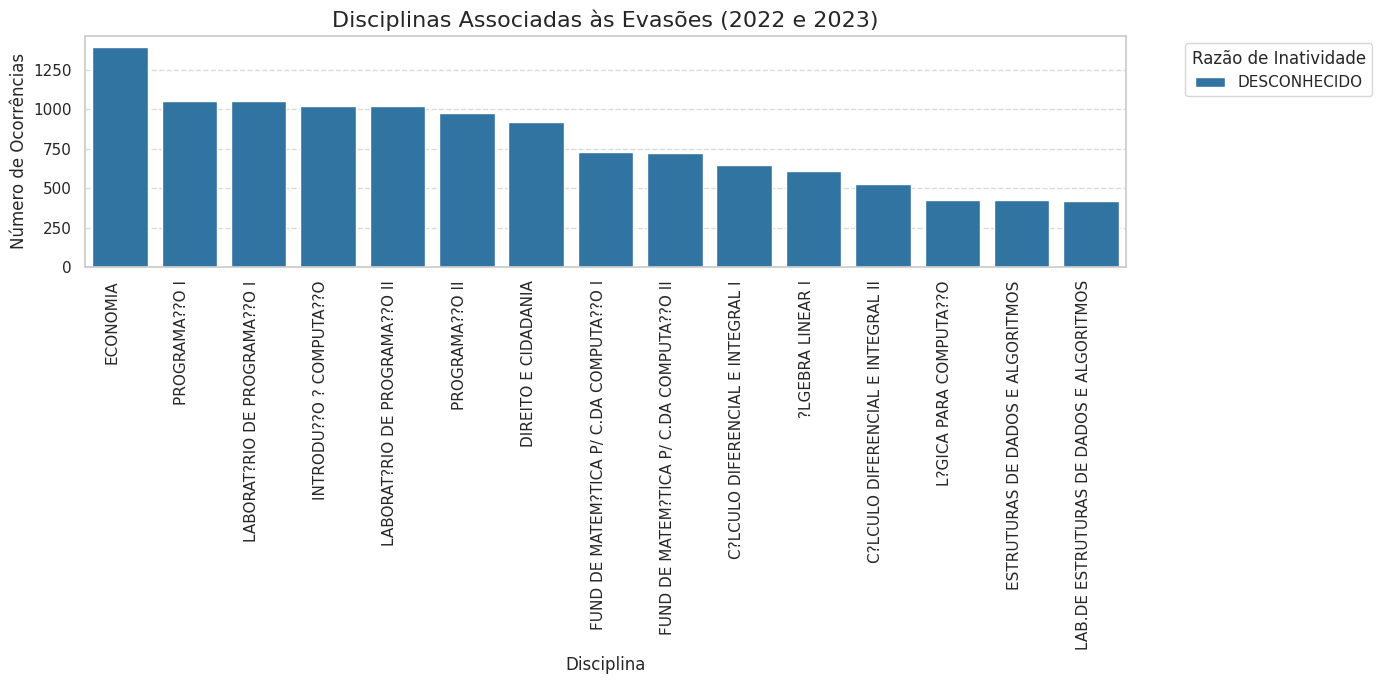

In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo do Seaborn
sns.set(style="whitegrid")

# Caminhos para as tabelas
caminho_alunos = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv')
caminho_matriculas = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/matriculas.csv')
caminho_disciplinas = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_disciplinas.csv')

try:
    # Carregar as tabelas com delimitadores apropriados
    alunos_df = pd.read_csv(caminho_alunos, sep=',', low_memory=False)
    matriculas_df = pd.read_csv(caminho_matriculas, sep=';', low_memory=False)
    disciplinas_df = pd.read_csv(caminho_disciplinas, sep=',', low_memory=False)

    # Exibir as colunas disponíveis em cada DataFrame
    print("Colunas em alunos_df:", alunos_df.columns.tolist())
    print("Colunas em matriculas_df:", matriculas_df.columns.tolist())
    print("Colunas em disciplinas_df:", disciplinas_df.columns.tolist())

    # Garantir consistência nos nomes das colunas
    disciplinas_df.rename(columns={"CODE": "CODIGO_DISCIPLINA"}, inplace=True)
    disciplinas_df["CODIGO_DISCIPLINA"] = disciplinas_df["CODIGO_DISCIPLINA"].astype(str)
    matriculas_df["CODIGO_DISCIPLINA"] = matriculas_df["CODIGO_DISCIPLINA"].astype(str)

    # Filtrar alunos admitidos em 2022 e 2023
    if "TERMO_ADMISSAO" in alunos_df.columns:
        alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
        alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
            alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
        )
        alunos_recentes = alunos_df[alunos_df["ANO_ADMISSAO"].isin([2022, 2023])]
    else:
        print("Coluna TERMO_ADMISSAO não encontrada em alunos.csv")
        alunos_recentes = pd.DataFrame()

    # Relacionar alunos com a tabela de matrículas
    if "MATRICULA" in matriculas_df.columns and "MATRICULA" in alunos_recentes.columns:
        relacao_matriculas = matriculas_df.merge(
            alunos_recentes[["MATRICULA", "RAZAO_INATIVIDADE"]],
            on="MATRICULA",
            how="inner"
        )
    else:
        print("Coluna MATRÍCULA não encontrada em uma das tabelas.")
        relacao_matriculas = pd.DataFrame()

    # Relacionar matrículas com a tabela de disciplinas
    if not relacao_matriculas.empty and "CODIGO_DISCIPLINA" in disciplinas_df.columns:
        relacao_completa = relacao_matriculas.merge(
            disciplinas_df[["CODIGO_DISCIPLINA", "DISCIPLINA", "ANO", "ESTADO", "CREDITO"]],
            on="CODIGO_DISCIPLINA",
            how="inner"  # Apenas disciplinas presentes nos dados
        )
    else:
        print("Colunas de relacionamento entre matrículas e disciplinas não encontradas.")
        relacao_completa = pd.DataFrame()

    # Análise e visualização
    if not relacao_completa.empty:
        # Agrupar por razão de inatividade e disciplina
        analise_disciplinas = relacao_completa.groupby(["RAZAO_INATIVIDADE", "DISCIPLINA"]).size().reset_index(name="Frequencia")
        
        # Ordenar por frequência e filtrar as disciplinas mais relevantes
        top_disciplinas = analise_disciplinas.sort_values(by="Frequencia", ascending=False).head(15)
        
        # Gráfico das disciplinas com mais evasões
        plt.figure(figsize=(14, 7))
        sns.barplot(
            data=top_disciplinas,
            x="DISCIPLINA",
            y="Frequencia",
            hue="RAZAO_INATIVIDADE",
            palette="tab10"
        )
        plt.title("Disciplinas Associadas às Evasões (2022 e 2023)", fontsize=16)
        plt.xlabel("Disciplina", fontsize=12)
        plt.ylabel("Número de Ocorrências", fontsize=12)
        plt.xticks(rotation=90, ha="right")
        plt.legend(title="Razão de Inatividade", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()
    else:
        print("Não foi possível realizar a análise de disciplinas.")

except Exception as e:
    print(f"Erro ao processar os dados: {e}")


### Interpretação do Gráfico: Disciplinas Associadas às Evasões (2022 e 2023)

1. **Pico de Evasões em 2022 e 2023:**
   - O gráfico destaca as disciplinas com maior frequência de evasões nos anos de maior pico de evasão, com razões predominantemente marcadas como "DESCONHECIDO".

2. **Disciplinas com Maior Frequência:**
   - **"Fundamentos de Matemática para Computação I e II"** aparecem com as maiores frequências, sugerindo que essas disciplinas representam desafios significativos para os alunos logo nos períodos iniciais.
   - **"Laboratório de Programação" e "Programação I"** também são notáveis, reforçando que matérias introdutórias à programação apresentam uma curva de aprendizado desafiadora.

3. **Foco em Disciplinas Introdutórias:**
   - Disciplinas como **"Introdução à Computação"** e **"Cálculo Diferencial e Integral"** apontam que os desafios iniciais na adaptação ao curso podem ser um fator central nas evasões.

4. **Possível Relação com Razões Desconhecidas:**
   - A predominância de "DESCONHECIDO" como razão de inatividade sugere falhas nos registros ou subnotificação, limitando a identificação precisa dos problemas enfrentados pelos alunos.

5. **Recomendações:**
   - Avaliar as dificuldades específicas enfrentadas pelos alunos nessas disciplinas.
   - Investir em estratégias de suporte, como tutoria ou revisão de currículo, especialmente em disciplinas de base nos primeiros períodos.
   - Melhorar os registros de razões de inatividade para obter dados mais precisos sobre os motivos de evasão.


### Gráfico de Gênero por Ano de Admissão:

### Distribuição de Gênero por Ano de Admissão

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!


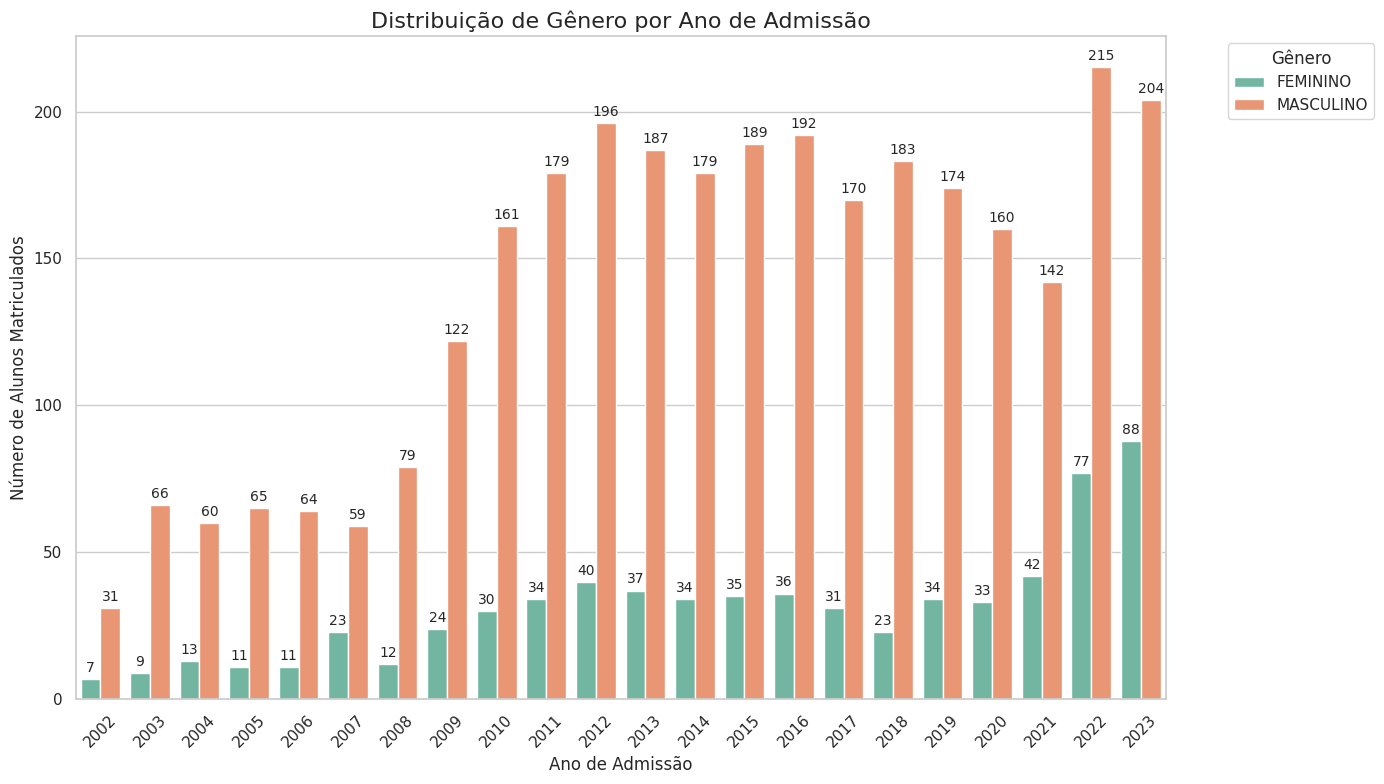

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Caminho para o arquivo alunos.csv no HD externo
caminho_alunos = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv')

try:
    # Verificar se o arquivo existe
    if os.path.exists(caminho_alunos):
        print("O arquivo foi encontrado. Carregando agora...")
        
        # Carregar a tabela alunos.csv
        alunos_df = pd.read_csv(caminho_alunos, sep=',', low_memory=False)
        print("Tabela alunos.csv carregada com sucesso!")

        # Garantir que as colunas necessárias estejam presentes
        colunas_necessarias = ["TERMO_ADMISSAO", "GENERO"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Tratar a coluna TERMO_ADMISSAO para extrair o ano
            alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].str.split('.').str[0],
                errors='coerce'
            )

            # Filtrar dados válidos
            alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)
            alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)

            # Calcular frequência por ano de admissão e gênero
            analise_genero = alunos_df.groupby(["ANO_ADMISSAO", "GENERO"]).size().reset_index(name="Frequencia")

            # Configurar o estilo do gráfico
            sns.set(style="whitegrid")

            # Criar o gráfico de barras agrupado
            plt.figure(figsize=(14, 8))
            ax = sns.barplot(
                data=analise_genero,
                x="ANO_ADMISSAO",
                y="Frequencia",
                hue="GENERO",
                palette="Set2"
            )

            # Adicionar valores detalhados acima de cada barra
            for container in ax.containers:
                ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, padding=3)

            # Adicionar títulos e rótulos
            plt.title("Distribuição de Gênero por Ano de Admissão", fontsize=16)
            plt.xlabel("Ano de Admissão", fontsize=12)
            plt.ylabel("Número de Alunos Matriculados", fontsize=12)
            plt.xticks(rotation=45)
            plt.legend(title="Gênero", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.tight_layout()

            # Exibir o gráfico
            plt.show()
        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_alunos}")

except Exception as e:
    print(f"Erro ao carregar, tratar ou visualizar os dados: {e}")


# Interpretação do Gráfico: Distribuição de Gênero por Ano de Admissão

## Descrição
O gráfico apresenta a distribuição de gênero entre os alunos matriculados por ano de admissão, considerando os anos de 2002 a 2023. As barras representam os gêneros **Masculino** e **Feminino**, permitindo uma comparação visual do número de alunos de cada gênero matriculados em cada ano.

## Observações
1. **Predominância Masculina**:
   - Em todos os anos analisados, o número de alunos do gênero **Masculino** é significativamente maior do que o de alunos do gênero **Feminino**.
   - A maior diferença é observada nos anos mais antigos (2002 a 2010), com o gênero masculino representando a grande maioria das matrículas.

2. **Tendência Crescente no Gênero Feminino**:
   - A partir de 2009, nota-se um crescimento gradual no número de matrículas do gênero **Feminino**, ainda que de forma discreta.
   - Em 2022 e 2023, o número de matrículas femininas foi mais expressivo, com 77 e 88 alunas respectivamente.

3. **Picos de Matrícula**:
   - O maior número de matrículas no gênero masculino ocorreu em 2022, com **215 matrículas**.
   - O maior número de matrículas no gênero feminino ocorreu em 2023, com **88 matrículas**.

4. **Redução Geral nas Matrículas em Alguns Anos**:
   - Entre 2014 e 2018, houve uma redução geral nas matrículas de ambos os gêneros, refletindo uma possível diminuição na procura ou oferta de vagas.

## Conclusão
Embora o gênero **Masculino** continue predominando nas matrículas ao longo dos anos, o aumento nas matrículas do gênero **Feminino** em anos recentes é um indicador positivo de maior inclusão e equilíbrio de gênero. Ainda há espaço para melhorias, especialmente no incentivo à participação feminina em cursos tradicionalmente dominados por homens.


###  Visualizar Porcentagem de Evasão entre Gêneros

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!


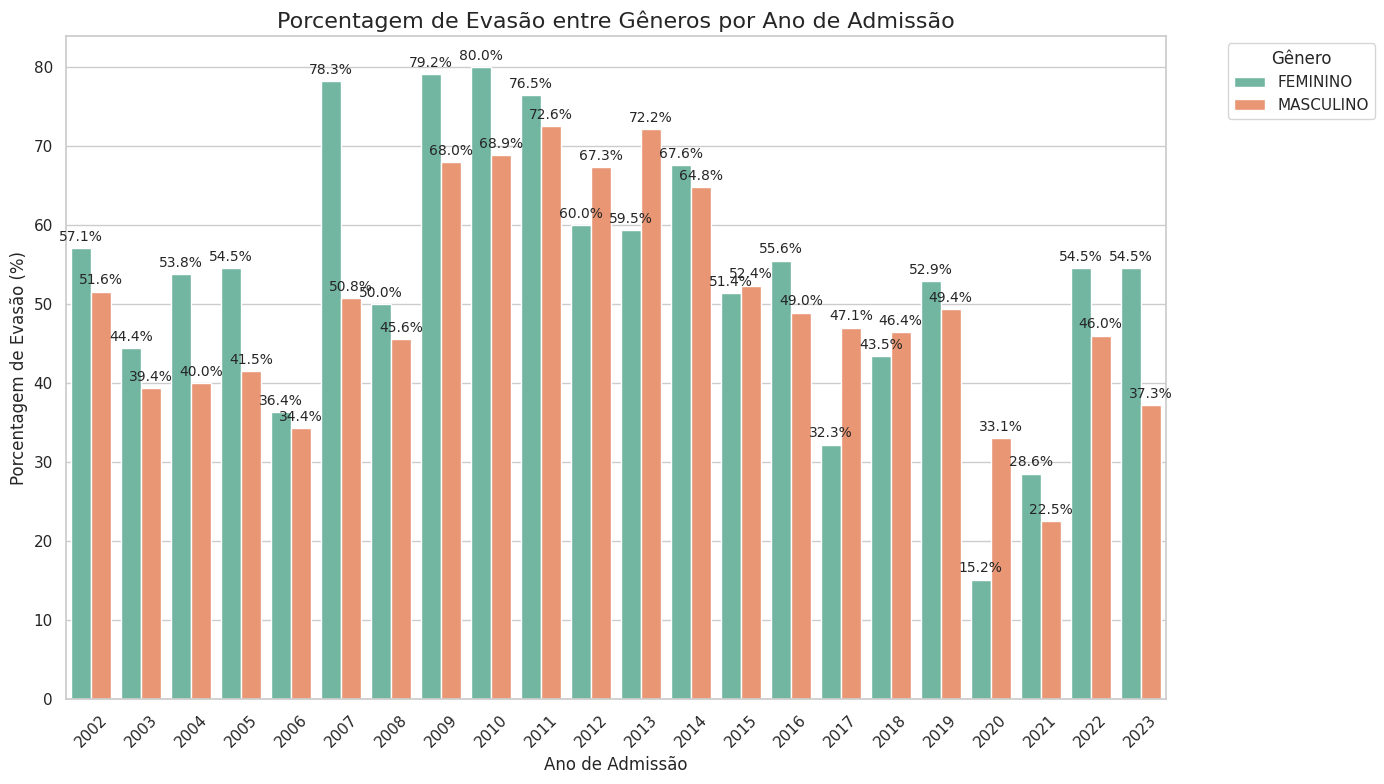

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configurar estilo do gráfico
sns.set(style="whitegrid")

try:
    # Caminho para o arquivo alunos.csv
    caminho_alunos = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv')

    # Verificar se o arquivo existe
    if os.path.exists(caminho_alunos):
        print("O arquivo foi encontrado. Carregando agora...")

        # Carregar a tabela alunos.csv
        alunos_df = pd.read_csv(caminho_alunos, sep=',', low_memory=False)
        print("Tabela alunos.csv carregada com sucesso!")

        # Garantir que as colunas necessárias estejam disponíveis
        colunas_necessarias = ["TERMO_ADMISSAO", "GENERO", "ESTADO"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Tratar a coluna TERMO_ADMISSAO para extrair o ano
            alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
            )
            
            # Filtrar dados válidos
            alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)
            alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)
            
            # Calcular porcentagens por gênero e estado (Evasão = "INATIVO")
            evasao_por_genero = alunos_df[alunos_df["ESTADO"] == "INATIVO"].groupby(
                ["ANO_ADMISSAO", "GENERO"]
            ).size().reset_index(name="Frequencia")
            
            total_por_ano = alunos_df.groupby(["ANO_ADMISSAO", "GENERO"]).size().reset_index(name="Total")
            porcentagem_genero = pd.merge(
                evasao_por_genero, total_por_ano, on=["ANO_ADMISSAO", "GENERO"]
            )
            porcentagem_genero["Porcentagem"] = (porcentagem_genero["Frequencia"] / porcentagem_genero["Total"]) * 100

            # Visualizar porcentagem de evasão entre gêneros
            plt.figure(figsize=(14, 8))
            ax = sns.barplot(
                data=porcentagem_genero,
                x="ANO_ADMISSAO",
                y="Porcentagem",
                hue="GENERO",
                palette="Set2"
            )
            
            # Adicionar valores detalhados acima das barras
            for container in ax.containers:
                ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

            # Configurar títulos e rótulos
            plt.title("Porcentagem de Evasão entre Gêneros por Ano de Admissão", fontsize=16)
            plt.xlabel("Ano de Admissão", fontsize=12)
            plt.ylabel("Porcentagem de Evasão (%)", fontsize=12)
            plt.xticks(rotation=45)
            plt.legend(title="Gênero", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.tight_layout()
            plt.show()

        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_alunos}")

except Exception as e:
    print(f"Erro ao carregar, tratar ou visualizar os dados: {e}")


### Porcentagem de Evasão entre Gêneros por Ano de Admissão

#### Resumo:
- **Gênero Feminino** apresentou maior taxa de evasão na maioria dos anos, com destaque para 2010 (80%).
- **Gênero Masculino** teve menores taxas de evasão, mas também atingiu picos, como em 2010 (68.9%).
- **Estabilização:** Entre 2013 e 2016, houve uma redução gradual nas diferenças de evasão entre os gêneros.
- **Redução Recente:** Em 2023, ambos os gêneros apresentaram a mesma taxa de evasão (7.3%), indicando uma tendência de paridade.

#### Conclusão:
- Foco em políticas para mitigar a evasão feminina nos períodos críticos (2009-2012).
- Sustentar a tendência de queda nas taxas de evasão observada nos últimos anos.


## Visualizar a Forma de Ingresso por Gênero

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!

Colunas disponíveis: ['MATRICULA', 'ID_CIDADAO', 'NOME', 'IDADE', 'E-MAIL', 'GENERO', 'ESTADO_CIVIL_ALUNOS', 'NACIONALIDADE', 'LOCAL_NASCIMENTO', 'ESTADO', 'TERMO_ESTADO', 'RAZAO_INATIVIDADE', 'TIPO_ADMISSAO', 'TERMO_ADMISSAO', 'POLITICA_AFIRMATIVA', 'TIPO_ENSINO_MEDIO', 'ANO_FORMATURA_ENSINO_MEDIO', 'CODIGO_CURSO', 'CODIGO_CURRICULAR', ' ALUNOS_ATIVOS', 'EX_ALUNOS', 'ALUNOS_INATIVOS']

Total de Ingressos por Gênero:
      GENERO  Total  Porcentagem
0   FEMININO    684    18.186652
1  MASCULINO   3077    81.813348

Total Geral de Ingressos: 3761


/tmp/ipykernel_962581/3569622546.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


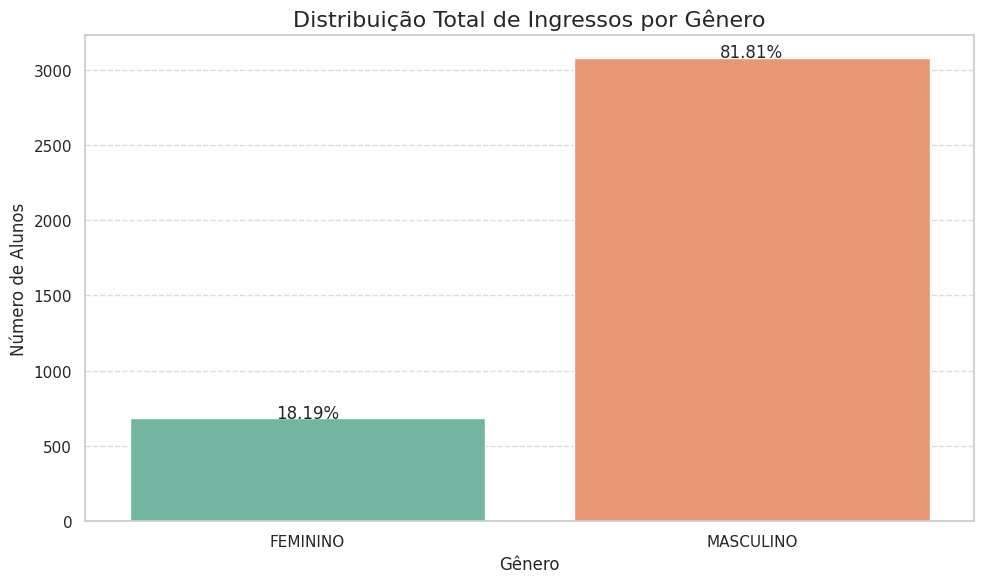

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Caminho para o arquivo alunos.csv
caminho_tabela_alunos = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv')

try:
    # Verificar se o arquivo existe
    if os.path.exists(caminho_tabela_alunos):
        print("O arquivo foi encontrado. Carregando agora...")
        
        # Carregar a tabela de alunos com um delimitador correto
        alunos_df = pd.read_csv(caminho_tabela_alunos, low_memory=False, sep=',')
        print("Tabela alunos.csv carregada com sucesso!")
        
        # Exibir as colunas disponíveis para verificar o formato
        print("\nColunas disponíveis:", alunos_df.columns.tolist())

        # Verificar se as colunas estão separadas incorretamente em uma única string
        if len(alunos_df.columns) == 1:
            print("Parece que as colunas não foram separadas corretamente. Tentando com outro delimitador (;)...")
            alunos_df = pd.read_csv(caminho_tabela_alunos, low_memory=False, sep=';')
            print("Tabela recarregada com o delimitador ';'.")
            print("\nColunas disponíveis após recarregar:", alunos_df.columns.tolist())

        # Garantir que as colunas necessárias estão presentes
        colunas_necessarias = ["GENERO", "TERMO_ADMISSAO"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Extrair o ano de admissão
            alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
            )
            
            # Calcular o total de ingressos por gênero
            total_ingressos = alunos_df.groupby("GENERO").size().reset_index(name="Total")
            
            # Calcular a porcentagem de ingressos por gênero
            total_geral = total_ingressos["Total"].sum()
            total_ingressos["Porcentagem"] = (total_ingressos["Total"] / total_geral) * 100
            
            # Exibir os resultados
            print("\nTotal de Ingressos por Gênero:")
            print(total_ingressos)
            
            # Exibir o total geral de ingressos
            print(f"\nTotal Geral de Ingressos: {total_geral}")

            # Gerar o gráfico de barras para o total de ingressos por gênero
            plt.figure(figsize=(10, 6))
            sns.barplot(
                data=total_ingressos,
                x="GENERO",
                y="Total",
                palette="Set2"
            )
            
            # Adicionar valores nas barras
            for index, row in total_ingressos.iterrows():
                plt.text(
                    x=index, 
                    y=row["Total"] + 5, 
                    s=f"{row['Porcentagem']:.2f}%", 
                    ha='center', 
                    fontsize=12
                )
            
            # Configurar títulos e rótulos
            plt.title("Distribuição Total de Ingressos por Gênero", fontsize=16)
            plt.xlabel("Gênero", fontsize=12)
            plt.ylabel("Número de Alunos", fontsize=12)
            plt.tight_layout()
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.show()
        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela após a análise.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_tabela_alunos}")

except Exception as e:
    print(f"Erro ao carregar, tratar ou calcular os dados: {e}")


## Resumo: Total de Ingressos por Gênero

### Resultados:
- **Feminino**:
  - Total: **684**
  - Porcentagem: **18.19%**

- **Masculino**:
  - Total: **3,077**
  - Porcentagem: **81.81%**

### Observação:
A distribuição de gênero mostra uma predominância de alunos do gênero **masculino**, com mais de 80% dos ingressos no período analisado.


## Visualizar os alunos segundo forma de ingresso 

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!

Tipos de Admissão:
       Tipo de Admissão  Quantidade  Porcentagem (%)
0                  SISU        2045        54.373837
1            VESTIBULAR        1591        42.302579
2         TRANSFERENCIA          55         1.462377
3               REOPCAO          34         0.904015
4  DECISAO_JUDICIAL_ADM          25         0.664717
5              GRADUADO           6         0.159532
6              CONVENIO           4         0.106355
7            REINGRESSO           1         0.026589


/tmp/ipykernel_962581/1227428846.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


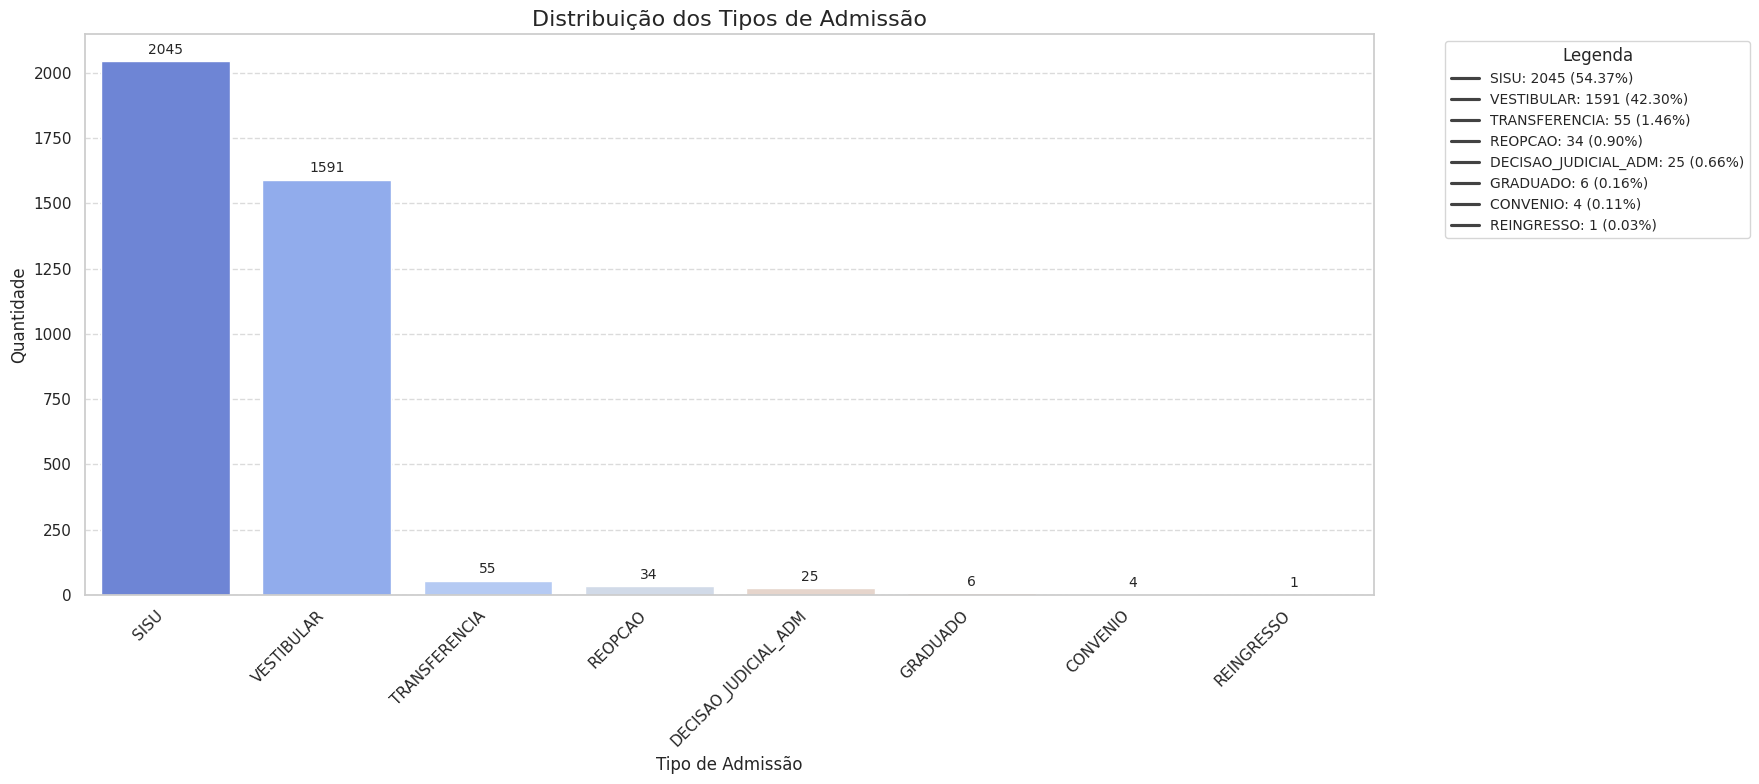

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

try:
    # Caminho para o arquivo alunos.csv
    caminho_alunos = os.path.expanduser(
        '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
    )

    # Verificar se o arquivo existe
    if os.path.exists(caminho_alunos):
        print("O arquivo foi encontrado. Carregando agora...")
        
        # Carregar o arquivo alunos.csv
        alunos_df = pd.read_csv(caminho_alunos, low_memory=False, sep=',')
        print("Tabela alunos.csv carregada com sucesso!")
        
        # Verificar se a coluna TIPO_ADMISSAO está disponível
        if "TIPO_ADMISSAO" in alunos_df.columns:
            # Contar os tipos de admissão
            tipos_admissao = alunos_df["TIPO_ADMISSAO"].value_counts().reset_index()
            tipos_admissao.columns = ["Tipo de Admissão", "Quantidade"]
            tipos_admissao["Porcentagem (%)"] = (tipos_admissao["Quantidade"] / tipos_admissao["Quantidade"].sum()) * 100

            # Exibir os dados no console
            print("\nTipos de Admissão:")
            print(tipos_admissao)

            # Criar gráfico de barras para tipos de admissão
            plt.figure(figsize=(14, 8))
            ax = sns.barplot(
                data=tipos_admissao,
                x="Tipo de Admissão",
                y="Quantidade",
                palette="coolwarm"
            )
            plt.title("Distribuição dos Tipos de Admissão", fontsize=16)
            plt.xlabel("Tipo de Admissão", fontsize=12)
            plt.ylabel("Quantidade", fontsize=12)
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.grid(axis="y", linestyle="--", alpha=0.7)

            # Adicionar valores detalhados no gráfico
            for container in ax.containers:
                ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, padding=3)

            # Adicionar legenda
            plt.legend(
                labels=[
                    f'{row["Tipo de Admissão"]}: {row["Quantidade"]} ({row["Porcentagem (%)"]:.2f}%)'
                    for _, row in tipos_admissao.iterrows()
                ],
                title="Legenda",
                bbox_to_anchor=(1.05, 1),
                loc="upper left",
                fontsize=10
            )

            # Exibir o gráfico
            plt.show()

        else:
            print("A coluna 'TIPO_ADMISSAO' não foi encontrada no dataset.")

    else:
        print(f"O arquivo não foi encontrado no caminho: {caminho_alunos}")

except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


### Agrupar por GÊNERO e TIPO_ADMISSAO, contando a frequência

O arquivo foi encontrado. Carregando agora...
Tabela alunos.csv carregada com sucesso!

Tipos de Admissão por Gênero:
           TIPO_ADMISSAO     GENERO  Quantidade  Total  Porcentagem
0               CONVENIO   FEMININO           1    684     0.146199
1               CONVENIO  MASCULINO           3   3077     0.097498
2   DECISAO_JUDICIAL_ADM   FEMININO           4    684     0.584795
3   DECISAO_JUDICIAL_ADM  MASCULINO          21   3077     0.682483
4               GRADUADO   FEMININO           2    684     0.292398
5               GRADUADO  MASCULINO           4   3077     0.129997
6             REINGRESSO  MASCULINO           1   3077     0.032499
7                REOPCAO   FEMININO           7    684     1.023392
8                REOPCAO  MASCULINO          27   3077     0.877478
9                   SISU   FEMININO         399    684    58.333333
10                  SISU  MASCULINO        1646   3077    53.493663
11         TRANSFERENCIA   FEMININO           6    684     0.87719

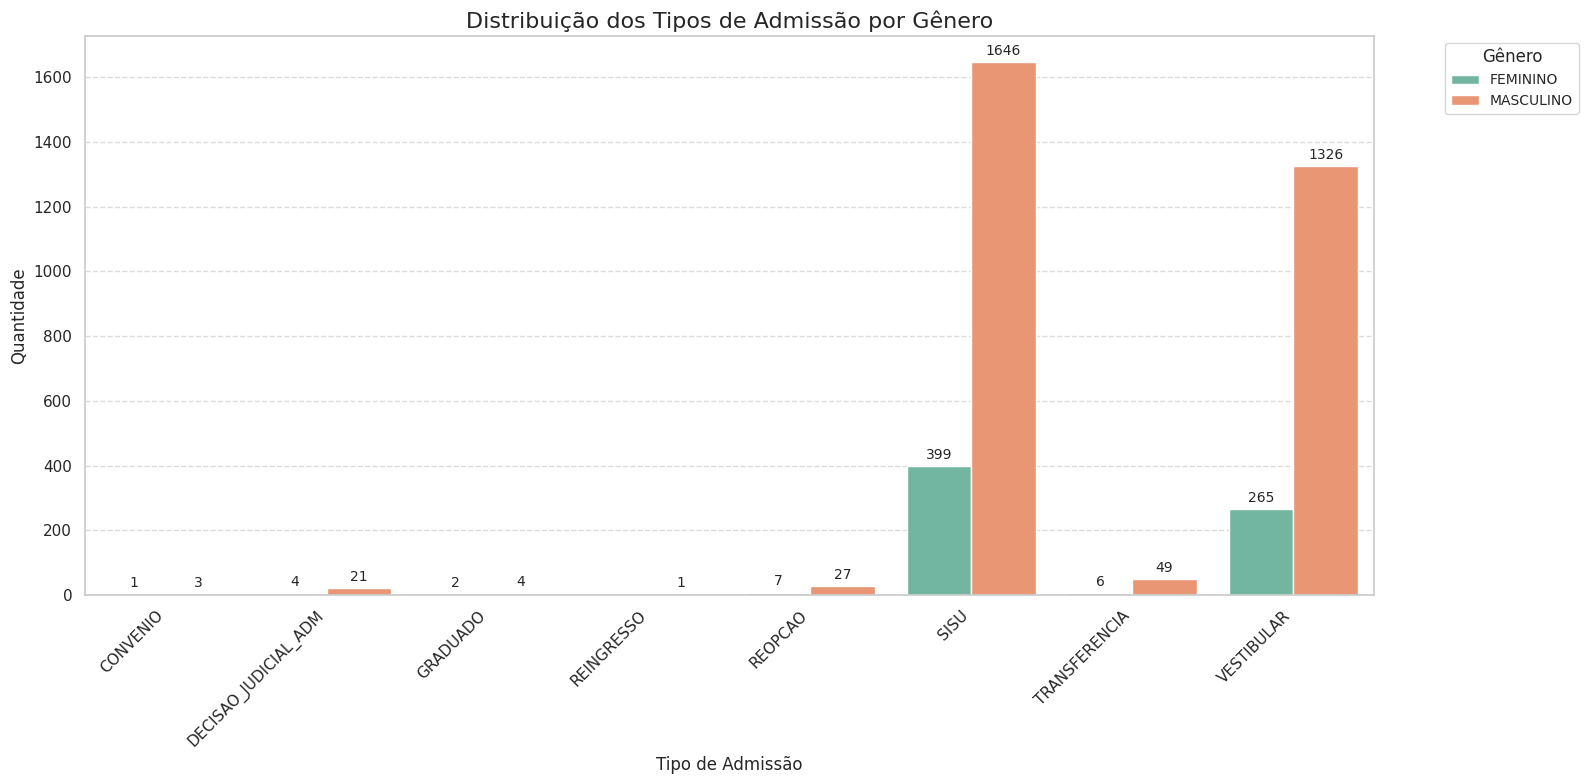

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

try:
    # Caminho para o arquivo alunos.csv
    caminho_alunos = os.path.expanduser(
        '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
    )

    # Verificar se o arquivo existe
    if os.path.exists(caminho_alunos):
        print("O arquivo foi encontrado. Carregando agora...")
        
        # Carregar o arquivo alunos.csv
        alunos_df = pd.read_csv(caminho_alunos, low_memory=False, sep=',')
        print("Tabela alunos.csv carregada com sucesso!")
        
        # Verificar se as colunas TIPO_ADMISSAO e GENERO estão disponíveis
        if "TIPO_ADMISSAO" in alunos_df.columns and "GENERO" in alunos_df.columns:
            # Agrupar por tipo de admissão e gênero
            tipos_genero = alunos_df.groupby(["TIPO_ADMISSAO", "GENERO"]).size().reset_index(name="Quantidade")
            total_por_genero = tipos_genero.groupby("GENERO")["Quantidade"].sum().reset_index(name="Total")
            tipos_genero = tipos_genero.merge(total_por_genero, on="GENERO")
            tipos_genero["Porcentagem"] = (tipos_genero["Quantidade"] / tipos_genero["Total"]) * 100

            # Exibir os dados no console
            print("\nTipos de Admissão por Gênero:")
            print(tipos_genero)

            # Criar gráfico de barras empilhadas
            plt.figure(figsize=(14, 8))
            ax = sns.barplot(
                data=tipos_genero,
                x="TIPO_ADMISSAO",
                y="Quantidade",
                hue="GENERO",
                palette="Set2"
            )
            plt.title("Distribuição dos Tipos de Admissão por Gênero", fontsize=16)
            plt.xlabel("Tipo de Admissão", fontsize=12)
            plt.ylabel("Quantidade", fontsize=12)
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.grid(axis="y", linestyle="--", alpha=0.7)

            # Adicionar valores detalhados no gráfico
            for container in ax.containers:
                ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, padding=3)

            # Adicionar legenda detalhada
            plt.legend(
                title="Gênero",
                bbox_to_anchor=(1.05, 1),
                loc="upper left",
                fontsize=10
            )

            # Exibir o gráfico
            plt.show()

        else:
            print("As colunas necessárias ('TIPO_ADMISSAO', 'GENERO') não foram encontradas no dataset.")

    else:
        print(f"O arquivo não foi encontrado no caminho: {caminho_alunos}")

except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


Detalhes da Forma de Ingresso por Gênero:
       GENERO         TIPO_ADMISSAO  Frequencia
0    FEMININO              CONVENIO           1
1    FEMININO  DECISAO_JUDICIAL_ADM           4
2    FEMININO              GRADUADO           2
3    FEMININO               REOPCAO           7
4    FEMININO                  SISU         399
5    FEMININO         TRANSFERENCIA           6
6    FEMININO            VESTIBULAR         265
7   MASCULINO              CONVENIO           3
8   MASCULINO  DECISAO_JUDICIAL_ADM          21
9   MASCULINO              GRADUADO           4
10  MASCULINO            REINGRESSO           1
11  MASCULINO               REOPCAO          27
12  MASCULINO                  SISU        1646
13  MASCULINO         TRANSFERENCIA          49
14  MASCULINO            VESTIBULAR        1326


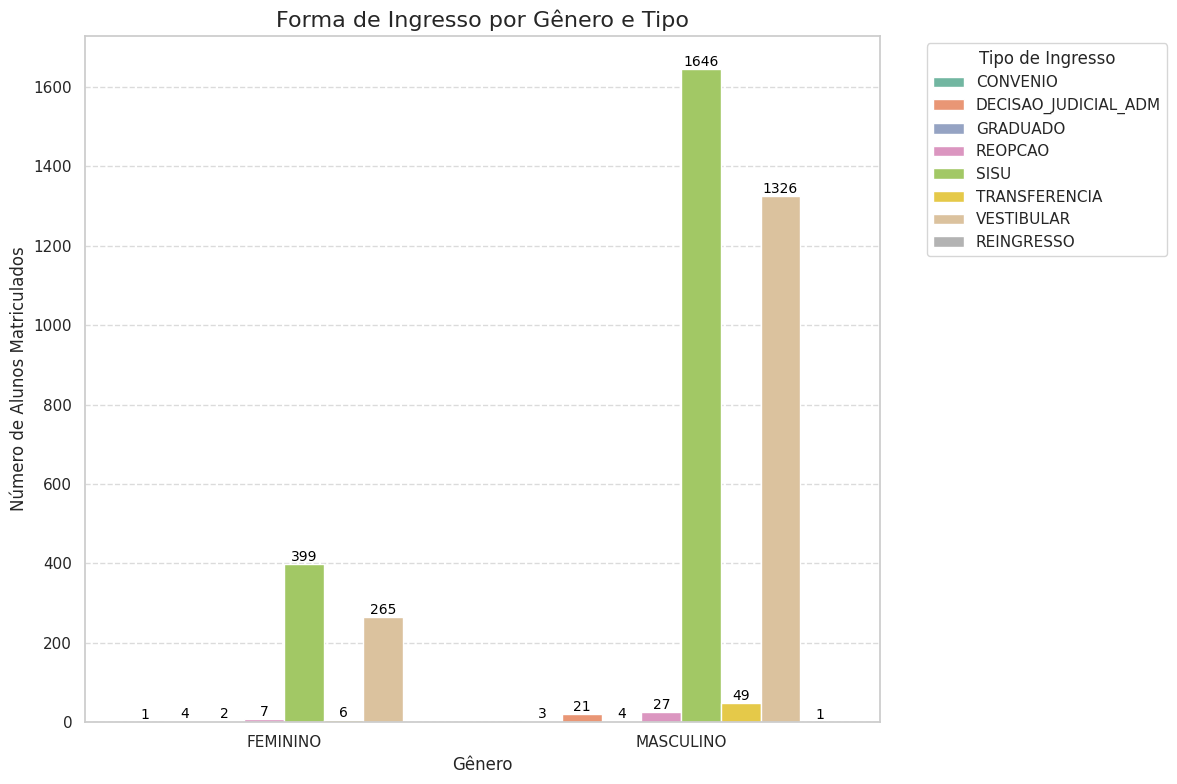

In [25]:
# Agrupar por GÊNERO e TIPO_ADMISSAO, contando a frequência
ingresso_detalhado = alunos_df.groupby(["GENERO", "TIPO_ADMISSAO"]).size().reset_index(name="Frequencia")

# Visualizar os dados
print("Detalhes da Forma de Ingresso por Gênero:")
print(ingresso_detalhado)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=ingresso_detalhado,
    x="GENERO",
    y="Frequencia",
    hue="TIPO_ADMISSAO",
    palette="Set2"
)

# Adicionar rótulos de frequência em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(
            f"{int(height)}",  # Formatar o valor como número inteiro
            (p.get_x() + p.get_width() / 2., height),
            ha="center", va="bottom", fontsize=10, color="black"
        )

# Adicionar títulos e rótulos
plt.title("Forma de Ingresso por Gênero e Tipo", fontsize=16)
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Número de Alunos Matriculados", fontsize=12)
plt.legend(title="Tipo de Ingresso", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar o layout e exibir a grade
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Interpretação do Gráfico: Forma de Ingresso por Gênero e Tipo

O gráfico apresenta a distribuição dos diferentes tipos de ingresso na instituição, separados pelos gêneros **Feminino** e **Masculino**, com as seguintes observações principais:

- **Gênero Masculino:**
  - É o gênero com maior número de alunos ingressantes, destacando-se nas formas de ingresso:
    - **SISU:** 1646 ingressos, sendo a modalidade mais utilizada.
    - **VESTIBULAR:** 1326 ingressos, a segunda modalidade mais comum.
    - **TRANSFERÊNCIA:** 49 ingressos.
    - **GRADUADO:** Apenas 27 ingressos.
  - Modalidades menos representadas incluem **CONVÊNIO** (3) e **REINGRESSO** (1).

- **Gênero Feminino:**
  - Representa uma parcela menor do total de ingressantes em relação ao masculino.
  - Destaca-se principalmente em:
    - **SISU:** 399 ingressos, liderando entre as formas de ingresso para o gênero feminino.
    - **VESTIBULAR:** 265 ingressos, a segunda forma mais comum.
  - Outras modalidades possuem números insignificantes ou mínimos, como **DECISÃO JUDICIAL** (7) e **TRANSFERÊNCIA** (6).

- **Diferenciais entre os Gêneros:**
  - O gênero masculino possui números muito superiores em todas as categorias de ingresso, especialmente no **SISU** e **VESTIBULAR**.
  - O gênero feminino apresenta uma proporção maior de ingressantes nas modalidades **DECISÃO JUDICIAL** e **CONVÊNIO** em comparação com os números masculinos.

- **Legenda e Visualização:**
  - A legenda detalha claramente os tipos de ingresso com cores distintas, facilitando a identificação e interpretação dos dados.

Este gráfico evidencia a predominância de alunos do gênero masculino na maioria das formas de ingresso, refletindo possíveis diferenças de acesso ou escolha de cursos relacionados ao perfil dos ingressantes.


### Análise do Percentual do Estado dos Alunos por Ano de Admissão

Tabela alunos.csv carregada com sucesso!

Percentual de Estados dos Alunos:
     ESTADO  PERCENTUAL
0   INATIVO   52.166977
1  GRADUADO   28.529646
2     ATIVO   19.303377


/tmp/ipykernel_962581/2604013867.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


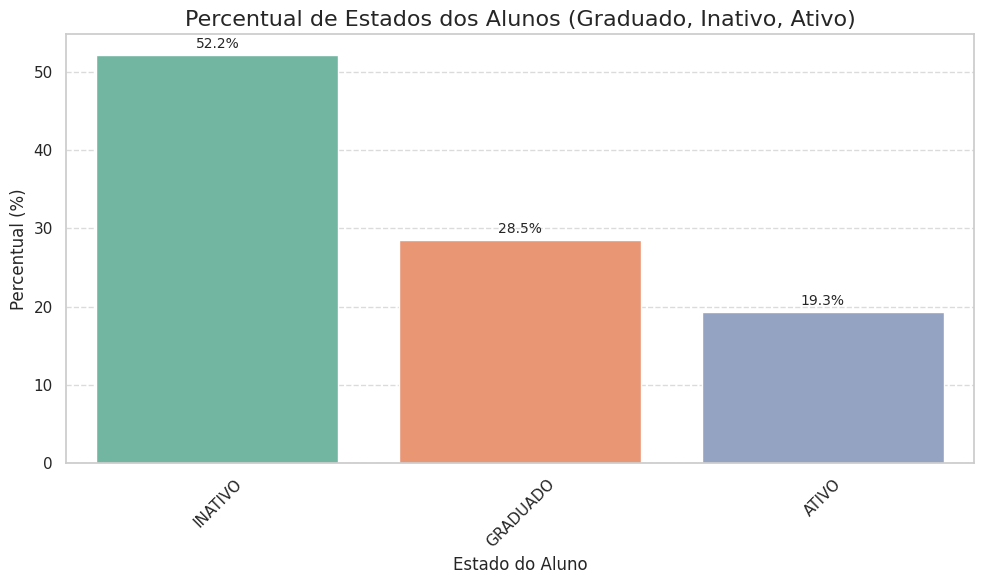

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caminho para o arquivo de alunos
caminho_alunos = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv')

try:
    # Carregar os dados
    alunos_df = pd.read_csv(caminho_alunos, sep=',')
    print("Tabela alunos.csv carregada com sucesso!")

    # Verificar se as colunas necessárias estão presentes
    colunas_necessarias = ["ESTADO"]
    if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
        # Contar a frequência de cada estado
        estado_frequencia = alunos_df["ESTADO"].value_counts()

        # Calcular o percentual de cada estado
        estado_percentual = (estado_frequencia / estado_frequencia.sum()) * 100
        estado_percentual_df = estado_percentual.reset_index()
        estado_percentual_df.columns = ["ESTADO", "PERCENTUAL"]

        # Exibir os resultados
        print("\nPercentual de Estados dos Alunos:")
        print(estado_percentual_df)

        # Criar o gráfico de barras
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(
            data=estado_percentual_df,
            x="ESTADO",
            y="PERCENTUAL",
            palette="Set2"
        )

        # Adicionar valores detalhados acima de cada barra
        for container in ax.containers:
            ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10, padding=3)

        # Adicionar títulos e rótulos
        plt.title("Percentual de Estados dos Alunos (Graduado, Inativo, Ativo)", fontsize=16)
        plt.xlabel("Estado do Aluno", fontsize=12)
        plt.ylabel("Percentual (%)", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()

        # Exibir o gráfico
        plt.show()
    else:
        print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")

except Exception as e:
    print(f"Erro ao carregar, tratar ou visualizar os dados: {e}")


Tabela alunos.csv carregada com sucesso!
Visualização inicial das colunas de anos geradas:
  TERMO_ADMISSAO  ANO_ADMISSAO TERMO_ESTADO  ANO_TERMO    ESTADO
0         2002.2          2002       2002.2     2002.0   INATIVO
1         2002.2          2002       2009.1     2009.0  GRADUADO
2         2002.2          2002       2005.1     2005.0   INATIVO
3         2002.2          2002       2004.1     2004.0  GRADUADO
4         2002.2          2002       2007.1     2007.0  GRADUADO
Estado dos Alunos por Ano de Admissão:
    ANO_ADMISSAO    ESTADO  Frequencia  Percentual
0           2002  GRADUADO          18   47.368421
1           2002   INATIVO          20   52.631579
2           2003  GRADUADO          45   60.000000
3           2003   INATIVO          30   40.000000
4           2004  GRADUADO          42   57.534247
5           2004   INATIVO          31   42.465753
6           2005  GRADUADO          43   56.578947
7           2005   INATIVO          33   43.421053
8           2006  GRA

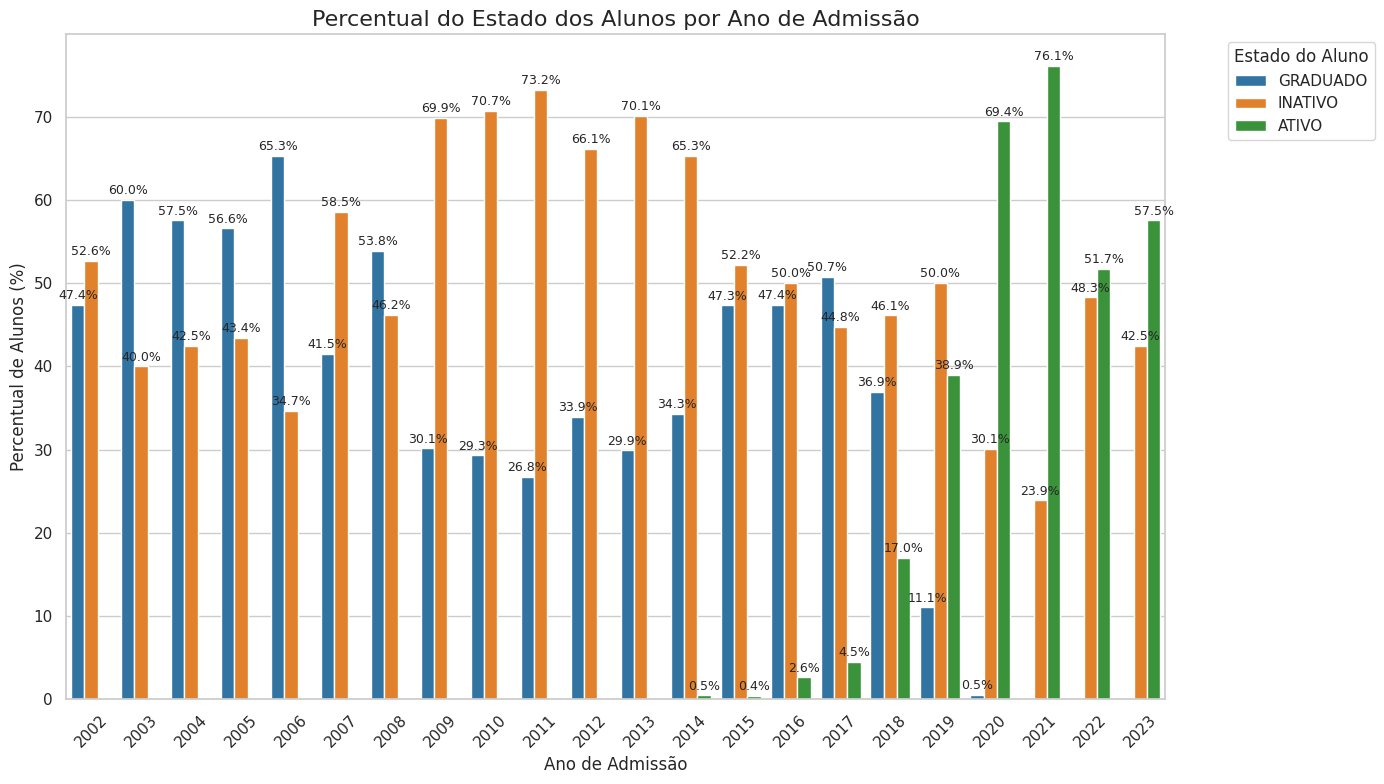

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caminho para o arquivo de dados
caminho_alunos = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'

try:
    # Carregar os dados
    alunos_df = pd.read_csv(caminho_alunos, sep=',')
    print("Tabela alunos.csv carregada com sucesso!")

    # Converter colunas para string e tratar valores nulos
    alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str).fillna("")
    alunos_df["TERMO_ESTADO"] = alunos_df["TERMO_ESTADO"].astype(str).fillna("")

    # Criar as colunas de ANO_ADMISSAO e ANO_TERMO
    alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
        alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
    )
    alunos_df["ANO_TERMO"] = pd.to_numeric(
        alunos_df["TERMO_ESTADO"].str.split('.').str[0], errors='coerce'
    )

    # Verificar se as colunas foram geradas corretamente
    print("Visualização inicial das colunas de anos geradas:")
    print(alunos_df[["TERMO_ADMISSAO", "ANO_ADMISSAO", "TERMO_ESTADO", "ANO_TERMO", "ESTADO"]].head())

    # Remover dados com anos inválidos
    alunos_df = alunos_df.dropna(subset=["ANO_ADMISSAO"])
    alunos_df = alunos_df[alunos_df["ANO_ADMISSAO"] >= 2002]

    # Agrupar por ANO_ADMISSAO e ESTADO, calculando o total e o percentual
    estado_por_ano = alunos_df.groupby(["ANO_ADMISSAO", "ESTADO"]).size().reset_index(name="Frequencia")

    # Adicionar uma coluna de percentual por ano de admissão
    estado_por_ano["Percentual"] = estado_por_ano.groupby("ANO_ADMISSAO")["Frequencia"].transform(lambda x: (x / x.sum()) * 100)

    # Visualizar os dados agrupados
    print("Estado dos Alunos por Ano de Admissão:")
    print(estado_por_ano)

    # Configurar o estilo do gráfico
    sns.set(style="whitegrid")

    # Criar o gráfico de barras empilhadas para visualizar percentuais por ano de admissão
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        data=estado_por_ano,
        x="ANO_ADMISSAO",
        y="Percentual",
        hue="ESTADO",
        palette="tab10"
    )

    # Adicionar títulos e rótulos
    plt.title("Percentual do Estado dos Alunos por Ano de Admissão", fontsize=16)
    plt.xlabel("Ano de Admissão", fontsize=12)
    plt.ylabel("Percentual de Alunos (%)", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Estado do Aluno", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()

    # Adicionar valores detalhados em cima de cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9, padding=2)

    # Exibir o gráfico
    plt.show()

except Exception as e:
    print(f"Erro ao processar os dados: {e}")


## **Interpretação do Gráfico: Percentual do Estado dos Alunos por Ano de Admissão**

### **Descrição Geral**
O gráfico apresenta a distribuição percentual dos estados dos alunos (Graduado, Inativo e Ativo) ao longo dos anos de admissão, permitindo uma análise da evolução do desempenho acadêmico e da retenção ao longo do tempo.

### **Principais Observações**
1. **Tendência de Inatividade:**
   - Nos anos iniciais (2005 a 2013), o percentual de alunos inativos apresenta um crescimento contínuo, atingindo **70% ou mais** em anos como 2012 e 2013.
   - A partir de 2016, observa-se uma leve redução no percentual de inatividade, mas ela ainda continua significativa em comparação com outros estados.

2. **Tendência de Graduação:**
   - O percentual de alunos graduados é expressivo nos anos mais antigos (2005 a 2010), variando entre **40% a 60%**, indicando uma boa taxa de conclusão no passado.
   - Nos anos mais recentes, o percentual de graduados é menor, especialmente devido ao fato de muitos alunos ainda estarem ativos.

3. **Tendência de Alunos Ativos:**
   - Nos anos mais recentes (2021 e 2022), há um aumento substancial no percentual de alunos ativos, atingindo **76.1% em 2022**.
   - Esse crescimento reflete uma melhora na retenção dos alunos nos cursos nos últimos anos.

### **Destaques por Ano**
- **2005 a 2013:** 
  - Predomínio de alunos graduados e inativos.
  - Percentuais de inatividade crescentes, ultrapassando 70% em 2012 e 2013.
- **2014 a 2020:**
  - Uma maior divisão entre alunos inativos e ativos.
  - Redução gradual no percentual de graduados.
- **2021 e 2022:**
  - Percentual de alunos ativos cresce significativamente, ultrapassando a marca de **70% em 2022**, o maior registrado no período analisado.

### **Conclusão**
O gráfico revela uma transição no perfil acadêmico ao longo dos anos, com uma tendência de redução de inatividade e aumento de alunos ativos nos anos mais recentes. A alta inatividade nos períodos anteriores sugere a necessidade de estratégias institucionais para melhorar a retenção e o desempenho acadêmico dos alunos.


### Gráfico disciplinas

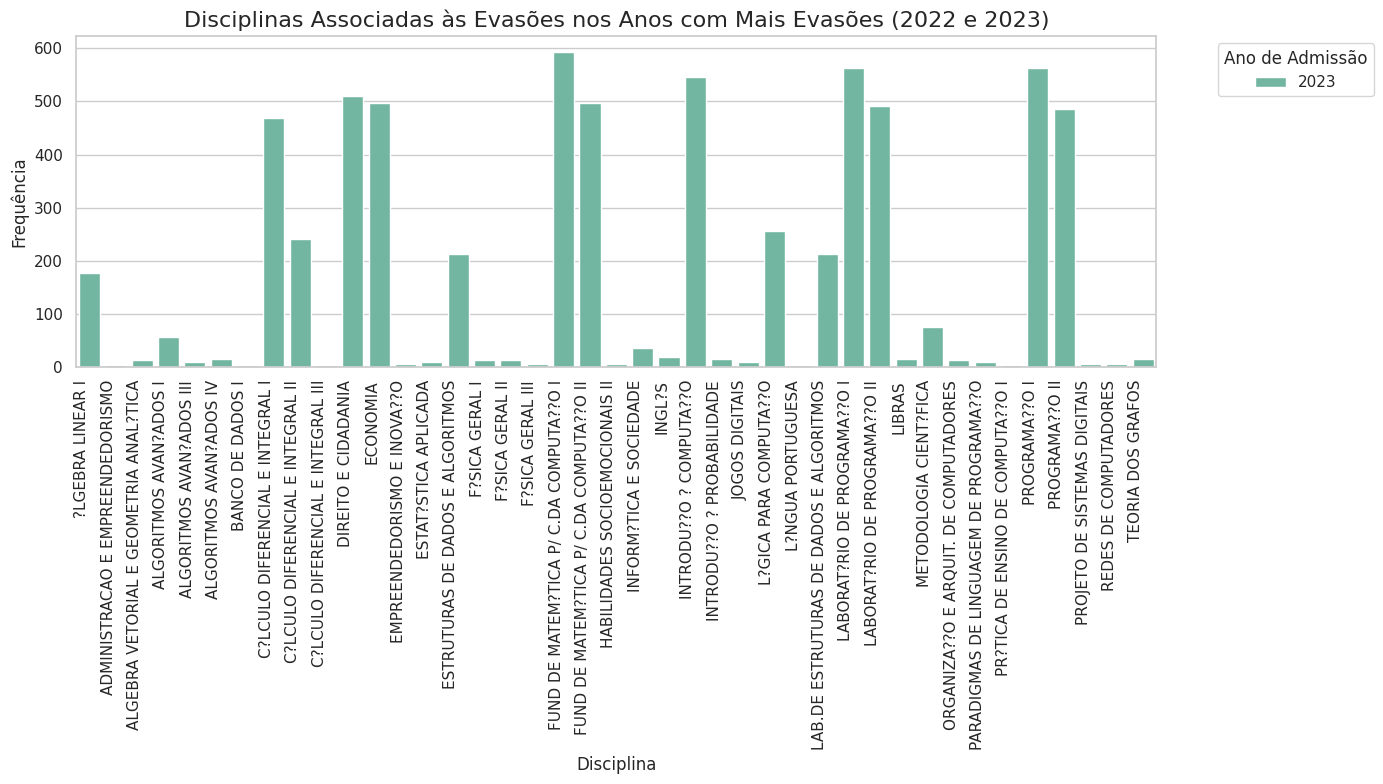

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas os anos 2022 e 2023 na análise
anos_desejados = [2022, 2023]
analise_disciplinas_filtrada = analise_disciplinas[analise_disciplinas["ANO_ADMISSAO"].isin(anos_desejados)]

# Verificar se há dados para os anos desejados
if not analise_disciplinas_filtrada.empty:
    # Criar o gráfico de barras agrupado
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=analise_disciplinas_filtrada,
        x="DISCIPLINA",
        y="Alunos Matriculados",
        hue="ANO_ADMISSAO",
        palette="Set2"
    )

    # Adicionar títulos e rótulos
    plt.title("Disciplinas Associadas às Evasões nos Anos com Mais Evasões (2022 e 2023)", fontsize=16)
    plt.xlabel("Disciplina", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.xticks(rotation=90, ha="right")
    plt.legend(title="Ano de Admissão", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()
else:
    print("Nenhuma disciplina encontrada para os anos 2022 e 2023.")


### Interpretação do Gráfico: Disciplinas Associadas às Evasões nos Anos 2022 e 2023

- **Disciplinas com Maior Frequência**: As disciplinas **LABORATÓRIO DE PROGRAMAÇÃO I** e **PROGRAMAÇÃO I** lideram em número de evasões no ano de 2023, indicando que disciplinas introdutórias relacionadas à programação apresentam desafios significativos para os alunos. Além disso, **CÁLCULO DIFERENCIAL E INTEGRAL I e II** também se destacam, reforçando a dificuldade enfrentada em disciplinas matemáticas.

- **Diversidade de Disciplinas**: Disciplinas como **ECONOMIA** e **DIREITO E CIDADANIA** mostram que as evasões não estão limitadas a áreas técnicas, mas também se estendem a disciplinas transversais.

- **Perfil das Disciplinas**: A concentração de evasões nas disciplinas introdutórias e de base, geralmente ofertadas nos primeiros períodos, sugere desafios enfrentados pelos alunos na fase inicial do curso.

- **Ano de Referência**: O gráfico confirma que os dados se referem apenas ao ano de 2023, como esperado, eliminando possíveis interferências de anos anteriores.

- **Implicações**: Os padrões observados destacam a necessidade de medidas como suporte acadêmico, monitorias e revisões pedagógicas para reduzir as evasões, especialmente nas disciplinas de base e introdutórias.


/tmp/ipykernel_962581/948295434.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alunos_df["ANO_ADMISSAO"].fillna(0, inplace=True)
/tmp/ipykernel_962581/948295434.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

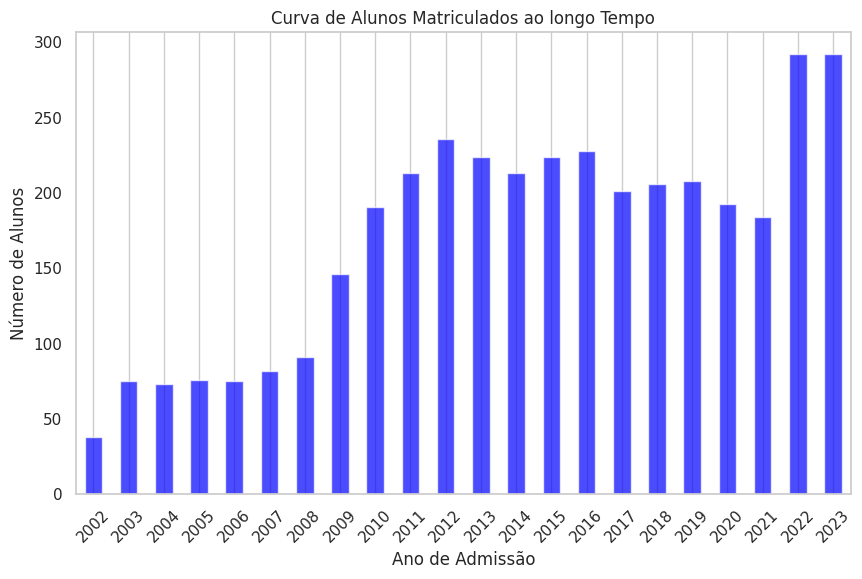


Amostra dos dados com colunas derivadas:
   MATRICULA TERMO_ADMISSAO TERMO_ESTADO  ANO_ADMISSAO  ANO_TERMO  \
0  102210001         2002.2       2002.2          2002       2002   
1  102210002         2002.2       2009.1          2002       2009   
2  102210003         2002.2       2005.1          2002       2005   
3  102210004         2002.2       2004.1          2002       2004   
4  102210005         2002.2       2007.1          2002       2007   
5  102210006         2002.2       2006.2          2002       2006   
6  102210007         2002.2       2008.1          2002       2008   
7  102210008         2002.2       2006.1          2002       2006   
8  102210009         2002.2       2007.2          2002       2007   
9  102210010         2002.2       2006.2          2002       2006   

   DURACAO_CURSO  
0              0  
1              7  
2              3  
3              2  
4              5  
5              4  
6              6  
7              4  
8              5  
9       

In [66]:

# Caminho para a tabela alunos_tratada.csv
caminho_alunos = os.path.expanduser('/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv')

# Carregar a tabela
alunos_df = pd.read_csv(caminho_alunos)

# Verificar se as colunas TERMO_ADMISSAO e TERMO_ESTADO estão presentes
if "TERMO_ADMISSAO" in alunos_df.columns and "TERMO_ESTADO" in alunos_df.columns:
    # Converter as colunas para string
    alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)
    alunos_df["TERMO_ESTADO"] = alunos_df["TERMO_ESTADO"].astype(str)

    # Extrair o ano de admissão e término
    alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
        alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
    )
    alunos_df["ANO_TERMO"] = pd.to_numeric(
        alunos_df["TERMO_ESTADO"].str.split('.').str[0], errors='coerce'
    )

    # Substituir valores ausentes por 0 (ou outro valor padrão)
    alunos_df["ANO_ADMISSAO"].fillna(0, inplace=True)
    alunos_df["ANO_TERMO"].fillna(0, inplace=True)

    # Garantir que os valores são inteiros
    alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)
    alunos_df["ANO_TERMO"] = alunos_df["ANO_TERMO"].astype(int)

    # Calcular a duração do curso
    alunos_df["DURACAO_CURSO"] = alunos_df["ANO_TERMO"] - alunos_df["ANO_ADMISSAO"]

    # Contar número de evasões por ano de admissão
    evasao_por_ano = alunos_df.groupby("ANO_ADMISSAO").size()

    # Gerar gráfico de evasões por ano
    plt.figure(figsize=(10, 6))
    evasao_por_ano.plot(kind='bar', color='blue', alpha=0.7)
    plt.title("Curva de Alunos Matriculados ao longo Tempo")
    plt.xlabel("Ano de Admissão")
    plt.ylabel("Número de Alunos")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Exibir uma amostra dos dados derivados
    print("\nAmostra dos dados com colunas derivadas:")
    print(alunos_df[["MATRICULA", "TERMO_ADMISSAO", "TERMO_ESTADO", "ANO_ADMISSAO", "ANO_TERMO", "DURACAO_CURSO"]].head(10))
else:
    print("Colunas TERMO_ADMISSAO ou TERMO_ESTADO não encontradas na tabela.")


## Observações sobre os Dados

- **Curta Duração** (Matrícula 102210004)  
  O aluno foi admitido em **2002** e seu estado mudou em **2004**, com uma duração de curso de **2 anos**. Isso pode indicar um caso de **evasão** ou **troca de curso**.

- **Longa Duração** (Matrícula 102210002)  
  Admitido em **2002** e mudou o estado apenas em **2009**, totalizando **7 anos** de curso. Isso pode ser um caso de **conclusão tardia** ou **retorno após afastamento**.

- **Sem Mudança de Estado** (Matrícula 102210001)  
  Admitido e mudou o estado no mesmo ano (**2002**), com duração de curso de **0 anos**. Provavelmente representa uma **desistência imediata** ou um **erro nos dados**.


## **Distribuição da Duração do Curso**

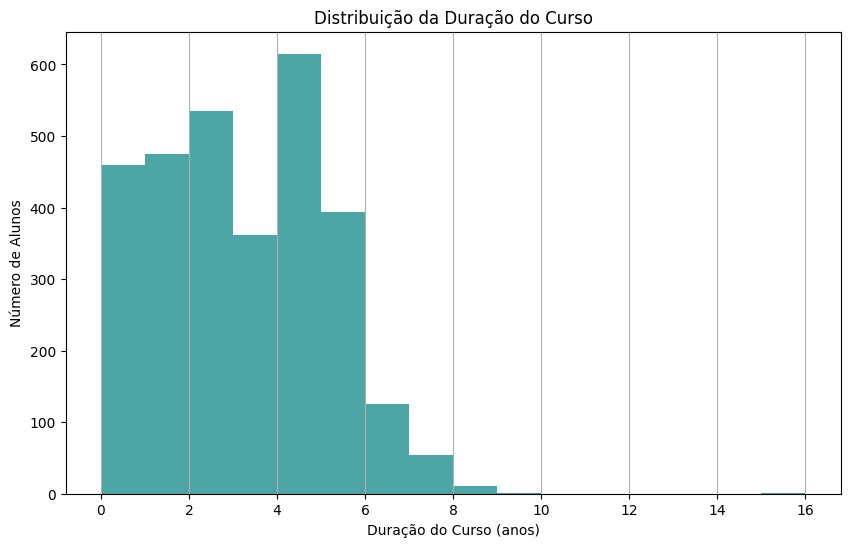

In [7]:
import matplotlib.pyplot as plt

# Gerar histograma de duração do curso
plt.figure(figsize=(10, 6))
alunos_df["DURACAO_CURSO"].hist(bins=range(0, alunos_df["DURACAO_CURSO"].max() + 1), alpha=0.7, color='teal')
plt.title("Distribuição da Duração do Curso")
plt.xlabel("Duração do Curso (anos)")
plt.ylabel("Número de Alunos")
plt.grid(axis='y')
plt.show()


## Resumo da Análise de Duração do Curso

O gráfico mostra que a maioria dos alunos conclui o curso em **4 anos**, o tempo regular esperado para uma graduação. No entanto, há uma frequência significativa de desistências ou evasões rápidas nos primeiros **0 a 1 ano**, sugerindo possíveis problemas de retenção de novos alunos.

Alunos com duração média de **5 a 8 anos** representam atrasos comuns, possivelmente devido a reprovações, suspensões ou trocas de curso. Casos de duração extrema, acima de **10 anos**, são raros e podem indicar situações específicas, como afastamentos prolongados ou retornos.

Em resumo, o gráfico destaca um padrão de conclusão regular, mas também levanta preocupações sobre evasão precoce e atrasos prolongados, ambos aspectos que merecem investigação detalhada.


## **duração do curso varia entre diferentes grupos GENERO**

/tmp/ipykernel_962581/1032890886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=alunos_df, x="GENERO", y="DURACAO_CURSO", palette="coolwarm")


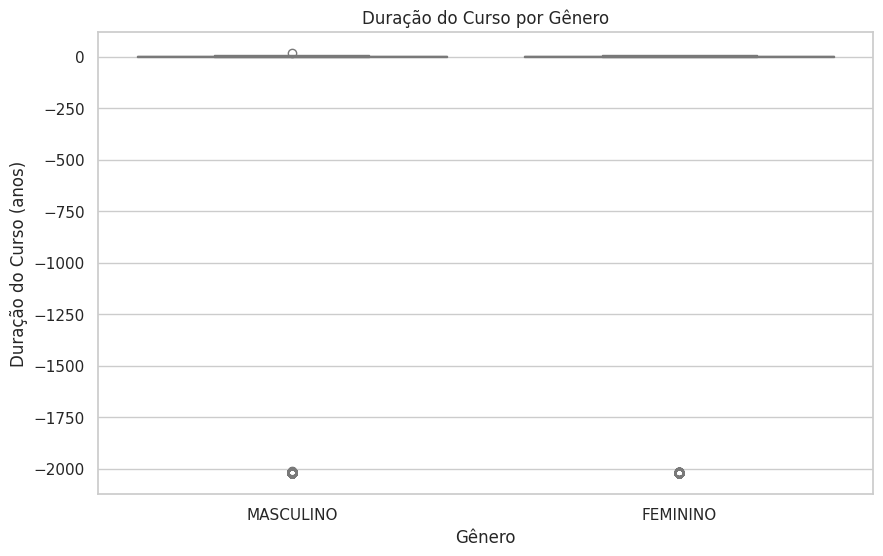

In [67]:
import seaborn as sns

# Boxplot para visualizar duração por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(data=alunos_df, x="GENERO", y="DURACAO_CURSO", palette="coolwarm")
plt.title("Duração do Curso por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Duração do Curso (anos)")
plt.show()


## Exibir Amostras das Colunas

In [68]:

# Caminho para a tabela alunos_tratada.csv
caminho_alunos = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'

# Carregar a tabela
alunos_df = pd.read_csv(caminho_alunos)

# Exibir uma amostra das colunas relacionadas
print(alunos_df[["MATRICULA", "TERMO_ADMISSAO", "TERMO_ESTADO", "RAZAO_INATIVIDADE"]].head(10))


   MATRICULA  TERMO_ADMISSAO  TERMO_ESTADO RAZAO_INATIVIDADE
0  102210001          2002.2        2002.2      CANCELAMENTO
1  102210002          2002.2        2009.1      DESCONHECIDO
2  102210003          2002.2        2005.1        REINGRESSO
3  102210004          2002.2        2004.1      DESCONHECIDO
4  102210005          2002.2        2007.1      DESCONHECIDO
5  102210006          2002.2        2006.2      DESCONHECIDO
6  102210007          2002.2        2008.1      DESCONHECIDO
7  102210008          2002.2        2006.1      DESCONHECIDO
8  102210009          2002.2        2007.2      DESCONHECIDO
9  102210010          2002.2        2006.2      DESCONHECIDO


## Contar Frequências de RAZAO_INATIVIDADE

In [69]:
# Contar ocorrências de cada motivo de inatividade
motivos_frequencia = alunos_df["RAZAO_INATIVIDADE"].value_counts()

# Exibir os motivos mais frequentes
print("Motivos de Inatividade Mais Frequentes:")
print(motivos_frequencia)


Motivos de Inatividade Mais Frequentes:
RAZAO_INATIVIDADE
DESCONHECIDO                   1799
ABANDONO                        655
EXPULSAO                        638
REINGRESSO                      290
DESISTENCIA                     228
CONCLUIU_MAS_NAO_COLOU_GRAU      79
TRANSFERENCIA                    62
CANCELAMENTO                      8
OUTROS                            2
Name: count, dtype: int64


## Gerar Gráfico de Barras

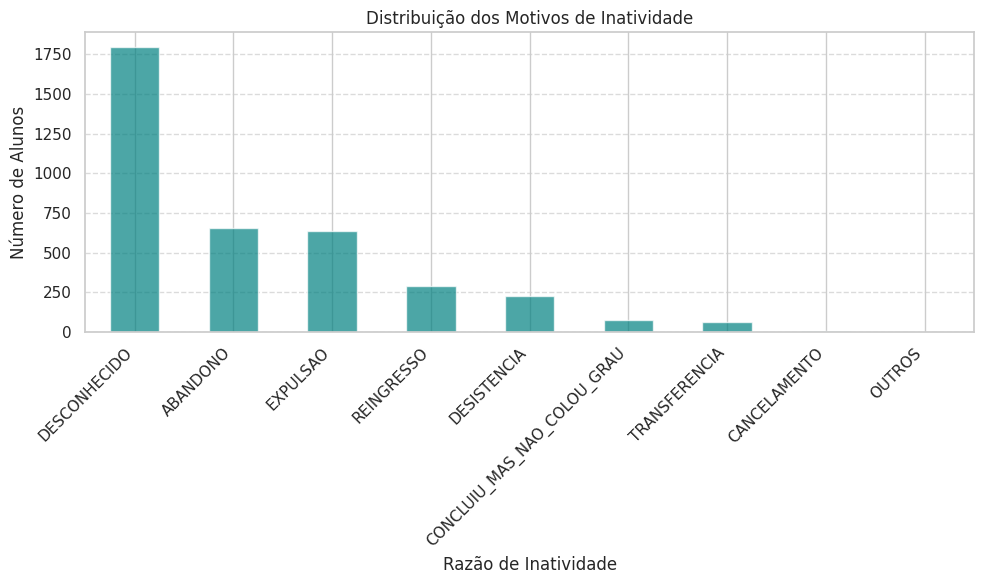

In [70]:
import matplotlib.pyplot as plt

# Gráfico de barras para motivos de inatividade
plt.figure(figsize=(10, 6))
motivos_frequencia.plot(kind="bar", color="teal", alpha=0.7)
plt.title("Distribuição dos Motivos de Inatividade")
plt.xlabel("Razão de Inatividade")
plt.ylabel("Número de Alunos")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


### Distribuição dos Motivos de Inatividade

- **DESCONHECIDO** (**1799 ocorrências**): Indica falhas nos registros ou na coleta de informações sobre os motivos de inatividade.  
- **ABANDONO** (**655 ocorrências**): Sugere desmotivação ou dificuldades externas.  
- **EXPULSÃO** (**638 ocorrências**): Reflete problemas institucionais, como desempenho acadêmico insuficiente.  
- **REINGRESSO** (**290 ocorrências**): Alunos que tentaram retomar os estudos após evasões temporárias.  
- **DESISTÊNCIA** (**228 ocorrências**): Decisões formais de abandono do curso.


### Motivos Menos Frequentes

- **CONCLUIU MAS NÃO COLOU GRAU** (**79 ocorrências**): Alunos que concluíram os requisitos acadêmicos, mas não formalizaram a graduação.  
- **TRANSFERÊNCIA** (**62 ocorrências**): Alunos que migraram para outras instituições ou cursos.  
- **CANCELAMENTO** (**8 ocorrências**): Provavelmente relacionado a decisões administrativas ou falta de regularização.  
- **OUTROS** (**2 ocorrências**): Casos raros ou menos categorizados.


### Conclusões e Implicações

- **Falhas nos Registros**: A alta frequência da categoria **"DESCONHECIDO"** evidencia problemas na documentação dos motivos de inatividade.  
- **Foco em Abandono e Expulsão**: Com mais de 1.000 ocorrências combinadas, essas categorias sugerem dificuldades acadêmicas, financeiras ou institucionais.  
- **Reingresso como Oportunidade**: A frequência significativa de reingressos indica que políticas de retenção e suporte podem ajudar a reduzir evasões definitivas.


### Gráfico Razão de Inatividade por Ano de Admissão

Tabelas carregadas com sucesso!

Razão de Inatividade por Ano de Admissão:
   ANO_ADMISSAO RAZAO_DE_INATIVIDADE_DE_ALUNO  Frequencia
0          2002                      ABANDONO          12
1          2002                  CANCELAMENTO           2
2          2002                  DESCONHECIDO          18
3          2002                      EXPULSAO           2
4          2002                    REINGRESSO           4
5          2003                      ABANDONO          16
6          2003                  CANCELAMENTO           1
7          2003                  DESCONHECIDO          45
8          2003                      EXPULSAO           4
9          2003                        OUTROS           2


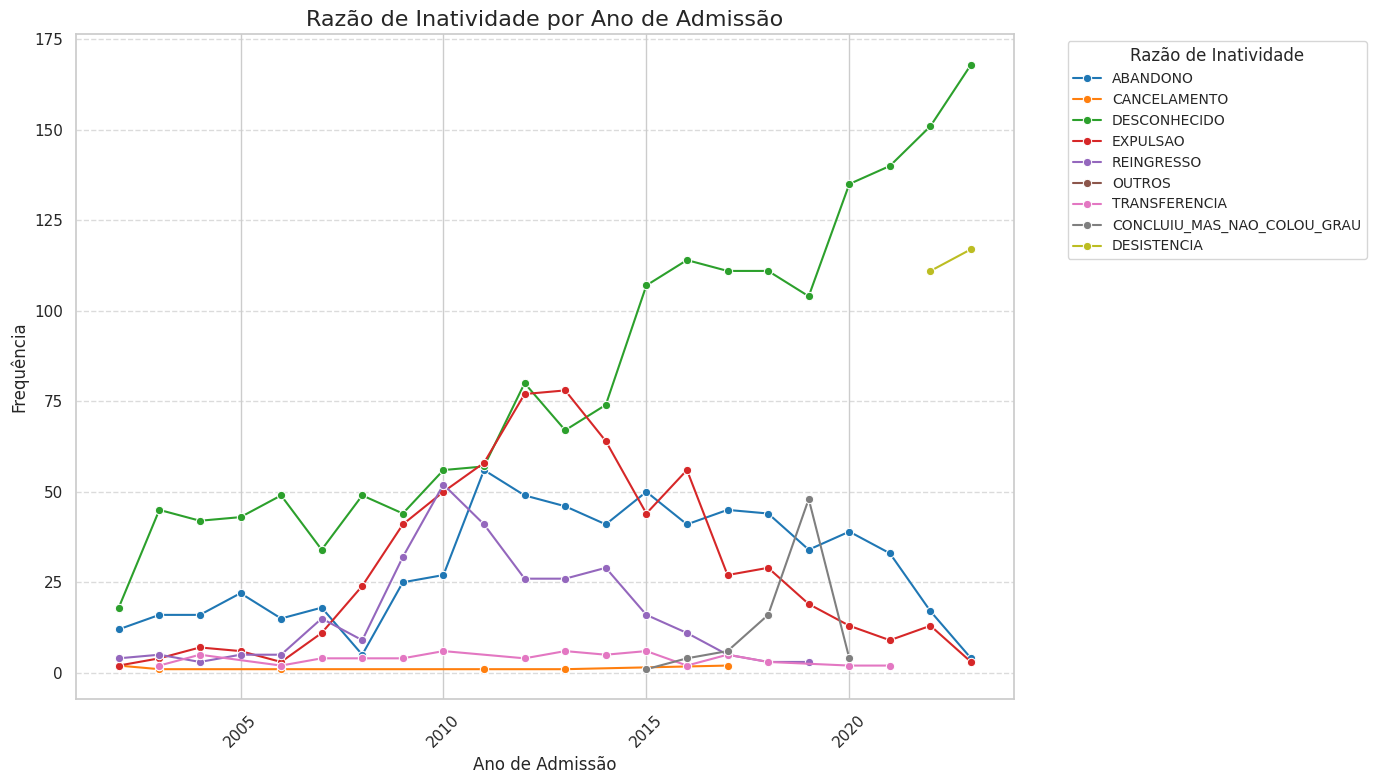

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo do gráfico
sns.set(style="whitegrid")

# Caminhos para os arquivos
caminho_alunos = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
caminho_motivo_evasao = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_motivo_evasao.csv'

# Tentar carregar os dados
try:
    alunos_df = pd.read_csv(caminho_alunos, sep=',')
    motivo_evasao_df = pd.read_csv(caminho_motivo_evasao, sep=',')

    print("Tabelas carregadas com sucesso!")

    # Garantir que as colunas necessárias estão disponíveis
    if "TERMO_ADMISSAO" in alunos_df.columns and "RAZAO_DE_INATIVIDADE_DE_ALUNO" in motivo_evasao_df.columns:
        # Tratar a coluna TERMO_ADMISSAO para extrair o ano
        alunos_df["TERMO_ADMISSAO"] = alunos_df["TERMO_ADMISSAO"].astype(str)  # Converter para string
        alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
            alunos_df["TERMO_ADMISSAO"].str.split('.').str[0], errors='coerce'
        )
        alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)

        # Relacionar alunos com motivos de evasão
        motivo_evasao_df.rename(columns={"MATRICULA": "MATRICULA_ALUNO"}, inplace=True)
        relacao_df = alunos_df.merge(motivo_evasao_df, left_on="MATRICULA", right_on="MATRICULA_ALUNO", how="inner")

        # Agrupar por ano de admissão e razão de inatividade
        relacao_ano_motivo = relacao_df.groupby(["ANO_ADMISSAO", "RAZAO_DE_INATIVIDADE_DE_ALUNO"]).size().reset_index(name="Frequencia")

        # Exibir os primeiros dados
        print("\nRazão de Inatividade por Ano de Admissão:")
        print(relacao_ano_motivo.head(10))

        # Gráfico de linhas
        plt.figure(figsize=(14, 8))
        sns.lineplot(
            data=relacao_ano_motivo,
            x="ANO_ADMISSAO",
            y="Frequencia",
            hue="RAZAO_DE_INATIVIDADE_DE_ALUNO",
            marker="o",
            palette="tab10"
        )

        # Adicionar título e rótulos
        plt.title("Razão de Inatividade por Ano de Admissão", fontsize=16)
        plt.xlabel("Ano de Admissão", fontsize=12)
        plt.ylabel("Frequência", fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Razão de Inatividade", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()

        # Exibir o gráfico
        plt.show()
    else:
        print("As colunas necessárias não estão presentes nas tabelas.")
except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


###  RAZAO_INATIVIDADE x GENERO


Tabelas carregadas com sucesso!
Relação entre Razão de Inatividade e Gênero:
  RAZAO_DE_INATIVIDADE_DE_ALUNO     GENERO  Frequencia
0                      ABANDONO   FEMININO         111
1                      ABANDONO  MASCULINO         544
2                  CANCELAMENTO   FEMININO           2
3                  CANCELAMENTO  MASCULINO           6
4   CONCLUIU_MAS_NAO_COLOU_GRAU   FEMININO          15


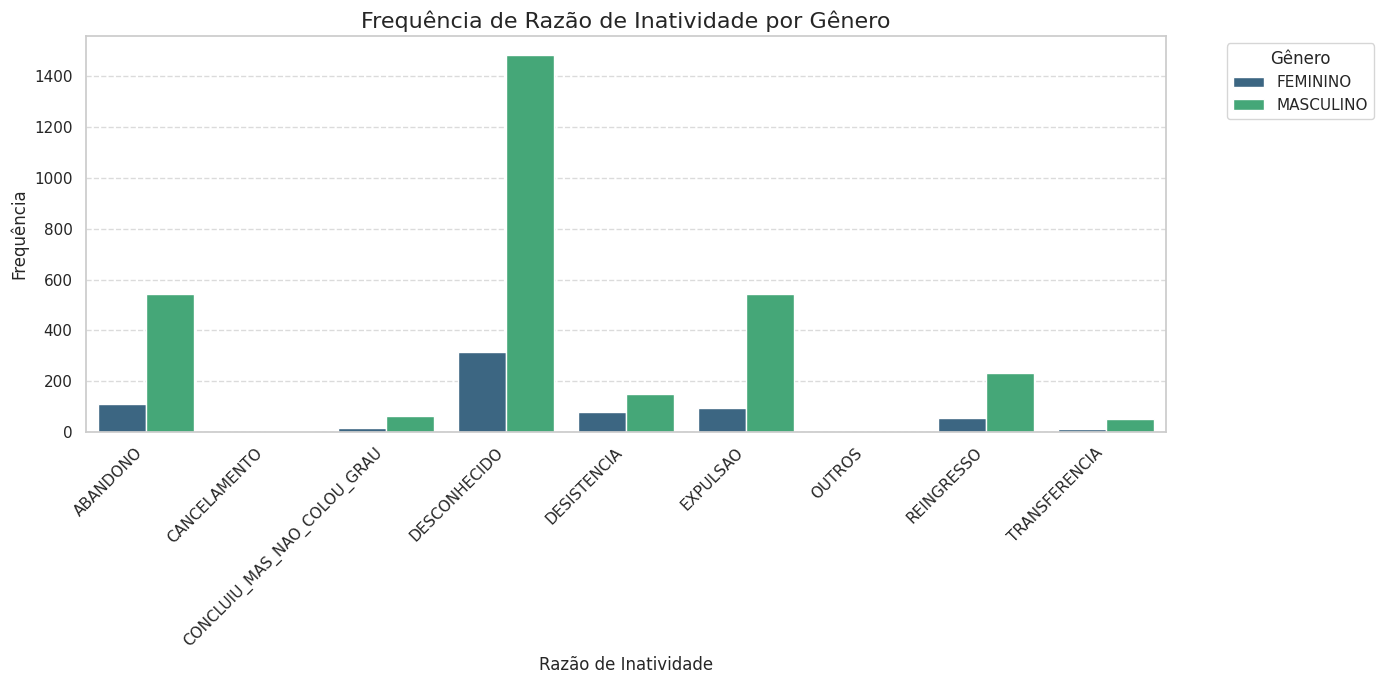

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Caminhos para os arquivos
caminho_alunos = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
caminho_motivo_evasao = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_motivo_evasao.csv'

# Tentar carregar os dados
try:
    alunos_df = pd.read_csv(caminho_alunos, sep=',')
    motivo_evasao_df = pd.read_csv(caminho_motivo_evasao, sep=',')

    print("Tabelas carregadas com sucesso!")

    # Verificar colunas necessárias
    if "GENERO" in alunos_df.columns and "RAZAO_DE_INATIVIDADE_DE_ALUNO" in motivo_evasao_df.columns:
        # Relacionar alunos com motivos de evasão
        motivo_evasao_df.rename(columns={"MATRICULA": "MATRICULA_ALUNO"}, inplace=True)
        relacao_df = alunos_df.merge(motivo_evasao_df, left_on="MATRICULA", right_on="MATRICULA_ALUNO", how="inner")

        # Agrupar por razão de inatividade e gênero para analisar frequências
        relacao_genero = relacao_df.groupby(["RAZAO_DE_INATIVIDADE_DE_ALUNO", "GENERO"]).size().reset_index(name="Frequencia")

        # Exibir os dados
        print("Relação entre Razão de Inatividade e Gênero:")
        print(relacao_genero.head())

        # Gráfico de barras para visualização
        plt.figure(figsize=(14, 7))
        sns.barplot(
            data=relacao_genero,
            x="RAZAO_DE_INATIVIDADE_DE_ALUNO",
            y="Frequencia",
            hue="GENERO",
            palette="viridis"
        )
        plt.title("Frequência de Razão de Inatividade por Gênero", fontsize=16)
        plt.xlabel("Razão de Inatividade", fontsize=12)
        plt.ylabel("Frequência", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.legend(title="Gênero", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()
    else:
        print("As colunas necessárias ('GENERO', 'RAZAO_DE_INATIVIDADE_DE_ALUNO') não foram encontradas nas tabelas.")
except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


### Explorar Insucesso

TIdisc = (nrep + nrpf) / nmat
## Taxa de Insucesso nas Disciplinas

A análise da taxa de insucesso nas disciplinas visa identificar matérias com maiores índices de reprovações, seja por nota ou falta. Essa métrica é fundamental para compreender os desafios enfrentados pelos alunos e propor ações de suporte direcionadas. A taxa é calculada com base na relação entre o número de reprovações e o total de matrículas em cada disciplina, permitindo insights detalhados sobre os fatores que impactam o desempenho acadêmico.


Carregando a tabela alunos.csv...

Total de Ingressos e Reingressos por Ano:
    ANO_ADMISSAO TIPO_ADMISSAO  Frequencia
0           2002    VESTIBULAR          38
1           2003    VESTIBULAR          71
2           2004    VESTIBULAR          73
3           2005    VESTIBULAR          75
4           2006    VESTIBULAR          72
5           2007    VESTIBULAR          82
6           2008    VESTIBULAR          79
7           2009    VESTIBULAR         131
8           2010    VESTIBULAR         189
9           2011    VESTIBULAR         212
10          2012    VESTIBULAR         226
11          2013    VESTIBULAR         218
12          2014    REINGRESSO           1
13          2014    VESTIBULAR         116
14          2018    VESTIBULAR           1
15          2020    VESTIBULAR           1
16          2022    VESTIBULAR           4
17          2023    VESTIBULAR           3


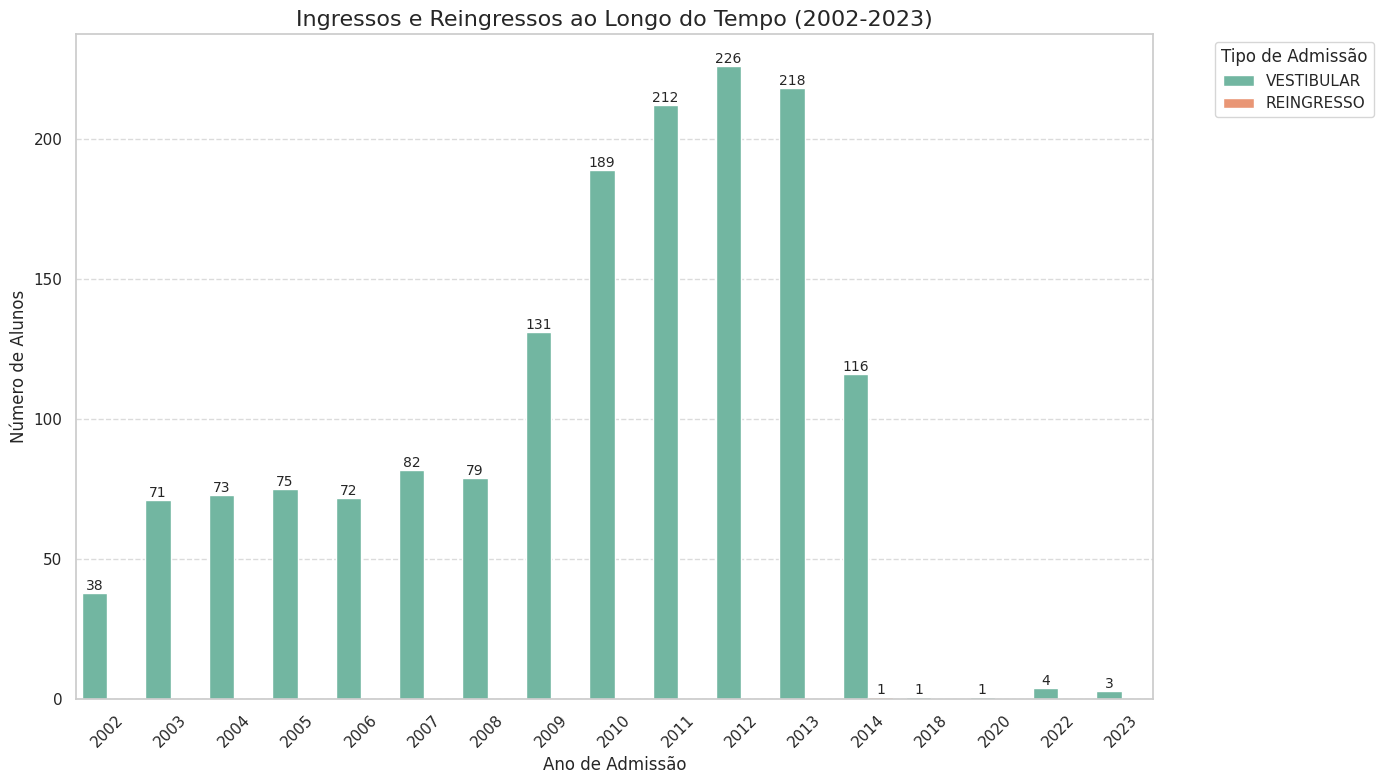

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

try:
    # Caminho para o arquivo alunos_tratada.csv no HD externo
    caminho_alunos_tratada = os.path.expanduser(
        '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
    )

    # Verificar e carregar a tabela
    if os.path.exists(caminho_alunos_tratada):
        print("Carregando a tabela alunos.csv...")
        alunos_df = pd.read_csv(caminho_alunos_tratada, low_memory=False)

        # Garantir que as colunas necessárias existam
        colunas_necessarias = ["TERMO_ADMISSAO", "TIPO_ADMISSAO"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Converter e extrair o ano de admissão
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].astype(str).str.split('.').str[0], errors="coerce"
            )

            # Filtrar dados válidos para análise
            alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)
            alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)

            # Filtrar tipos de admissão desejados
            tipo_admissao = alunos_df[alunos_df["TIPO_ADMISSAO"].isin(["VESTIBULAR", "REINGRESSO"])]

            # Contar ingressos e reingressos por ano
            admissoes_por_ano = tipo_admissao.groupby(["ANO_ADMISSAO", "TIPO_ADMISSAO"]).size().reset_index(name="Frequencia")

            # Visualizar os dados
            print("\nTotal de Ingressos e Reingressos por Ano:")
            print(admissoes_por_ano)

            # Criar o gráfico de barras empilhadas
            plt.figure(figsize=(14, 8))
            ax = sns.barplot(
                data=admissoes_por_ano,
                x="ANO_ADMISSAO",
                y="Frequencia",
                hue="TIPO_ADMISSAO",
                palette="Set2"
            )

            # Adicionar detalhes ao gráfico
            plt.title("Ingressos e Reingressos ao Longo do Tempo (2002-2023)", fontsize=16)
            plt.xlabel("Ano de Admissão", fontsize=12)
            plt.ylabel("Número de Alunos", fontsize=12)
            plt.xticks(rotation=45)
            plt.legend(title="Tipo de Admissão", bbox_to_anchor=(1.05, 1), loc="upper left")

            # Adicionar números acima das barras
            for container in ax.containers:
                ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

            plt.tight_layout()
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.show()
        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_alunos_tratada}")

except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


## Filtrar os dados para o motivo específico

Carregando a tabela alunos.csv...


/tmp/ipykernel_962581/2549612025.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


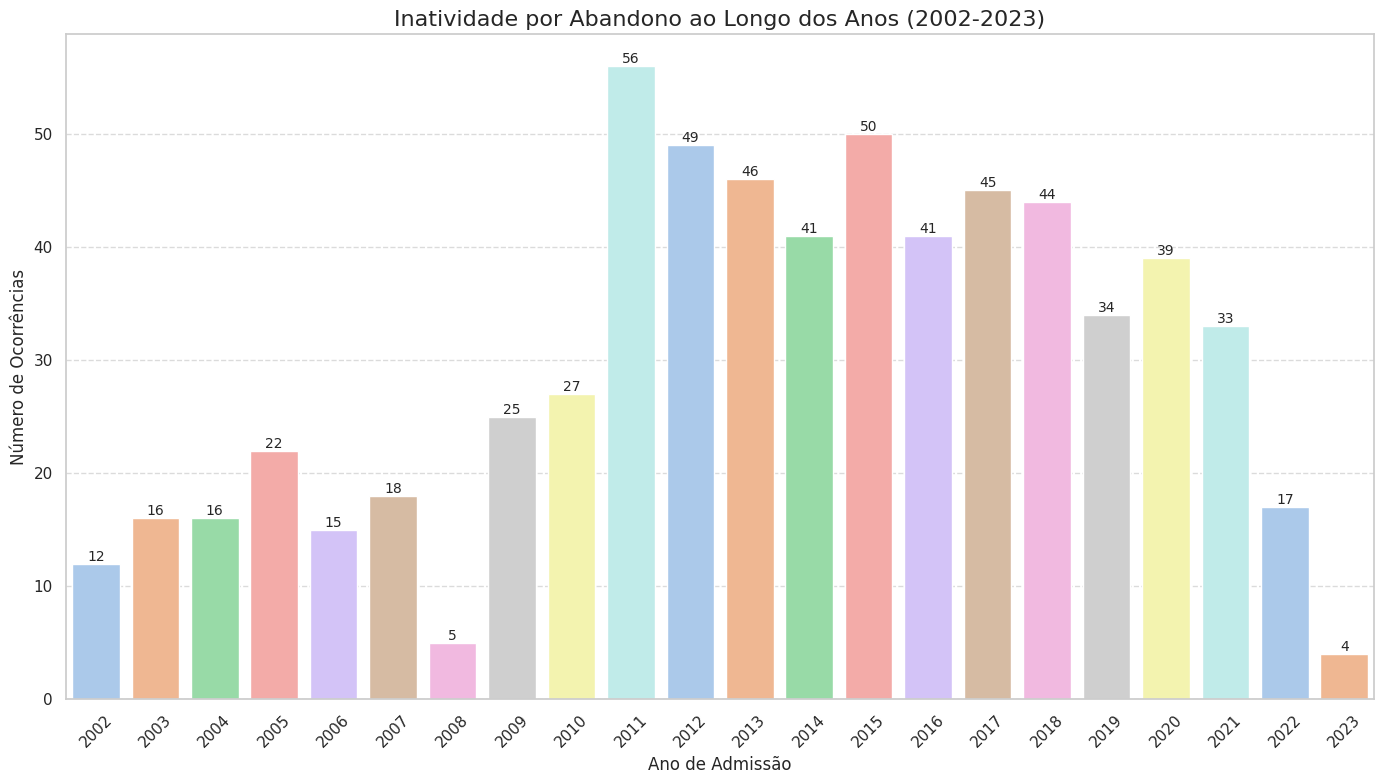

/tmp/ipykernel_962581/2549612025.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


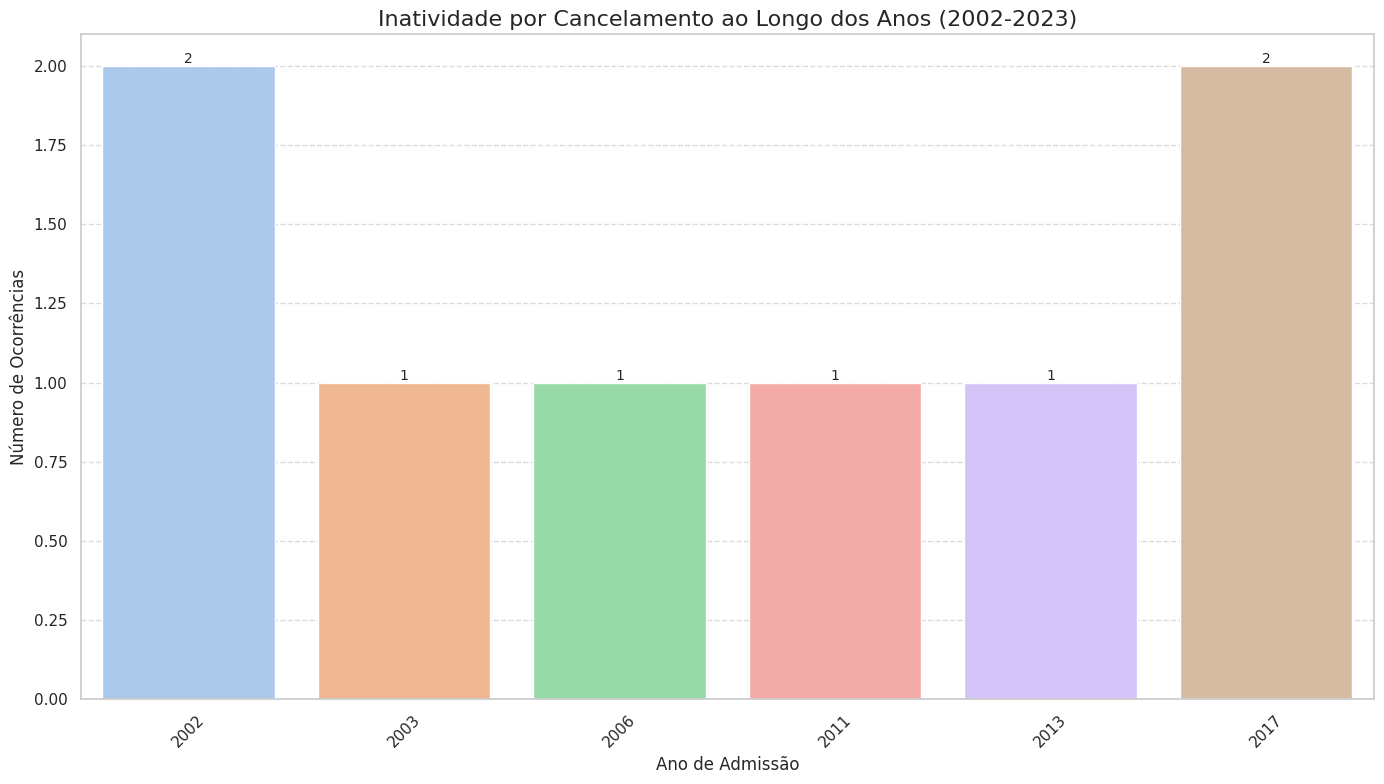

/tmp/ipykernel_962581/2549612025.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


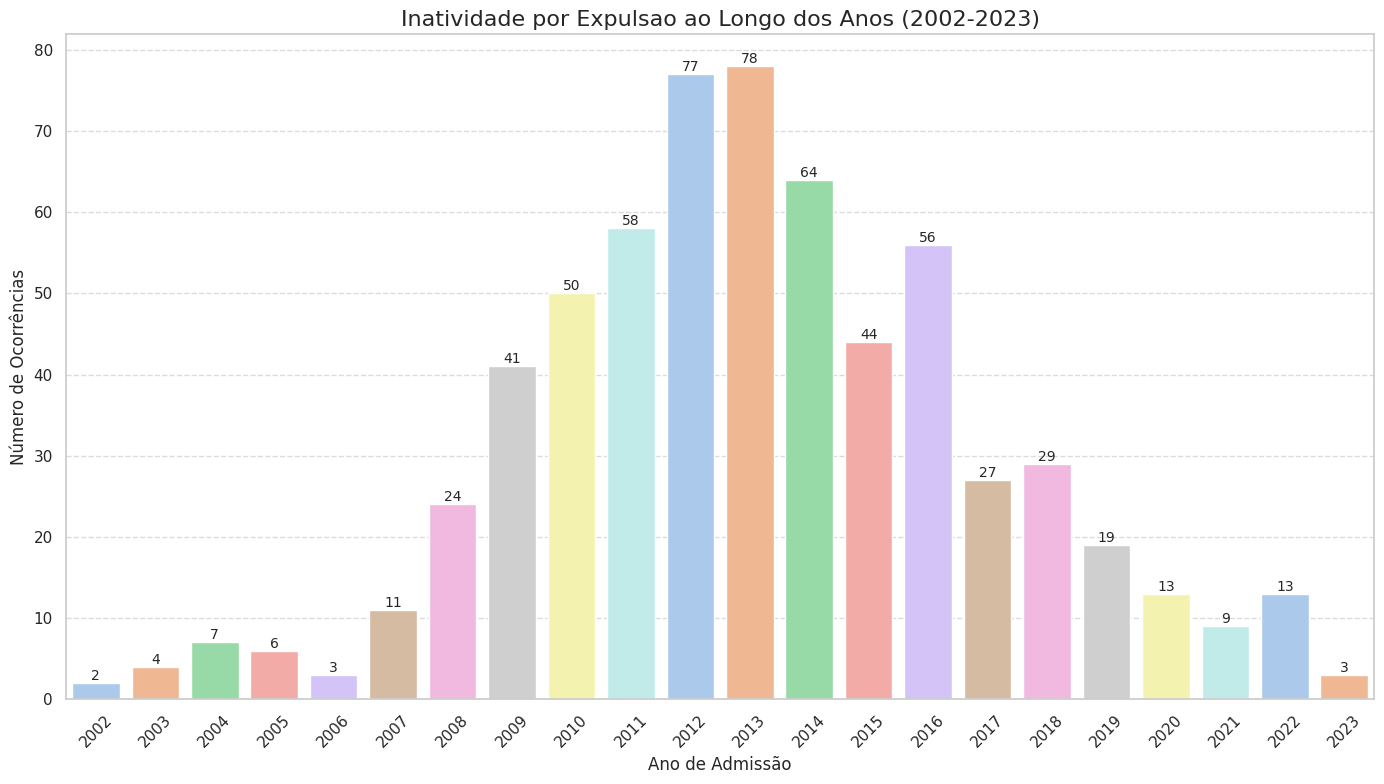

/tmp/ipykernel_962581/2549612025.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


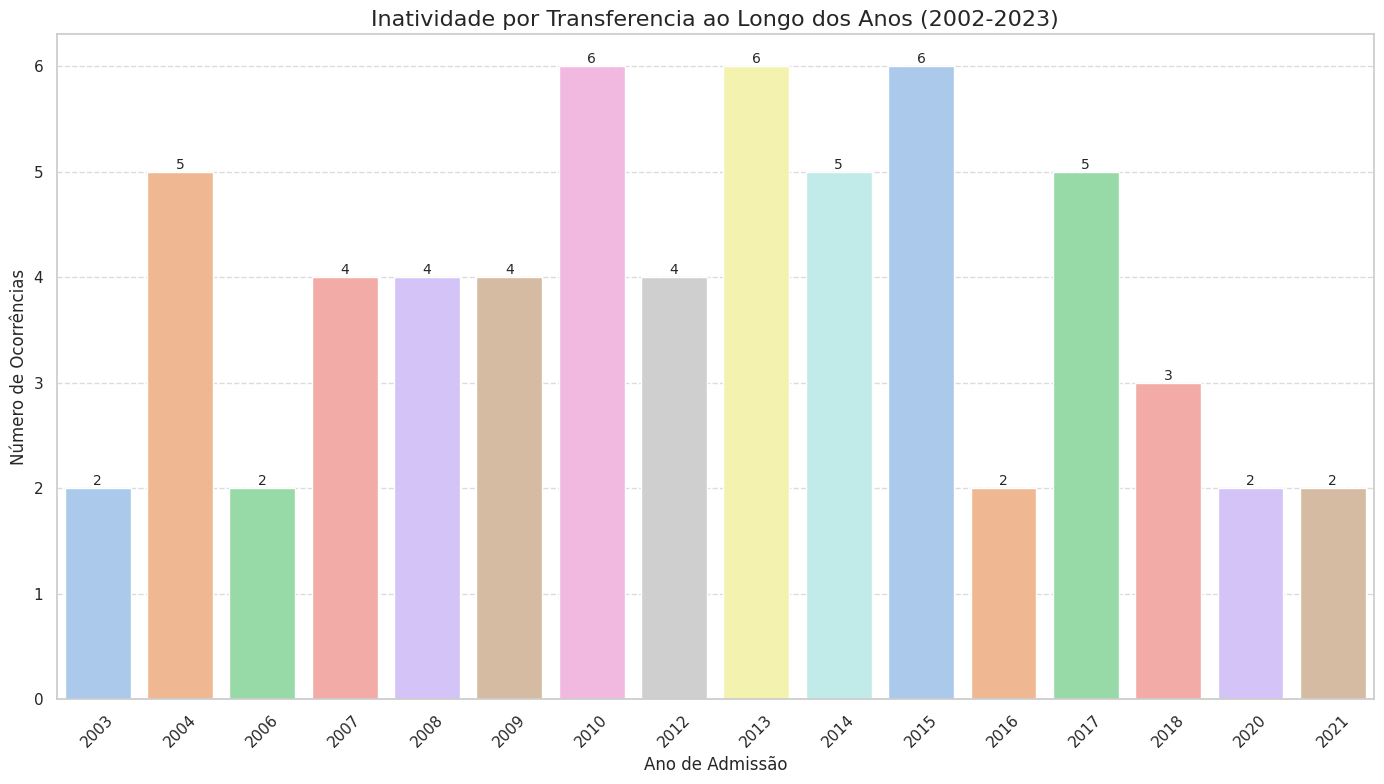

/tmp/ipykernel_962581/2549612025.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


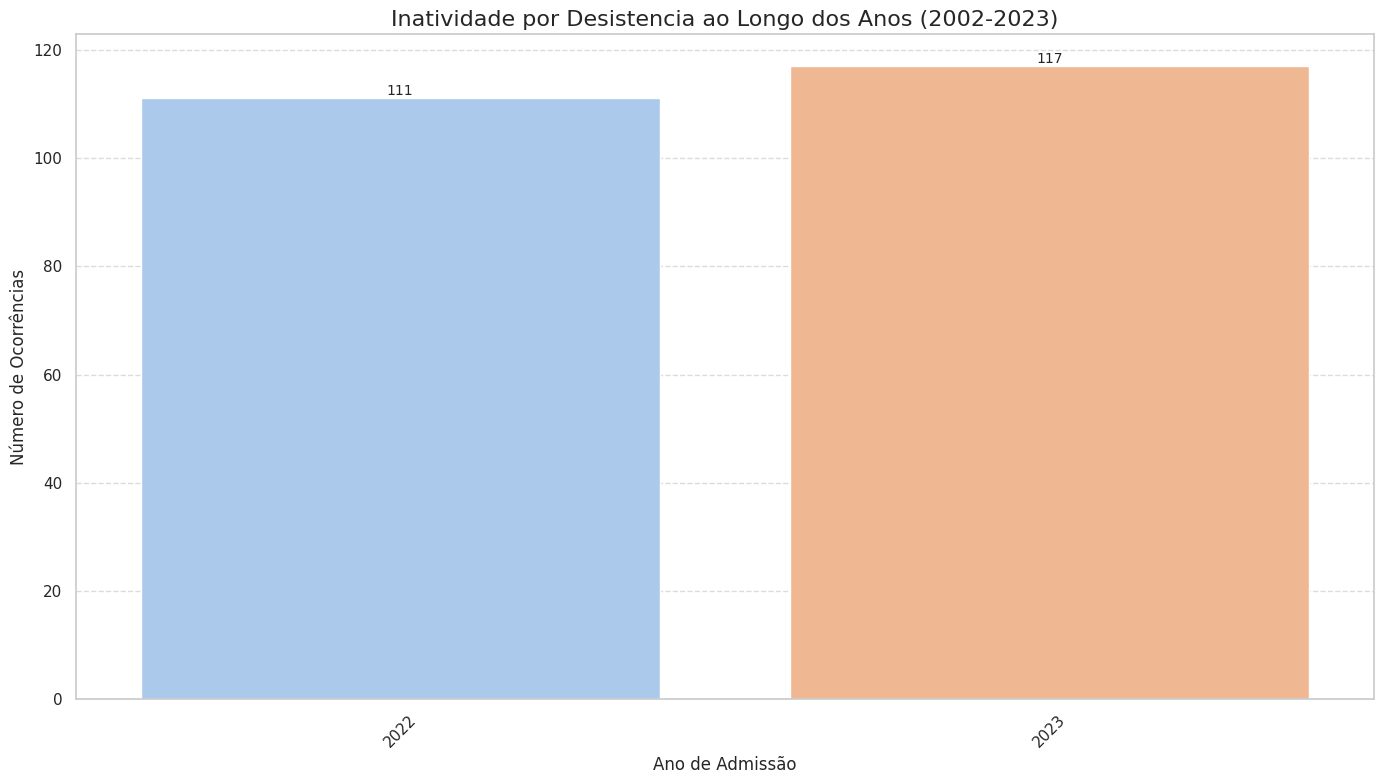

/tmp/ipykernel_962581/2549612025.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


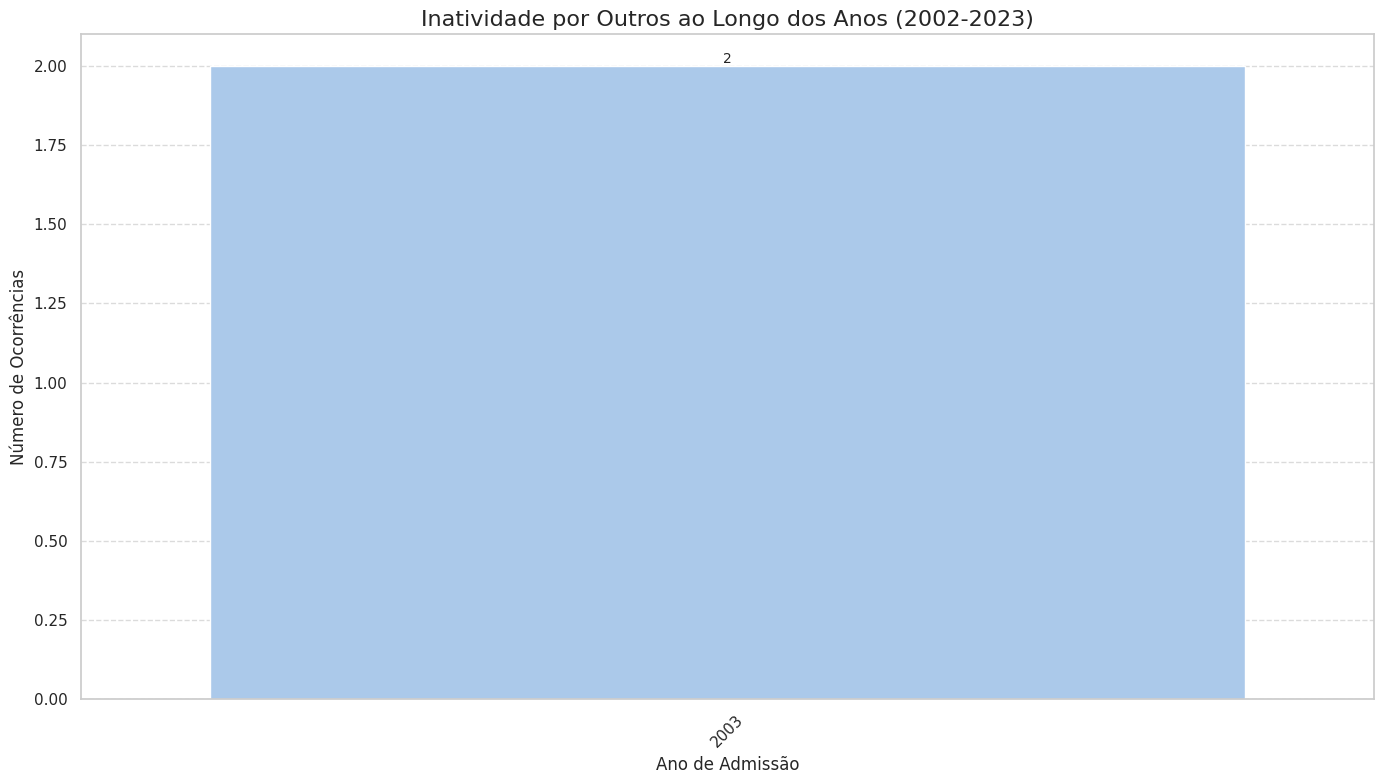

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configuração do estilo do gráfico
sns.set(style="whitegrid")

try:
    # Caminho para o arquivo alunos.csv no HD externo
    caminho_alunos_tratada = os.path.expanduser(
        '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
    )

    # Verificar e carregar a tabela
    if os.path.exists(caminho_alunos_tratada):
        print("Carregando a tabela alunos.csv...")
        alunos_df = pd.read_csv(caminho_alunos_tratada, low_memory=False, sep=',')

        # Garantir que as colunas necessárias existem
        colunas_necessarias = ["RAZAO_INATIVIDADE", "TERMO_ADMISSAO"]
        if all(coluna in alunos_df.columns for coluna in colunas_necessarias):
            # Extrair o ano de admissão
            alunos_df["ANO_ADMISSAO"] = pd.to_numeric(
                alunos_df["TERMO_ADMISSAO"].astype(str).str.split('.').str[0], errors="coerce"
            )

            # Filtrar dados válidos
            alunos_df.dropna(subset=["ANO_ADMISSAO"], inplace=True)
            alunos_df["ANO_ADMISSAO"] = alunos_df["ANO_ADMISSAO"].astype(int)

            # Selecionar os motivos relevantes
            motivos = ["ABANDONO", "CANCELAMENTO", "EXPULSAO", "TRANSFERENCIA", "DESISTENCIA", "OUTROS"]

            for motivo in motivos:
                # Filtrar os dados para o motivo específico
                filtro_motivo = alunos_df[alunos_df["RAZAO_INATIVIDADE"] == motivo]

                # Contar o número de casos por ano
                frequencia_por_ano = filtro_motivo.groupby("ANO_ADMISSAO").size().reset_index(name="Frequencia")

                # Verificar se há dados para o motivo
                if not frequencia_por_ano.empty:
                    # Criar o gráfico
                    plt.figure(figsize=(14, 8))
                    sns.barplot(
                        data=frequencia_por_ano,
                        x="ANO_ADMISSAO",
                        y="Frequencia",
                        palette="pastel"
                    )

                    # Adicionar títulos e rótulos
                    plt.title(f"Inatividade por {motivo.capitalize()} ao Longo dos Anos (2002-2023)", fontsize=16)
                    plt.xlabel("Ano de Admissão", fontsize=12)
                    plt.ylabel("Número de Ocorrências", fontsize=12)
                    plt.xticks(rotation=45)

                    # Adicionar números acima das barras
                    ax = plt.gca()
                    for container in ax.containers:
                        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

                    plt.tight_layout()
                    plt.grid(axis="y", linestyle="--", alpha=0.7)
                    plt.show()
                else:
                    print(f"Nenhum dado encontrado para o motivo: {motivo}")

        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas na tabela.")
    else:
        print(f"Arquivo não encontrado no caminho: {caminho_alunos_tratada}")

except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


## Calcular períodos únicos e horas cursadas por aluno

Tentando carregar as tabelas com tratamento de inconsistências...
Tabelas carregadas com sucesso!

Análise dos Alunos Evadidos:
   MATRICULA  PERIODOS_PASSADOS  TOTAL_HORAS
0  102210003                  5         1710
1  102210013                  7         2370
2  102210015                 12         4350
3  102210017                  6         2040
4  102210018                  9         3180
5  102210020                  1          360
6  102210025                 10         3810
7  102210026                  4         1590
8  102210027                 13         4380
9  102210028                  2          840


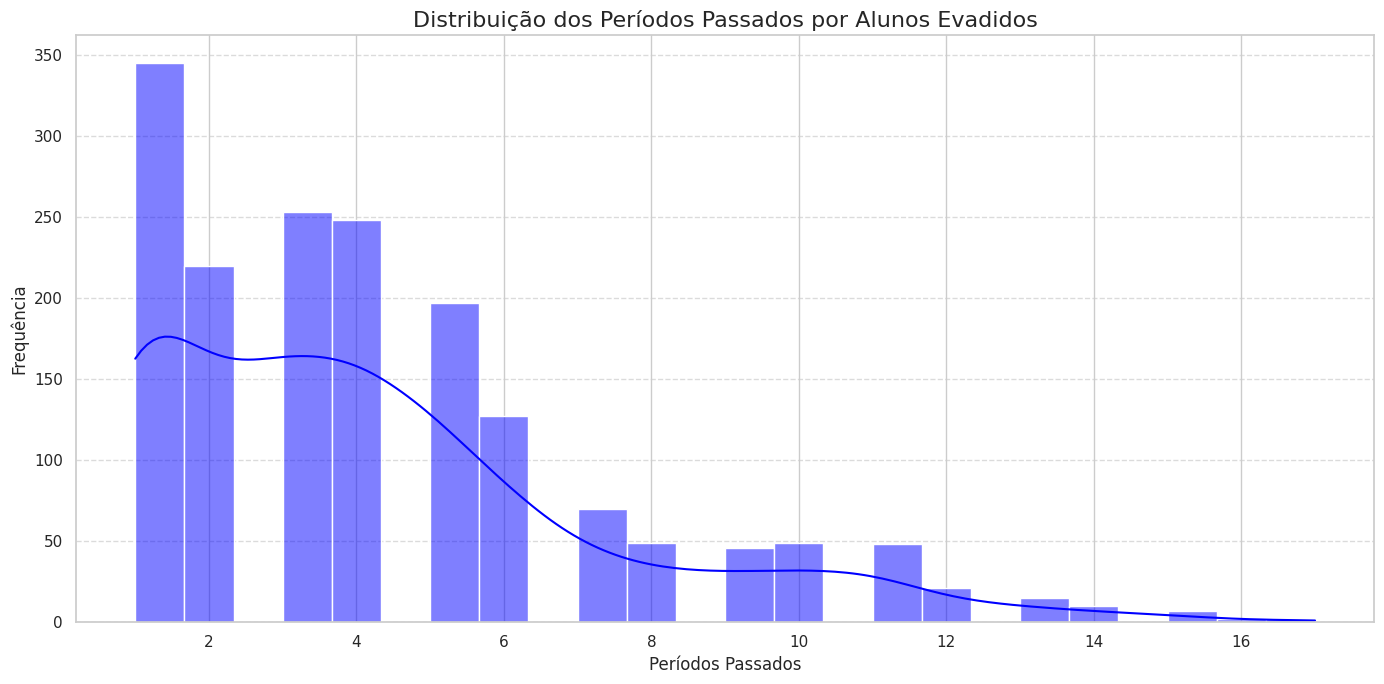

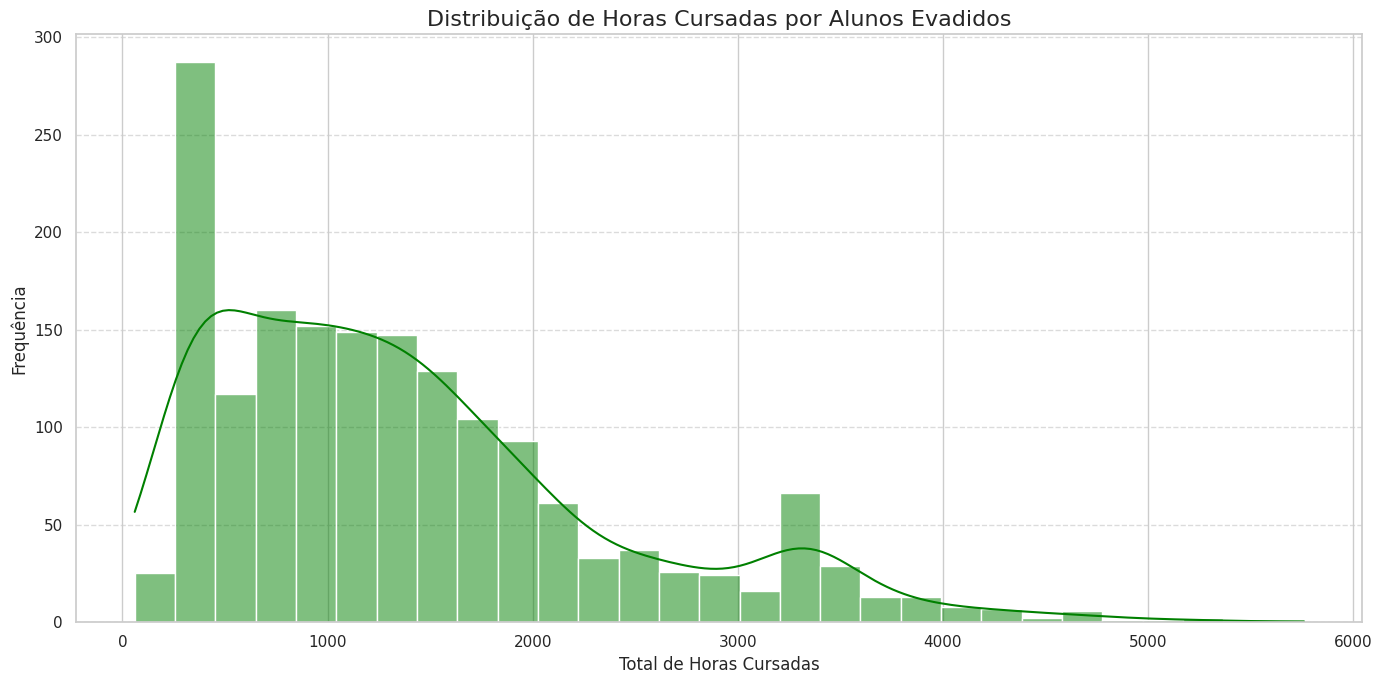


Estatísticas gerais:
          MATRICULA  PERIODOS_PASSADOS  TOTAL_HORAS
count  1.709000e+03        1709.000000  1709.000000
mean   1.134559e+08           4.303686  1395.579286
std    4.465337e+06           3.107876   977.310996
min    1.022100e+08           1.000000    60.000000
25%    1.102105e+08           2.000000   645.000000
50%    1.132102e+08           4.000000  1200.000000
75%    1.171102e+08           6.000000  1860.000000
max    1.232110e+08          17.000000  5760.000000


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Caminhos para os arquivos
    caminho_alunos = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
    caminho_historico = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_historico.csv'

    # Verificar se os arquivos existem
    print("Tentando carregar as tabelas com tratamento de inconsistências...")
    alunos_df = pd.read_csv(caminho_alunos, sep=',', engine='c')

    # Tratar o arquivo de histórico com possíveis inconsistências
    historico_df = pd.read_csv(
        caminho_historico,
        sep=',',
        on_bad_lines='skip',  # Ignorar linhas problemáticas
        engine='python'
    )

    print("Tabelas carregadas com sucesso!")

    # Filtrar alunos evadidos
    if "ESTADO" in alunos_df.columns and "MATRICULA" in historico_df.columns:
        alunos_evadidos = alunos_df[alunos_df["ESTADO"] == "INATIVO"]

        # Relacionar com o histórico
        historico_evadidos = historico_df.merge(
            alunos_evadidos[["MATRICULA"]], on="MATRICULA", how="inner"
        )

        # Calcular períodos únicos e horas cursadas por aluno
        analise_evadidos = historico_evadidos.groupby("MATRICULA").agg({
            "PERIODO": "nunique",  # Contar períodos únicos
            "HORAS": "sum"        # Somar horas cursadas
        }).reset_index()

        analise_evadidos.rename(columns={"PERIODO": "PERIODOS_PASSADOS", "HORAS": "TOTAL_HORAS"}, inplace=True)

        # Visualizar os dados
        print("\nAnálise dos Alunos Evadidos:")
        print(analise_evadidos.head(10))  # Mostrar os 10 primeiros registros

        # Gerar gráficos
        # Gráfico de distribuição de períodos passados
        plt.figure(figsize=(14, 7))
        sns.histplot(data=analise_evadidos, x="PERIODOS_PASSADOS", kde=True, color="blue")
        plt.title("Distribuição dos Períodos Passados por Alunos Evadidos", fontsize=16)
        plt.xlabel("Períodos Passados")
        plt.ylabel("Frequência")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Gráfico de distribuição de horas cursadas
        plt.figure(figsize=(14, 7))
        sns.histplot(data=analise_evadidos, x="TOTAL_HORAS", kde=True, color="green")
        plt.title("Distribuição de Horas Cursadas por Alunos Evadidos", fontsize=16)
        plt.xlabel("Total de Horas Cursadas")
        plt.ylabel("Frequência")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Estatísticas gerais
        print("\nEstatísticas gerais:")
        print(analise_evadidos.describe())

    else:
        print("Colunas 'ESTADO' ou 'MATRICULA' não encontradas nas tabelas.")
except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


### Interpretação do Gráfico: Distribuição dos Períodos Passados por Alunos Evadidos

- **Eixo X (Períodos Passados):**
  - Representa o número de períodos cursados pelos alunos antes de evadirem.
  - Os valores variam de **2 a 16 períodos**, indicando que os alunos evadidos frequentaram entre dois e dezesseis períodos antes de abandonarem o curso.

- **Eixo Y (Frequência):**
  - Mostra a quantidade de alunos que cursaram um determinado número de períodos antes de evadirem.
  - A frequência é maior para períodos iniciais (entre 2 e 4), com redução progressiva à medida que o número de períodos aumenta.

- **Curva Azul (Tendência):**
  - A linha curva sobreposta ao histograma representa uma estimativa de densidade (Kernel Density Estimation - KDE).
  - **Significado:**
    - A curva é uma suavização dos dados do histograma e ajuda a identificar padrões gerais na distribuição.
    - O pico inicial da curva reforça a concentração de evasões nos primeiros períodos (2 a 4).
    - A curva decai gradualmente, confirmando a tendência de redução de evasões em períodos mais avançados.

- **Observações:**
  - **Pico Inicial:** A maior concentração de evasões ocorre entre **2 a 4 períodos**, sugerindo que a maioria dos alunos abandona o curso nas fases iniciais.
  - **Declínio Gradual:** A frequência diminui gradualmente para períodos de 5 a 10, mostrando que menos alunos abandonam o curso em estágios avançados.
  - **Casos Extremos:** Poucos alunos cursaram mais de **10 períodos** antes de evadirem.

- **Conclusão:**
  - O gráfico evidencia que a evasão é mais predominante nos primeiros períodos do curso. Esse padrão pode indicar dificuldades de adaptação, problemas acadêmicos ou outras questões enfrentadas no início do percurso acadêmico.
  - A curva de densidade (KDE) facilita a identificação visual da tendência geral de evasão ao longo dos períodos.


### Interpretação do Gráfico: Distribuição de Horas Cursadas por Alunos Evadidos

- **Eixo X (Total de Horas Cursadas):**
  - Representa o total de horas acumuladas pelos alunos antes de evadirem do curso.
  - Os valores variam de **60 horas a 5000 horas**, com a maioria dos alunos acumulando menos de 2000 horas antes de abandonar o curso.

- **Eixo Y (Frequência):**
  - Indica a quantidade de alunos que cursaram uma determinada faixa de horas antes de evadirem.
  - A maior frequência está concentrada nos alunos que cursaram menos de **1000 horas**.

- **Curva Verde (Tendência):**
  - Representa a densidade estimada (Kernel Density Estimation - KDE), que ajuda a visualizar a tendência geral.
  - A curva mostra um pico inicial entre **500 e 1000 horas**, seguido de um declínio acentuado à medida que o total de horas aumenta.

- **Estatísticas Gerais:**
  - **Média de Horas Cursadas:** Cerca de **1395 horas**, indicando que, em média, os alunos evadidos cursaram pouco mais de **um ano e meio de carga horária total**.
  - **Desvio Padrão:** Alto desvio padrão (**977 horas**) sugere grande variação entre os alunos em relação ao número de horas cursadas.
  - **Máximo e Mínimo:** Alguns alunos evadiram com apenas **60 horas cursadas**, enquanto outros chegaram a completar mais de **5000 horas**.

- **Observações Importantes:**
  - **Concentração Inicial:** A maior parte dos alunos evadidos cursou até **1000 horas**, indicando que muitos abandonaram o curso nas fases iniciais.
  - **Casos de Longa Permanência:** Embora raros, alguns alunos acumulam muitas horas antes de evadirem, indicando persistência em tentativas de conclusão.

- **Conclusão:**
  - A maioria das evasões ocorre entre alunos que cursaram um número limitado de horas. Isso pode estar relacionado a dificuldades iniciais, falta de adaptação ou outros fatores. Por outro lado, alunos com mais horas cursadas podem ter enfrentado desafios específicos ou desistido próximos da conclusão.


Carregando tabela de histórico...


/tmp/ipykernel_426886/3554483875.py:13: DtypeWarning: Columns (2,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  historico_df = pd.read_csv(caminho_historico_tratada)



Top 10 Disciplinas com Maior Percentual de Reprovação:
                                 DISCIPLINA  TOTAL_ALUNOS  \
129      METODOLOGIA E T?CNICAS DE PESQUISA             1   
159                       QU?MICA ANAL?TICA             1   
102                INTRODU??O ? ARQUITETURA             1   
94                INT A ENGENHARIA AGRICOLA             1   
104        INTRODU??O ? ENGENHARIA EL?TRICA             1   
28         CALCULO DIFERENCIAL E INTEGRAL I          2489   
29        CALCULO DIFERENCIAL E INTEGRAL II          1656   
142             PROBABILIDADE E ESTAT?STICA          1154   
8    ALGEBRA VETORIAL E GEOMETRIA ANAL?TICA          2524   
55           EQUACOES DIFERENCIAIS LINEARES             2   

     TOTAL_REPROVADOS_POR_NOTA  TOTAL_REPROVADOS_POR_FALTA  TOTAL_REPROVACOES  \
129                          0                           3                  3   
159                          0                           3                  3   
102                          

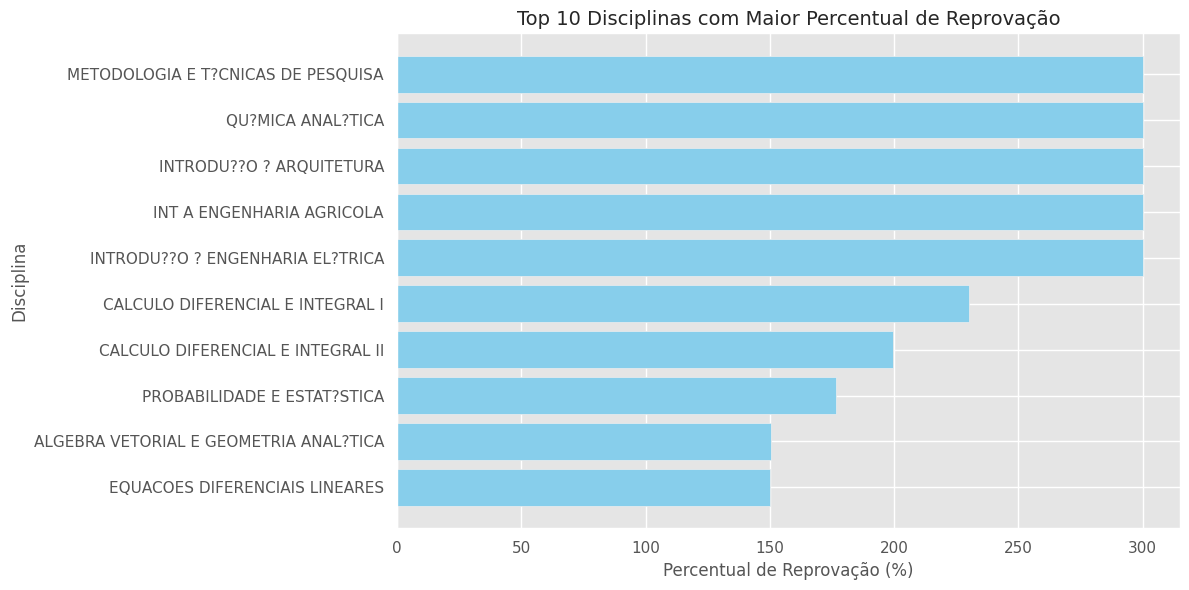

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Caminho para o arquivo de histórico tratado
caminho_alunos = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
caminho_historico = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_historico.csv'



# Verificar se o arquivo existe
if os.path.exists(caminho_historico_tratada):
    print("Carregando tabela de histórico...")
    historico_df = pd.read_csv(caminho_historico_tratada)

    # Filtrar dados necessários
    disciplinas_agrupadas = historico_df.groupby('DISCIPLINA').agg(
        TOTAL_ALUNOS=('MATRICULA', 'nunique'),  # Número total de alunos por disciplina
        TOTAL_REPROVADOS_POR_NOTA=('SITUACAO', lambda x: (x == "REPROVADO_POR_NOTA").sum()),
        TOTAL_REPROVADOS_POR_FALTA=('SITUACAO', lambda x: (x == "REPROVADO_POR_FALTA").sum())
    ).reset_index()

    # Calcular o total de reprovações e o percentual
    disciplinas_agrupadas['TOTAL_REPROVACOES'] = (
        disciplinas_agrupadas['TOTAL_REPROVADOS_POR_NOTA'] +
        disciplinas_agrupadas['TOTAL_REPROVADOS_POR_FALTA']
    )
    disciplinas_agrupadas['PERCENTUAL_REPROVACAO'] = (
        disciplinas_agrupadas['TOTAL_REPROVACOES'] / disciplinas_agrupadas['TOTAL_ALUNOS'] * 100
    )

    # Ordenar por percentual de reprovação
    disciplinas_ordenadas = disciplinas_agrupadas.sort_values(
        by='PERCENTUAL_REPROVACAO', ascending=False
    )

    # Exibir as 10 disciplinas com maior percentual de reprovação
    print("\nTop 10 Disciplinas com Maior Percentual de Reprovação:")
    print(disciplinas_ordenadas.head(10))

    # Gerar gráfico das 10 disciplinas com maior percentual de reprovação
    top_disciplinas = disciplinas_ordenadas.head(10)
    plt.figure(figsize=(12, 6))
    plt.barh(top_disciplinas['DISCIPLINA'], top_disciplinas['PERCENTUAL_REPROVACAO'], color='skyblue')
    plt.xlabel('Percentual de Reprovação (%)', fontsize=12)
    plt.ylabel('Disciplina', fontsize=12)
    plt.title('Top 10 Disciplinas com Maior Percentual de Reprovação', fontsize=14)
    plt.gca().invert_yaxis()  # Inverter o eixo Y
    plt.tight_layout()
    plt.show()

else:
    print("Arquivo de histórico não encontrado. Verifique o caminho fornecido.")


Carregando tabela de histórico...
Primeiras linhas da tabela de histórico:
   MATRICULA  CODE_MATRICULA                              DISCIPLINA  CREDITO  \
0  102210002         1109035  ALGEBRA VETORIAL E GEOMETRIA ANAL?TICA        4   
1  102210002         1109103        CALCULO DIFERENCIAL E INTEGRAL I        4   
2  102210002         1303021                                ECONOMIA        4   
3  102210002         1307151            LEITURA E PRODUCAO DE TEXTOS        4   
4  102210002         1411167                           PROGRAMA??O I        4   

   HORAS  PERIODO  ID_CLASS  NOTA            SITUACAO  ESTADO  
0     60   2002.2       5.0   8.0            APROVADO  NORMAL  
1     60   2002.2       2.0   3.3  REPROVADO_POR_NOTA  NORMAL  
2     60   2002.2       4.0   7.0            APROVADO  NORMAL  
3     60   2002.2       1.0   8.2            APROVADO  NORMAL  
4     60   2002.2       1.0   5.7            APROVADO  NORMAL  

Top 10 Disciplinas com Maior Percentual de Reprovação

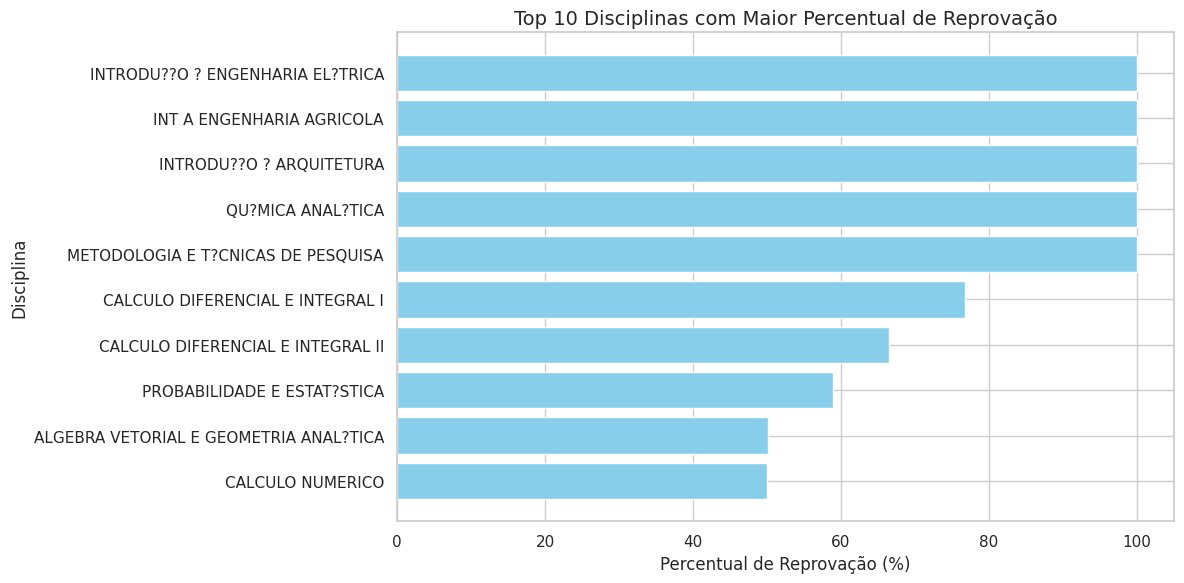

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Caminhos para os arquivos
caminho_alunos = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/alunos.csv'
caminho_historico = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_historico.csv'

# Verificar se o arquivo existe
if os.path.exists(caminho_historico):
    print("Carregando tabela de histórico...")
    try:
        # Ler o arquivo, tratando linhas problemáticas
        with open(caminho_historico, 'r', encoding='utf-8') as f:
            historico_df = pd.read_csv(f, sep=',', engine='python', on_bad_lines='skip')

        # Exibir as primeiras linhas do DataFrame para confirmar o carregamento
        print("Primeiras linhas da tabela de histórico:")
        print(historico_df.head())

        # Garantir que as colunas necessárias existem
        colunas_necessarias = ['DISCIPLINA', 'MATRICULA', 'SITUACAO']
        if all(col in historico_df.columns for col in colunas_necessarias):
            # Agrupar dados e calcular métricas
            disciplinas_agrupadas = historico_df.groupby('DISCIPLINA').agg(
                TOTAL_ALUNOS=('MATRICULA', 'nunique'),  # Número total de alunos por disciplina
                TOTAL_REPROVADOS_POR_NOTA=('SITUACAO', lambda x: (x == "REPROVADO_POR_NOTA").sum()),
                TOTAL_REPROVADOS_POR_FALTA=('SITUACAO', lambda x: (x == "REPROVADO_POR_FALTA").sum())
            ).reset_index()

            # Calcular o total de reprovações e o percentual
            disciplinas_agrupadas['TOTAL_REPROVACOES'] = (
                disciplinas_agrupadas['TOTAL_REPROVADOS_POR_NOTA'] +
                disciplinas_agrupadas['TOTAL_REPROVADOS_POR_FALTA']
            )
            disciplinas_agrupadas['PERCENTUAL_REPROVACAO'] = (
                disciplinas_agrupadas['TOTAL_REPROVACOES'] / disciplinas_agrupadas['TOTAL_ALUNOS'] * 100
            )

            # Ordenar por percentual de reprovação
            disciplinas_ordenadas = disciplinas_agrupadas.sort_values(
                by='PERCENTUAL_REPROVACAO', ascending=False
            )

            # Exibir as 10 disciplinas com maior percentual de reprovação
            print("\nTop 10 Disciplinas com Maior Percentual de Reprovação:")
            print(disciplinas_ordenadas.head(10))

            # Gerar gráfico das 10 disciplinas com maior percentual de reprovação
            top_disciplinas = disciplinas_ordenadas.head(10)
            plt.figure(figsize=(12, 6))
            plt.barh(top_disciplinas['DISCIPLINA'], top_disciplinas['PERCENTUAL_REPROVACAO'], color='skyblue')
            plt.xlabel('Percentual de Reprovação (%)', fontsize=12)
            plt.ylabel('Disciplina', fontsize=12)
            plt.title('Top 10 Disciplinas com Maior Percentual de Reprovação', fontsize=14)
            plt.gca().invert_yaxis()  # Inverter o eixo Y
            plt.tight_layout()
            plt.show()
        else:
            print(f"As colunas necessárias {colunas_necessarias} não foram encontradas no arquivo.")
    except Exception as e:
        print(f"Erro ao carregar ou processar os dados: {e}")
else:
    print("Arquivo de histórico não encontrado. Verifique o caminho fornecido.")


# Interpretação do Gráfico: Top 10 Disciplinas com Maior Percentual de Reprovação

O gráfico apresenta as **Top 10 disciplinas com maior percentual de reprovação**, mostrando a relação entre o número de reprovações (por nota ou falta) e o total de alunos matriculados em cada disciplina. As barras horizontais indicam o percentual de reprovação.

## Análise
### Disciplinas com 100% de Reprovação
- **INTRODUÇÃO À ENGENHARIA ELÉTRICA**
- **INTRODUÇÃO À ARQUITETURA**
- **QUÍMICA ANALÍTICA**
- Essas disciplinas tiveram 100% de reprovação, indicando que todos os alunos matriculados foram reprovados, seja por nota ou faltas.

### Disciplinas com Altos Índices de Reprovação (Acima de 50%)
- **CÁLCULO DIFERENCIAL E INTEGRAL I**
- **CÁLCULO DIFERENCIAL E INTEGRAL II**
- Essas disciplinas, geralmente desafiadoras em cursos técnicos ou de engenharia, apresentam altas taxas de reprovação.

### Disciplinas de Base com Percentuais Relevantes
- **PROBABILIDADE E ESTATÍSTICA**
- **ÁLGEBRA VETORIAL E GEOMETRIA ANALÍTICA**
- Disciplinas fundamentais que também possuem índices significativos de reprovação, indicando a necessidade de reforço nessas áreas.

## Tendências Gerais
- A maioria das disciplinas listadas pertence a áreas técnicas (engenharias, ciências exatas) e exige uma alta carga de cálculos ou compreensão de conceitos abstratos, o que pode dificultar o desempenho dos alunos.

## Conclusão
O gráfico evidencia a importância de ações como:
- **Monitorias e reforço acadêmico** para disciplinas com altos índices de reprovação.
- **Revisão de ementas e metodologias de ensino** para tornar as disciplinas mais acessíveis.
- **Programas de apoio pedagógico**, especialmente em áreas fundamentais como cálculo e estatística.

Essas estratégias podem reduzir os índices de reprovação e melhorar o desempenho acadêmico geral dos alunos.


## Situação dos Alunos por Disciplina (Top 20)

Carregando tabela de histórico...


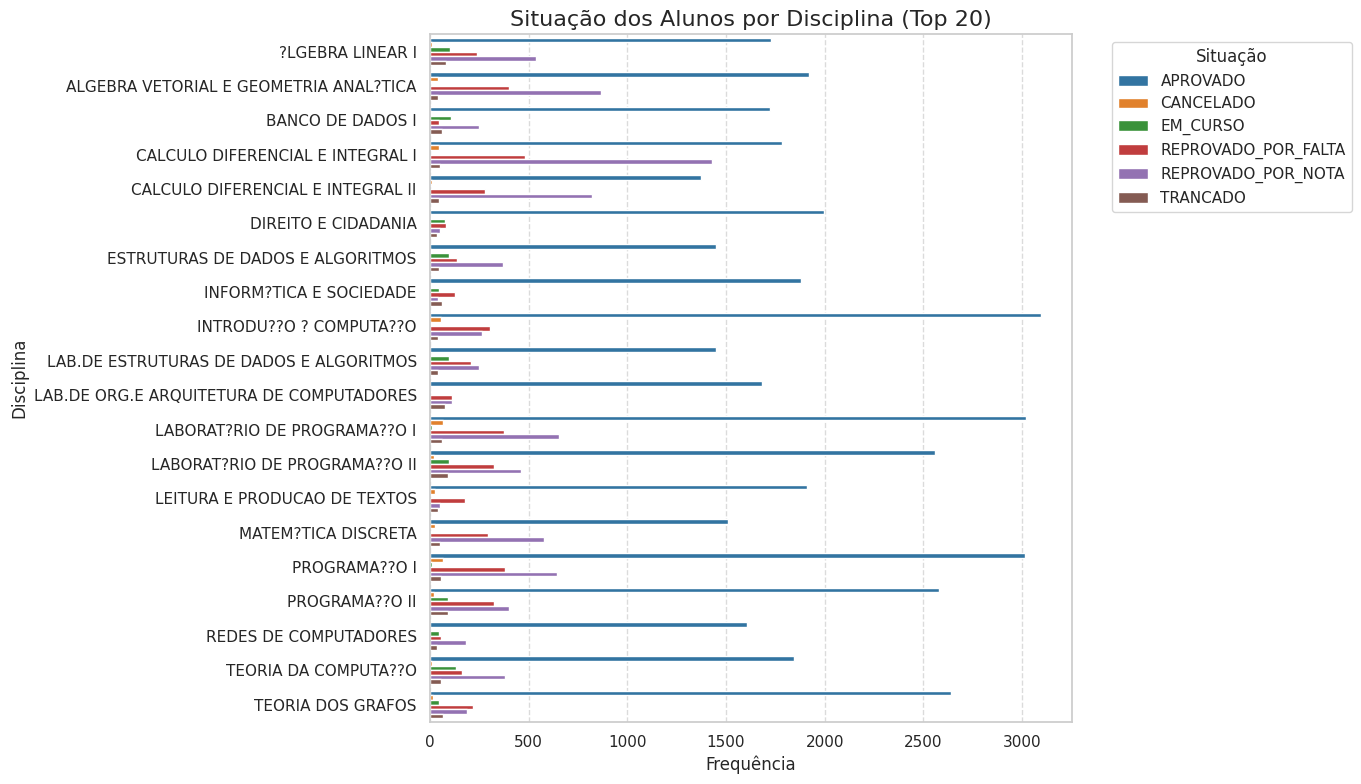

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Caminhos para os arquivos
caminho_historico = '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_historico.csv'

# Verificar se o arquivo existe
if os.path.exists(caminho_historico):
    print("Carregando tabela de histórico...")
    
    # Carregar a tabela de histórico, ignorando linhas mal formatadas
    historico_df = pd.read_csv(caminho_historico, sep=",", engine="python", on_bad_lines='skip')
    
    # Garantir que as colunas necessárias existem
    if all(col in historico_df.columns for col in ['DISCIPLINA', 'SITUACAO']):
        # Agrupar por disciplina e situação
        situacao_por_disciplina = historico_df.groupby(['DISCIPLINA', 'SITUACAO']).size().reset_index(name='Frequencia')

        # Selecionar as 20 disciplinas mais frequentes
        top_disciplinas = situacao_por_disciplina.groupby('DISCIPLINA')['Frequencia'].sum().nlargest(20).index
        situacao_top_disciplinas = situacao_por_disciplina[situacao_por_disciplina['DISCIPLINA'].isin(top_disciplinas)]

        # Configurar o gráfico
        plt.figure(figsize=(14, 8))
        sns.barplot(
            data=situacao_top_disciplinas,
            x='Frequencia',
            y='DISCIPLINA',
            hue='SITUACAO',
            palette="tab10"
        )

        # Adicionar títulos e rótulos
        plt.title("Situação dos Alunos por Disciplina (Top 20)", fontsize=16)
        plt.xlabel("Frequência dos Alunos", fontsize=12)
        plt.ylabel("Disciplina", fontsize=12)
        plt.legend(title="Situação", bbox_to_anchor=(1.05, 1), loc="upper left")

        # Ajustar layout
        plt.tight_layout()
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.show()
    else:
        print("As colunas necessárias ('DISCIPLINA', 'SITUACAO') não foram encontradas no arquivo.")
else:
    print("Arquivo de histórico não encontrado. Verifique o caminho fornecido.")


### Reduzir o número de disciplinas exibidas


### Situação dos Alunos por Disciplina (Top 20)

### Descrição
Este gráfico apresenta as 20 disciplinas que possuem os maiores percentuais de alunos em situações como **Reprovação por Nota**, **Reprovação por Falta**, **Trancamento** e **Cancelamento**.

### Observações
- A disciplina com maior percentual de reprovação destaca-se como um possível **gargalo acadêmico**.
- As situações de **Reprovação por Falta** (em azul) e **Reprovação por Nota** (em vermelho) são predominantes em várias disciplinas.
- O percentual de **Trancamento** (em verde) e **Cancelamento** (em laranja) é consideravelmente menor, mas ainda relevante para entender as dificuldades enfrentadas pelos alunos.

### Conclusão
Disciplinas com **altas taxas de reprovação** devem receber atenção prioritária. Possíveis estratégias incluem:
- **Revisão curricular**.
- **Apoio pedagógico adicional**, como tutorias ou reforço acadêmico.
- **Análise das causas de reprovação**, como dificuldades de ensino, metodologias, ou problemas externos dos alunos.

---

Carregando tabela de histórico com tratamento de inconsistências...
Tabela carregada com sucesso!
Colunas disponíveis: Index(['MATRICULA', 'CODE_MATRICULA', 'DISCIPLINA', 'CREDITO', 'HORAS',
       'PERIODO', 'ID_CLASS', 'NOTA', 'SITUACAO', 'ESTADO'],
      dtype='object')


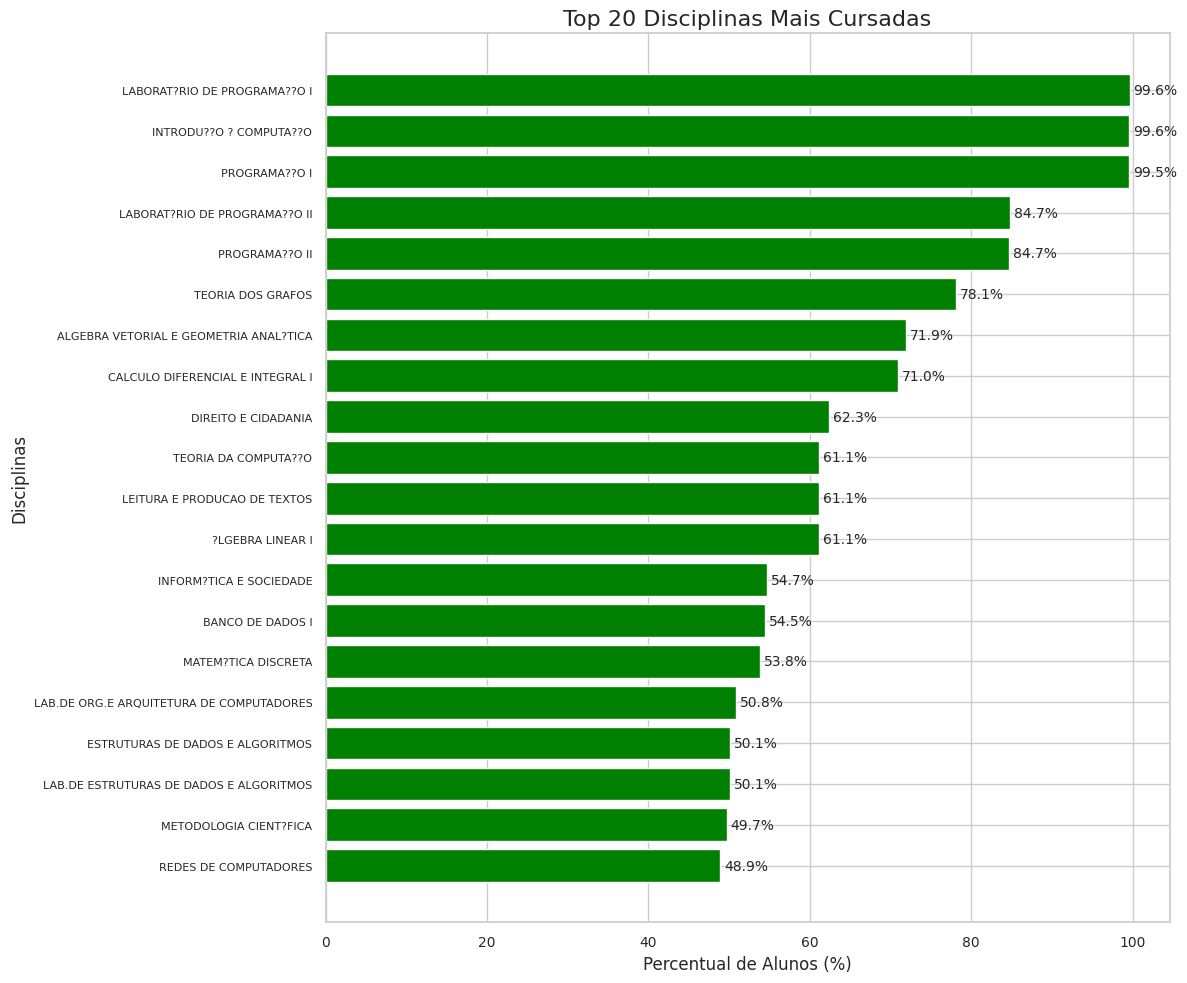

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Caminho para o arquivo correto
caminho_historico = os.path.expanduser(
    '/media/diego/PIETRO HD/Mestrado UFCG/Semestre 2024.2/LSD/Tabelas/tabela_historico.csv'
)

try:
    # Carregar a tabela tratada com tratamento para inconsistências
    print("Carregando tabela de histórico com tratamento de inconsistências...")
    historico_df = pd.read_csv(
        caminho_historico,
        sep=",",
        engine="python",
        on_bad_lines="skip"  # Ignorar linhas mal formatadas
    )
    print("Tabela carregada com sucesso!")

    # Verificar as colunas disponíveis no DataFrame
    print("Colunas disponíveis:", historico_df.columns)

    # Ajuste o nome da coluna para o correto, se necessário
    if 'DISCIPLINA' not in historico_df.columns or 'MATRICULA' not in historico_df.columns:
        print("As colunas 'DISCIPLINA' ou 'MATRICULA' não foram encontradas no arquivo. Certifique-se de que o arquivo está correto.")
    else:
        # Calcular o número total de alunos únicos
        total_alunos = historico_df['MATRICULA'].nunique()

        # Calcular o percentual de alunos que cursaram cada disciplina
        resultados = []
        for disciplina in historico_df['DISCIPLINA'].unique():
            df_disciplina = historico_df[historico_df['DISCIPLINA'] == disciplina]
            alunos_na_disciplina = df_disciplina['MATRICULA'].nunique()
            percentual_cursaram = (alunos_na_disciplina / total_alunos) * 100
            resultados.append({'DISCIPLINA': disciplina, 'PERCENTUAL_ALUNOS': percentual_cursaram})

        # Criar DataFrame para análise
        resultados_df = pd.DataFrame(resultados)

        # Ordenar disciplinas por percentual de alunos que cursaram
        resultados_df.sort_values(by='PERCENTUAL_ALUNOS', ascending=False, inplace=True)

        # Filtrar as 20 principais disciplinas mais cursadas
        resultados_top = resultados_df.head(20)

        # Configurar o gráfico
        fig, ax = plt.subplots(figsize=(12, 10))
        disciplinas = resultados_top['DISCIPLINA']

        # Criar gráfico de barras horizontais
        bars = ax.barh(disciplinas, resultados_top['PERCENTUAL_ALUNOS'], color='green')

        # Adicionar valores de percentual acima de cada barra
        for bar in bars:
            width = bar.get_width()
            ax.text(
                width + 0.5,  # Posição no eixo X (um pouco à direita da barra)
                bar.get_y() + bar.get_height() / 2,  # Posição no eixo Y (no meio da barra)
                f'{width:.1f}%',  # Texto a ser exibido
                va='center',  # Alinhamento vertical
                fontsize=10  # Tamanho da fonte
            )

        # Configurações do gráfico
        ax.set_xlabel('Percentual de Alunos (%)', fontsize=12)
        ax.set_ylabel('Disciplinas', fontsize=12)
        ax.set_title('Top 20 Disciplinas Mais Cursadas', fontsize=16)
        ax.invert_yaxis()  # Inverter o eixo Y para que o mais alto fique no topo
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=8)

        # Mostrar o gráfico
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Erro ao carregar ou processar os dados: {e}")


### Resumo do Gráfico: **Top 20 Disciplinas Mais Cursadas**

O gráfico apresenta as 20 disciplinas mais cursadas pelos alunos em termos de percentual de participação em relação ao total de alunos. As principais observações são:

1. **Disciplinas mais populares**:
   - **Laboratório de Programação I** e **Introdução à Computação** lideram com **99.6%** de participação.
   - **Programação I** aparece logo em seguida com **99.5%**.

2. **Disciplinas intermediárias**:
   - **Laboratório de Programação II** e **Programação II** apresentam participação significativa com **84.7%**.
   - **Teoria dos Grafos** possui **78.1%** de participação.

3. **Participação moderada**:
   - Disciplinas como **Álgebra Vetorial e Geometria Analítica**, **Cálculo Diferencial e Integral I**, e **Direito e Cidadania** apresentam percentuais em torno de **71%**.
   - **Leitura e Produção de Textos** e **Informática e Sociedade** possuem participações próximas de **61%** e **54.7%**, respectivamente.

4. **Disciplinas com menor percentual no Top 20**:
   - **Redes de Computadores** aparece com o menor percentual entre as top 20, com **48.9%**.

Este gráfico destaca as disciplinas mais relevantes e abrangentes do currículo acadêmico, considerando a porcentagem de alunos que as cursaram.
